In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

p = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_3.xlsx')
p.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
df['Abstraction'] = w['Usage']
df['D4N0140'] = p[' D4N0140']
df['D4N0141'] = p[' D4N0141']
df['D4N0142'] = p[' D4N0142']
df['D4N0139'] = p[' D4N0139']
df['2526CC00029'] = p['2526CC00029']
df['2526CC00255'] = p[' 2526CC00255']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0140  D4N0141  D4N0142  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0139  2526CC00029  2526CC00255  
year_month                                     
1950-01-01      NaN          NaN          NaN  
1950-02-01      NaN          NaN          NaN  
1950-03-01      NaN          NaN          NaN  
1950-04-01      NaN          NaN          NaN  
1950-05-01      NaN         

In [5]:
df = df[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

D4N0139  D4N0140  D4N0141  D4N0142  2526CC00029  2526CC00255  \
year_month                                                                 
1950-01-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-02-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-03-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-04-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-05-01      NaN      NaN      NaN      NaN          NaN          NaN   
...             ...      ...      ...      ...          ...          ...   
2019-08-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN          NaN          NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 10 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0139    D4N0140    D4N0141    D4N0142 2526CC00029 2526CC00255
0 1977-02-01 1977-01-01 1977-01-01 1977-01-01  1976-01-01  1977-02-01
1 2019-02-01 2017-09-01 2014-05-01 2017-08-01  2017-09-01  2014-09-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1975-12-01']  
gwls = gwls[gwls.index < '2019-01-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

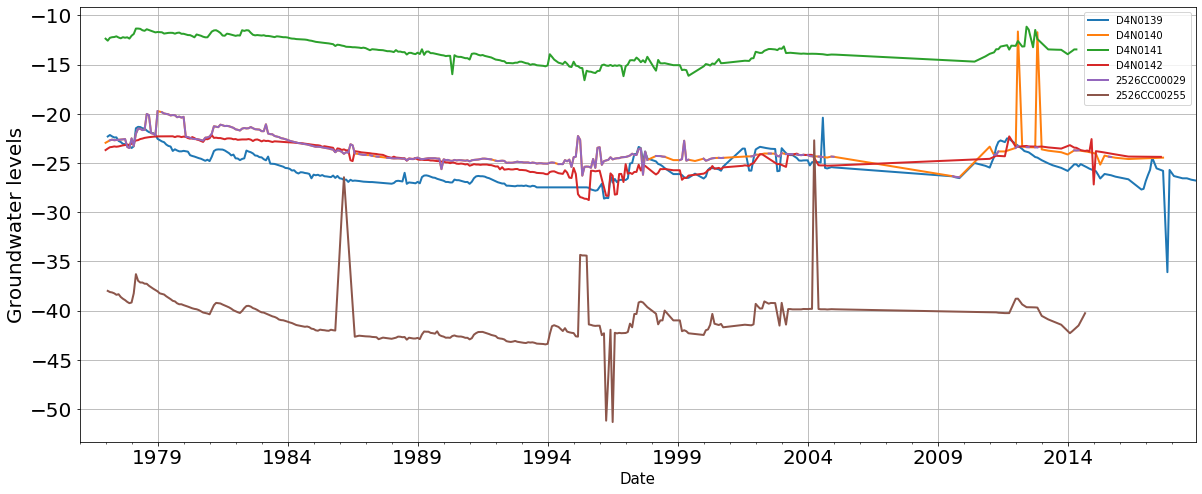

In [10]:
#visual illustration just to show all groundwater levels 

gwls.plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [11]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0139  D4N0140  D4N0141  D4N0142  2526CC00029  2526CC00255  \
year_month                                                                   
1976-01-01        NaN      NaN      NaN      NaN        -30.0          NaN   
1976-02-01        NaN      NaN      NaN      NaN          NaN          NaN   
1976-03-01        NaN      NaN      NaN      NaN          NaN          NaN   
1976-04-01        NaN      NaN      NaN      NaN          NaN          NaN   
1976-05-01        NaN      NaN      NaN      NaN          NaN          NaN   
...               ...      ...      ...      ...          ...          ...   
2018-08-01 -26.560000      NaN      NaN      NaN          NaN          NaN   
2018-09-01 -26.631148      NaN      NaN      NaN          NaN          NaN   
2018-10-01 -26.700000      NaN      NaN      NaN          NaN          NaN   
2018-11-01 -26.742846      NaN      NaN      NaN          NaN          NaN   
2018-12-01 -26.784309      NaN      NaN      NaN          NaN          NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1976-01-01        22.15     91.587500      0.579     327153.0  
1976-02-01        22.05     91.691667      0.665     327153.0  
1976-03-01        21.35     93.712500      0.713     327153.0  
1976-04-01        18.35     94.091667      1.217     327153.0  
1976-05-01        14.45     88.770833      1.507     327153.0  
...                 ...           ...        ...          ...  
2018-08-01        15.65           NaN      0.296          NaN  
2018-09-01        18.75           NaN      0.282          NaN  
2018-10-01        20.60           NaN      0.286          NaN  
2018-11-01        22.90           NaN      0.280          NaN  
2018-12-01        25.15           NaN      0.272          NaN  

[516 rows x 10 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [12]:
pima = gwls.filter(['D4N0139', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1977-01-01']  
pima = pima[pima.index < '2004-01-01'] 

In [13]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0139          0
Temperature     12
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [14]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [15]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0139 Temperature precip_trend  Discharge Abstraction
0 1977-02-01  1977-02-01   1977-02-01 1977-02-01  1977-02-01
1 2003-12-01  2003-12-01   2003-12-01 2003-12-01  2003-12-01

### Mutual information stats

In [16]:
from sklearn.feature_selection import mutual_info_regression

In [17]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0139']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [18]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.000232
precip_trend    0.302598
Discharge       0.896667
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [19]:
precip1  = pima.filter(['D4N0139', 'precip_trend'])
discha1 = pima.filter(['D4N0139', 'Discharge'])
temp1   = pima.filter(['D4N0139', 'Temperature'])
abstr1   = pima.filter(['D4N0139', 'Abstraction'])

In [20]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

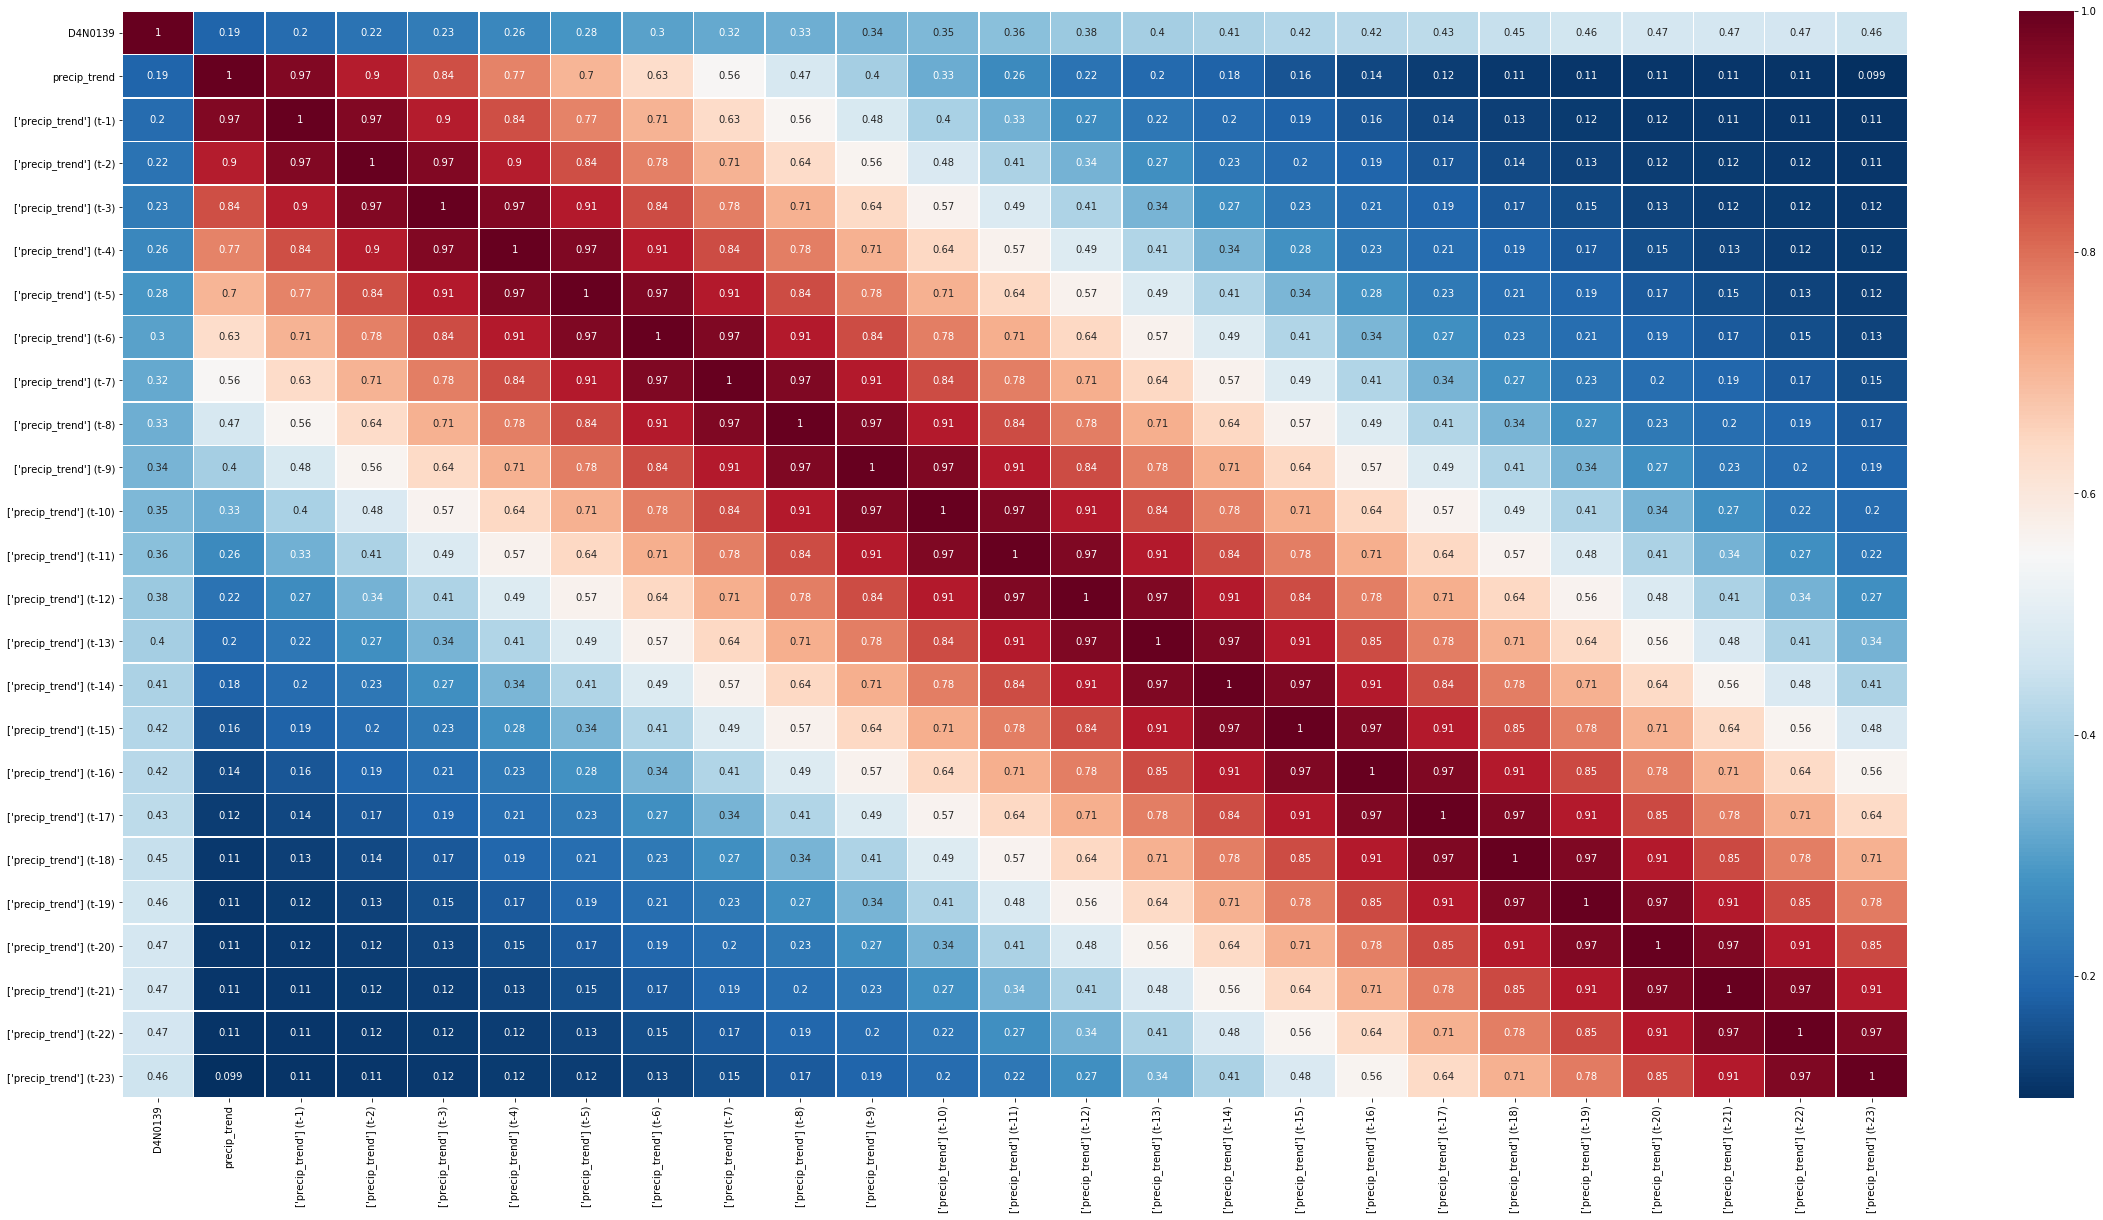

In [21]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

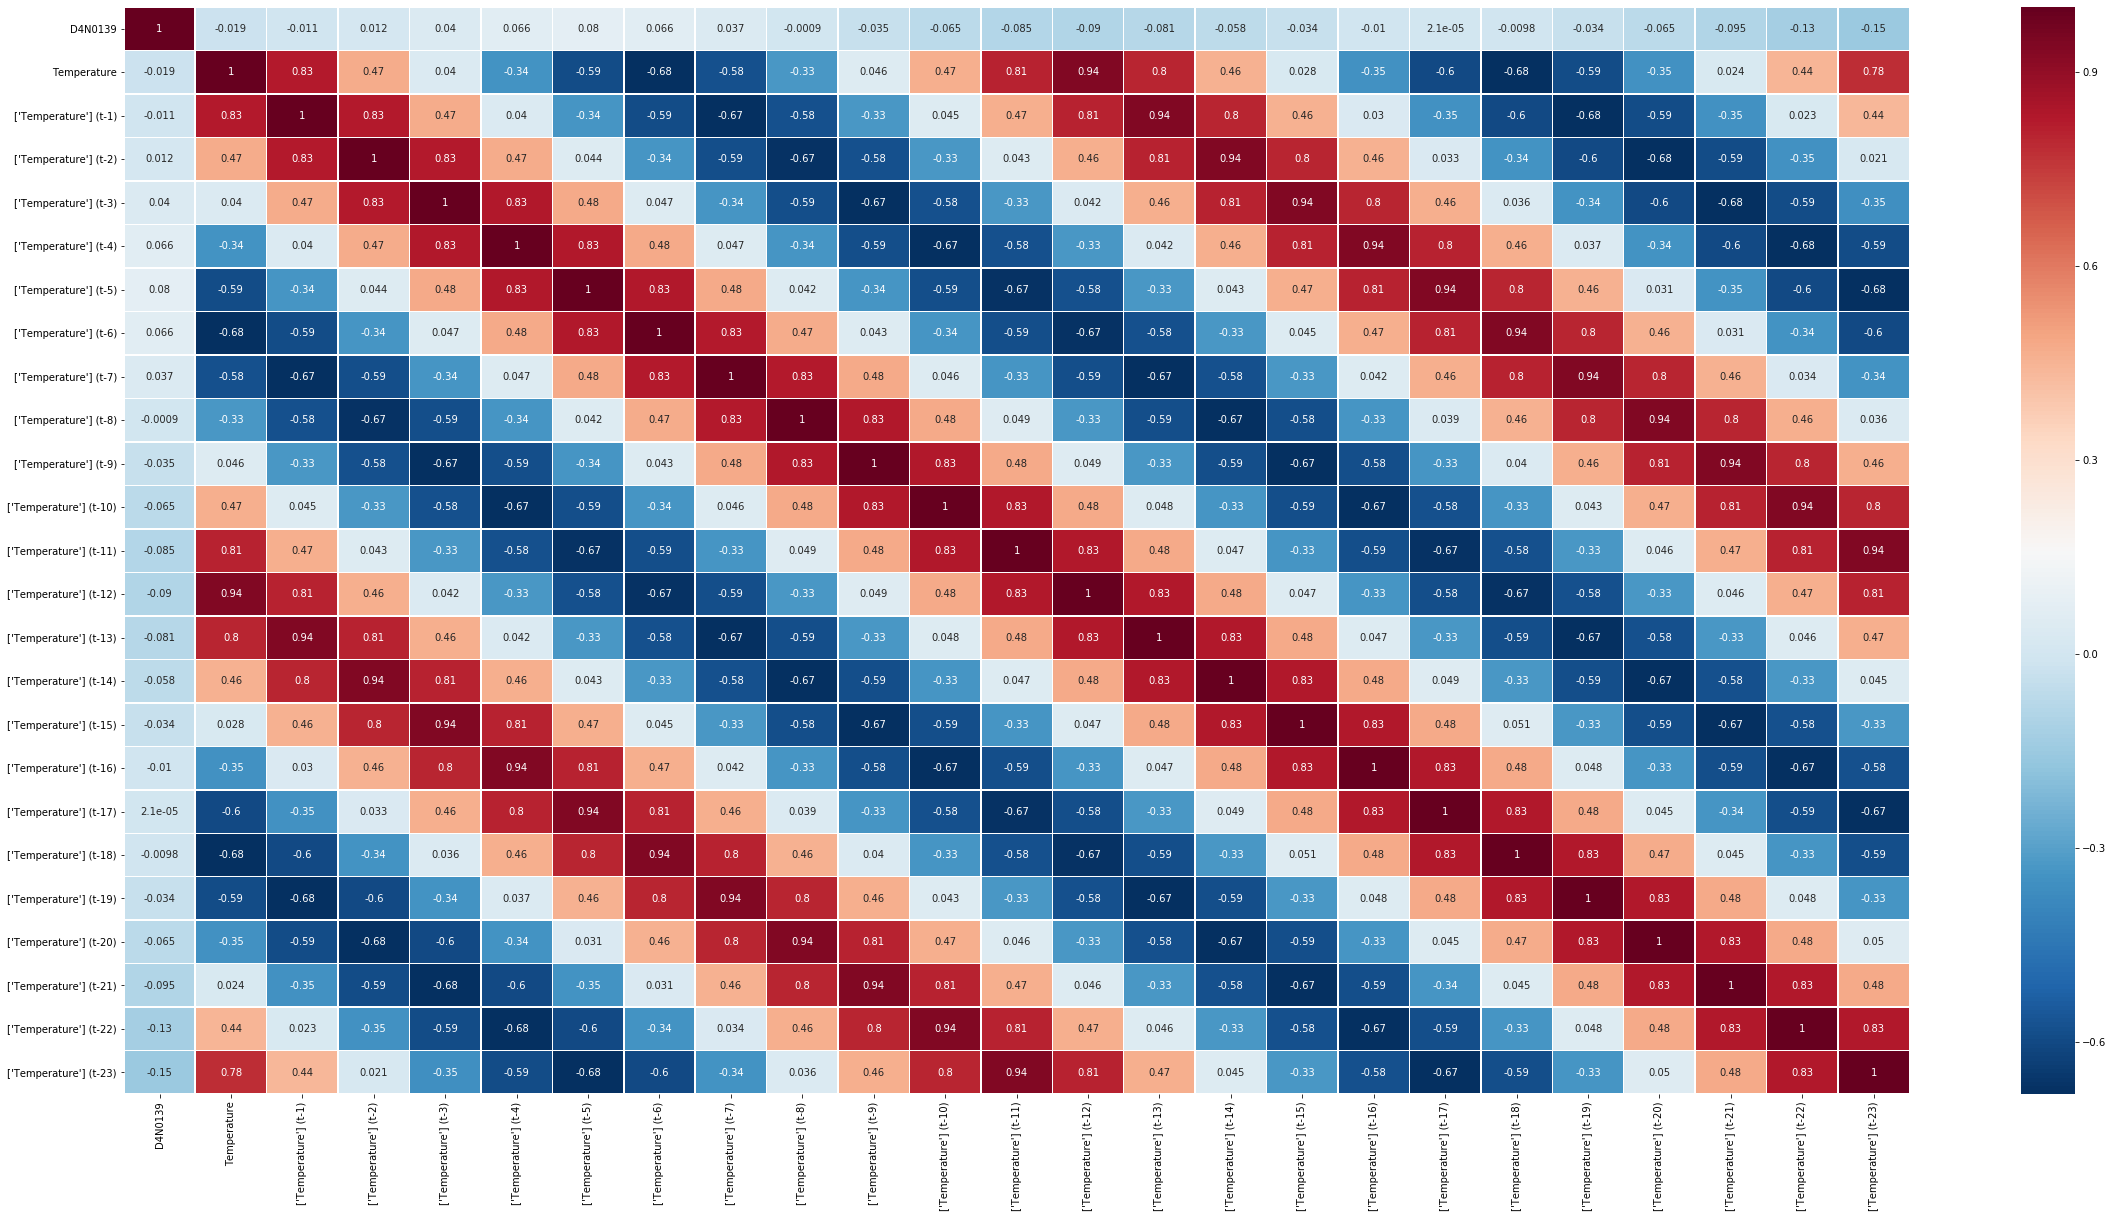

In [22]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [23]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [39]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(0)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0139  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-02-01 -22.310000    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -22.160000    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -22.300000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -22.410000    16.231148     48.808333   1.406000  4.364772e+05   
1977-06-01 -22.400000    12.750000     62.258333   1.207000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-08-01 -24.500000    11.750000     42.721558   0.423000  2.735368e+06   
2003-09-01 -24.750000    18.700000     50.304891   0.407000  2.735368e+06   
2003-10-01 -24.770000    21.300000     57.896558   0.410000  2.735368e+06   
2003-11-01 -24.740000    21.800000     58.746558   0.401000  2.735368e+06   
2003-12-01 -24.735082    24.050000     58.728261   0.393000  2.735368e+06   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1977-02-01          24.400000           51.341667  
1977-03-01          20.700000           51.983333  
1977-04-01          19.600000           48.604167  
1977-05-01          16.231148           48.808333  
1977-06-01          12.750000           62.258333  
...                       ...                 ...  
2003-08-01          11.750000           42.721558  
2003-09-01          18.700000           50.304891  
2003-10-01          21.300000           57.896558  
2003-11-01          21.800000           58.746558  
2003-12-01          24.050000           58.728261  

[323 rows x 7 columns]

In [40]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0139']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [41]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [42]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.002972
precip_trend (t-5)    0.298484
Discharge             0.874342
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [44]:
rainfall = X['precip_trend (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0139']

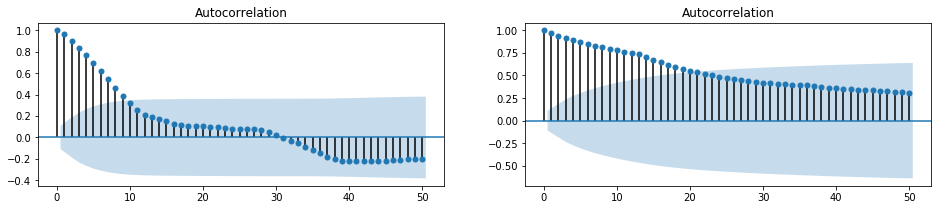

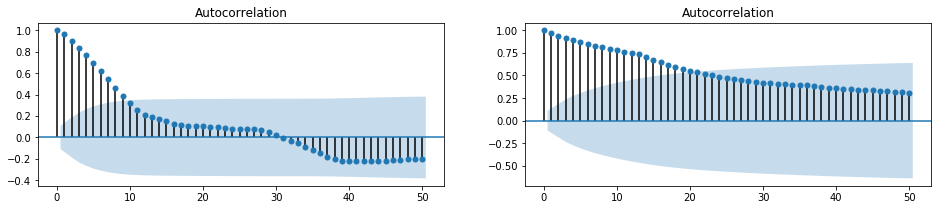

In [45]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

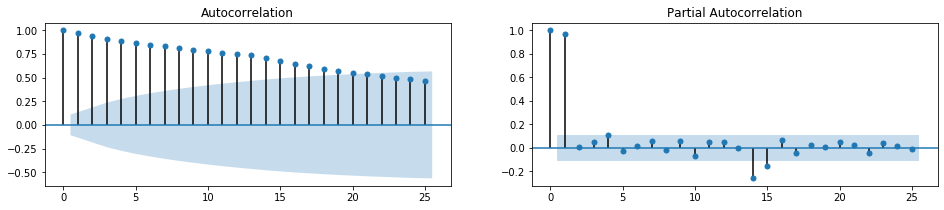

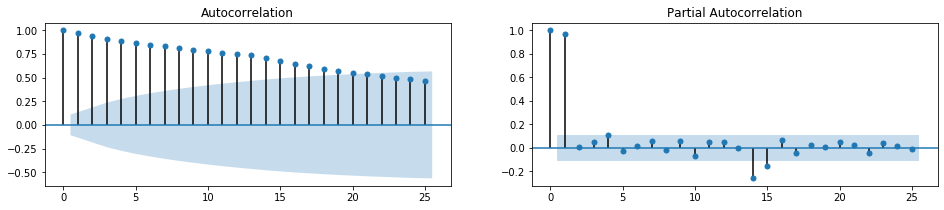

In [46]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

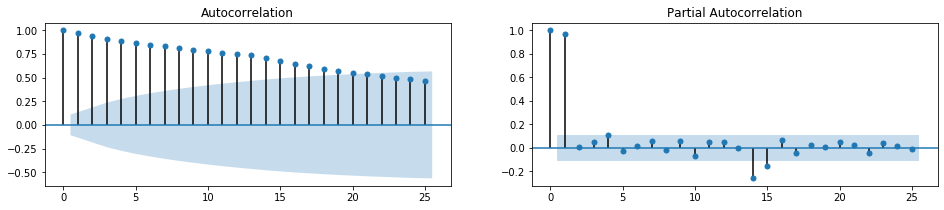

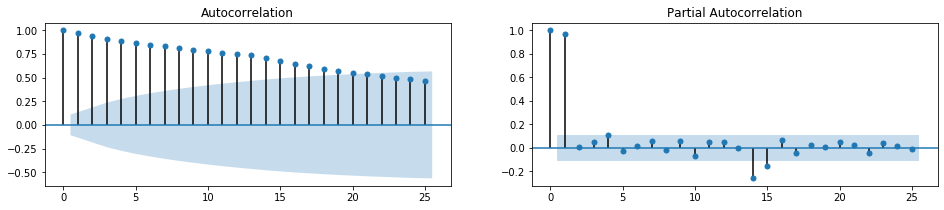

In [47]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

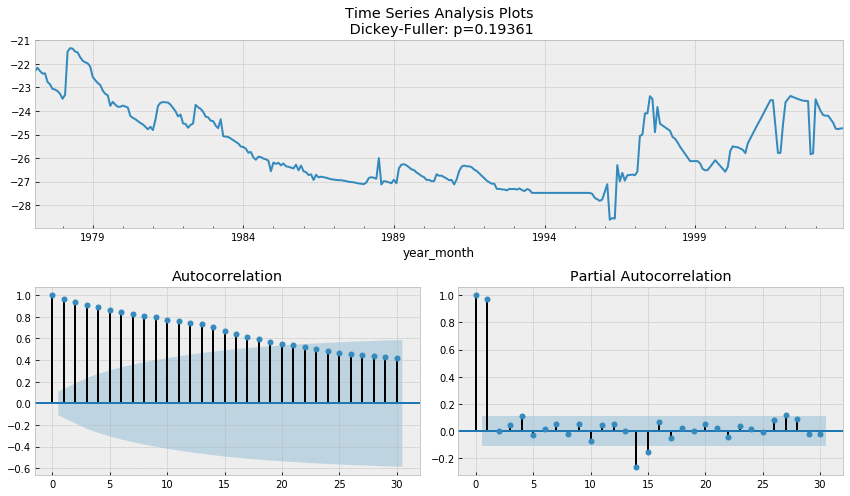

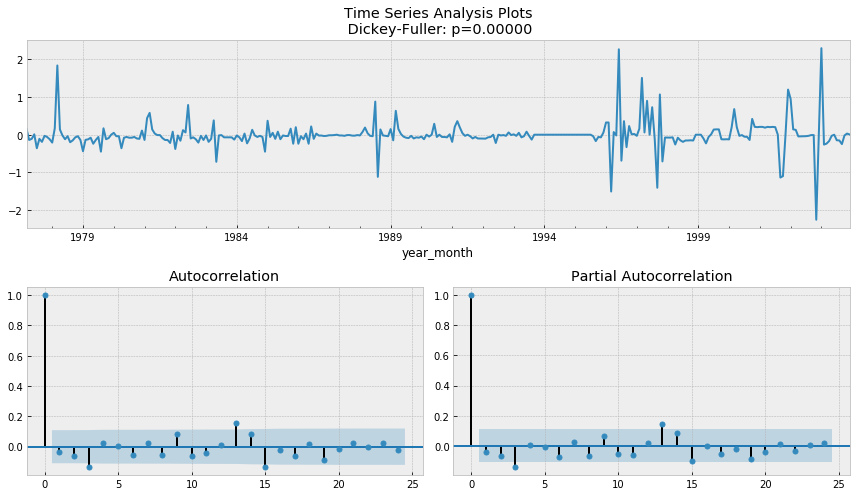

In [48]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0111_diff = bhid - bhid.shift(1)

tsplot(D4N0111_diff[1:], lags=24)

#### Rainfall

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


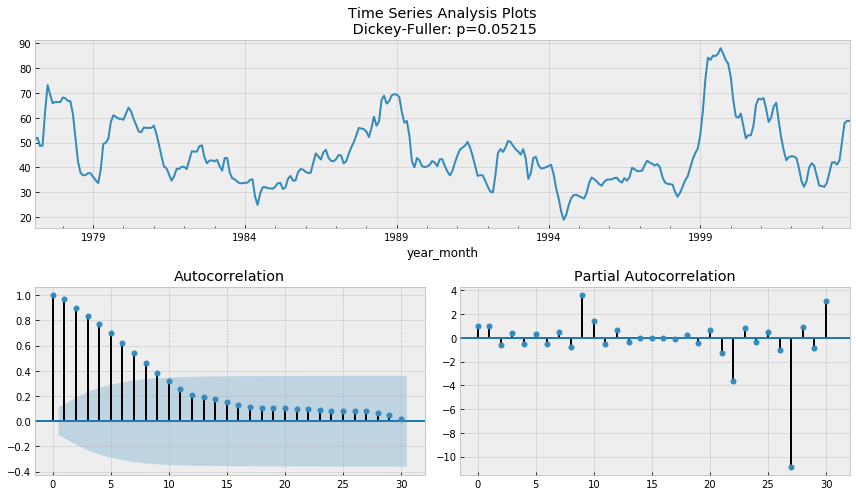

In [49]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

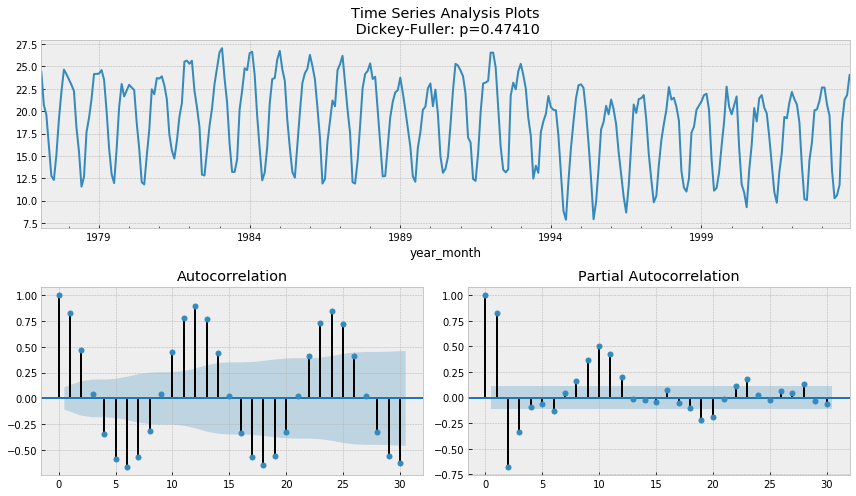

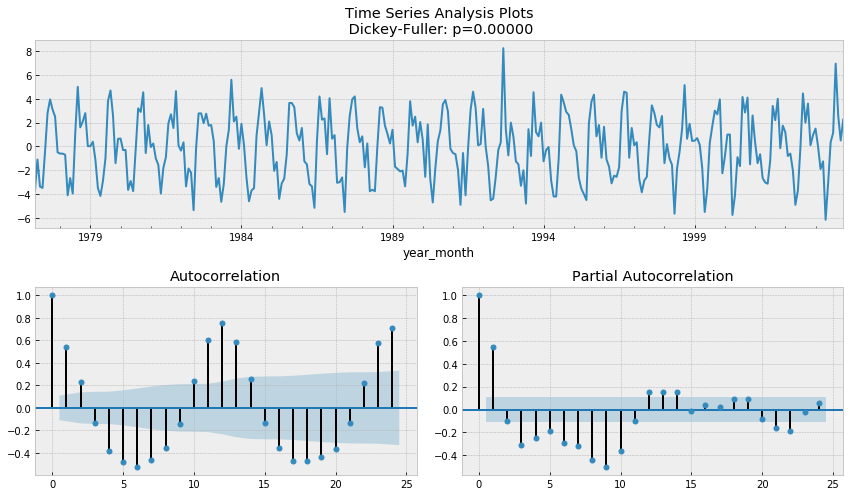

In [50]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


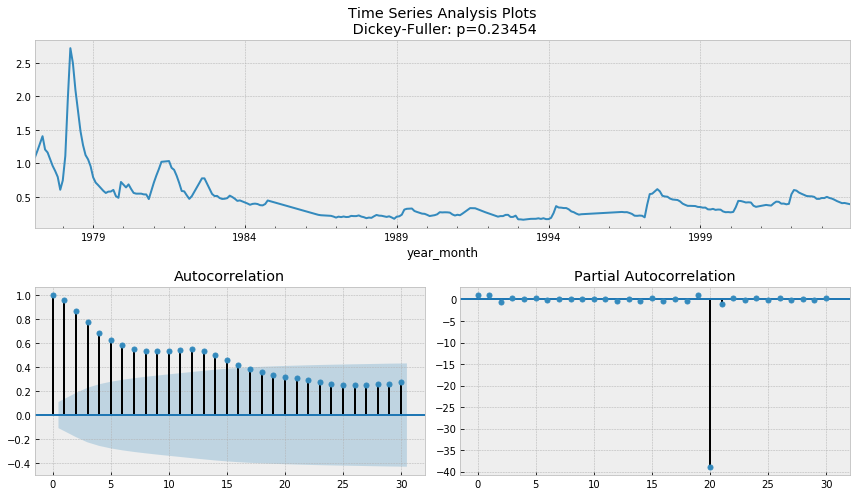

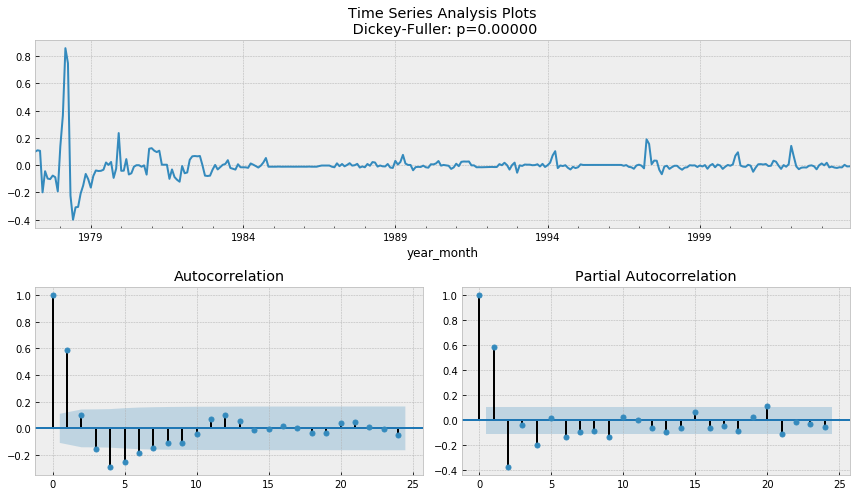

In [51]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

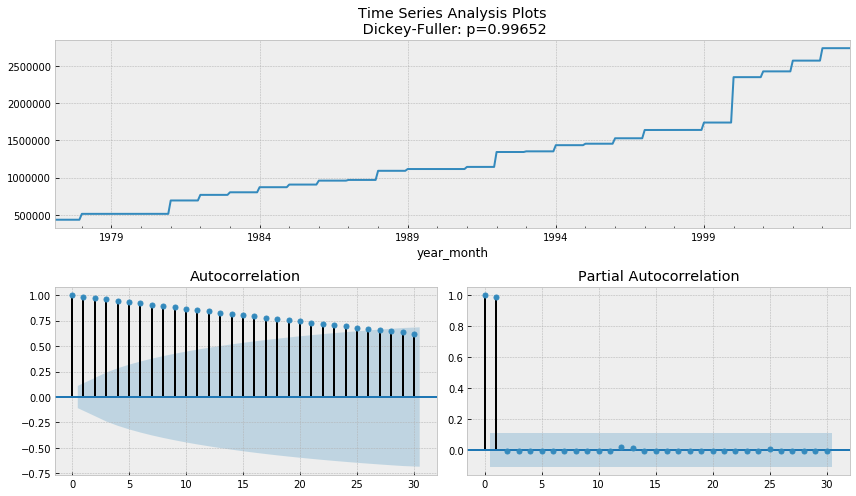

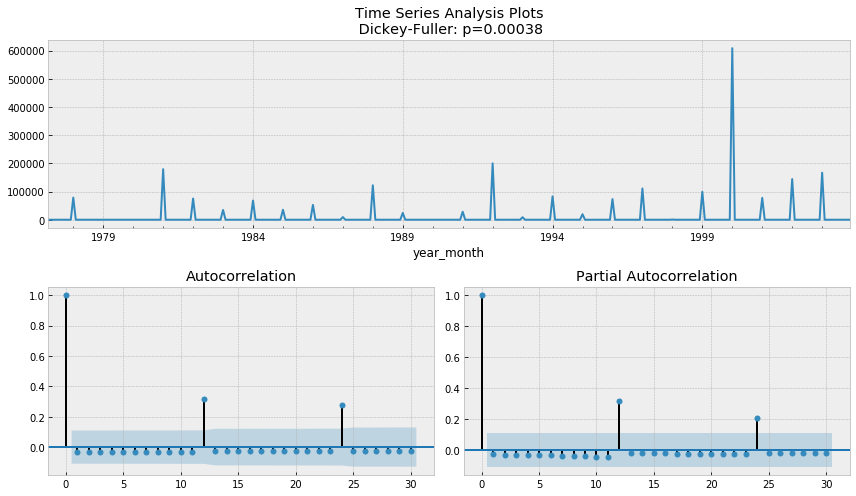

In [52]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [53]:
pima_diff = pd.DataFrame({'D4N0111': D4N0111_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0111','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0111           1
Temperature       1
precip_trend    323
Discharge         1
Abstraction       1
dtype: int64

In [54]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

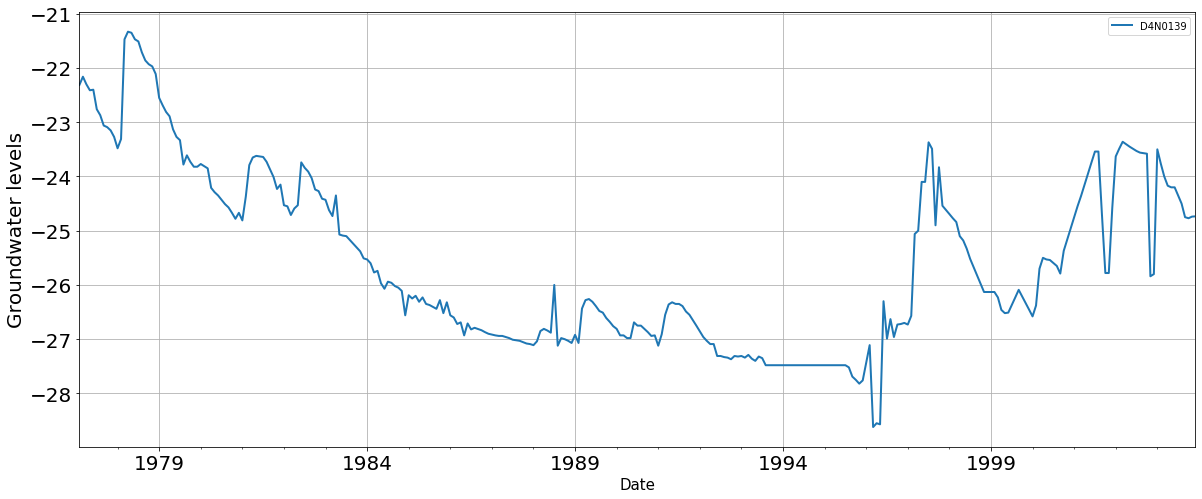

In [55]:
pima[['D4N0139']].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [56]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [57]:
pima

D4N0139  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-02-01 -22.310000    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -22.160000    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -22.300000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -22.410000    16.231148     48.808333   1.406000  4.364772e+05   
1977-06-01 -22.400000    12.750000     62.258333   1.207000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-08-01 -24.500000    11.750000     42.721558   0.423000  2.735368e+06   
2003-09-01 -24.750000    18.700000     50.304891   0.407000  2.735368e+06   
2003-10-01 -24.770000    21.300000     57.896558   0.410000  2.735368e+06   
2003-11-01 -24.740000    21.800000     58.746558   0.401000  2.735368e+06   
2003-12-01 -24.735082    24.050000     58.728261   0.393000  2.735368e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-02-01          24.400000           51.341667          4.957793   
1977-03-01          20.700000           51.983333          4.969977   
1977-04-01          19.600000           48.604167          4.904075   
1977-05-01          16.231148           48.808333          4.908182   
1977-06-01          12.750000           62.258333          5.147227   
...                       ...                 ...               ...   
2003-08-01          11.750000           42.721558          4.777841   
2003-09-01          18.700000           50.304891          4.937786   
2003-10-01          21.300000           57.896558          5.075783   
2003-11-01          21.800000           58.746558          5.090112   
2003-12-01          24.050000           58.728261          5.089805   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-02-01         4.234749       1.738121        13.986494  
1977-03-01         4.077312       1.784261        13.986494  
1977-04-01         4.025291       1.832978        13.986494  
1977-05-01         3.846719       1.877966        13.986494  
1977-06-01         3.621039       1.791634        13.986494  
...                     ...            ...              ...  
2003-08-01         3.545531       1.352767        15.821777  
2003-09-01         3.980619       1.341460        15.821777  
2003-10-01         4.104587       1.343590        15.821777  
2003-11-01         4.126761       1.337186        15.821777  
2003-12-01         4.220874       1.331460        15.821777  

[323 rows x 11 columns]

In [58]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0139.shift(obs)
pima.fillna(0, inplace=True)


In [59]:
pima

D4N0139  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-02-01 -22.310000    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -22.160000    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -22.300000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -22.410000    16.231148     48.808333   1.406000  4.364772e+05   
1977-06-01 -22.400000    12.750000     62.258333   1.207000  4.364772e+05   
...               ...          ...           ...        ...           ...   
2003-08-01 -24.500000    11.750000     42.721558   0.423000  2.735368e+06   
2003-09-01 -24.750000    18.700000     50.304891   0.407000  2.735368e+06   
2003-10-01 -24.770000    21.300000     57.896558   0.410000  2.735368e+06   
2003-11-01 -24.740000    21.800000     58.746558   0.401000  2.735368e+06   
2003-12-01 -24.735082    24.050000     58.728261   0.393000  2.735368e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-02-01          24.400000           51.341667          4.957793   
1977-03-01          20.700000           51.983333          4.969977   
1977-04-01          19.600000           48.604167          4.904075   
1977-05-01          16.231148           48.808333          4.908182   
1977-06-01          12.750000           62.258333          5.147227   
...                       ...                 ...               ...   
2003-08-01          11.750000           42.721558          4.777841   
2003-09-01          18.700000           50.304891          4.937786   
2003-10-01          21.300000           57.896558          5.075783   
2003-11-01          21.800000           58.746558          5.090112   
2003-12-01          24.050000           58.728261          5.089805   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1977-02-01         4.234749       1.738121        13.986494   0.000000   
1977-03-01         4.077312       1.784261        13.986494 -22.310000   
1977-04-01         4.025291       1.832978        13.986494 -22.160000   
1977-05-01         3.846719       1.877966        13.986494 -22.300000   
1977-06-01         3.621039       1.791634        13.986494 -22.410000   
...                     ...            ...              ...        ...   
2003-08-01         3.545531       1.352767        15.821777 -24.347541   
2003-09-01         3.980619       1.341460        15.821777 -24.500000   
2003-10-01         4.104587       1.343590        15.821777 -24.750000   
2003-11-01         4.126761       1.337186        15.821777 -24.770000   
2003-12-01         4.220874       1.331460        15.821777 -24.740000   

                  t_2        t_3        t_4  
year_month                                   
1977-02-01   0.000000   0.000000   0.000000  
1977-03-01   0.000000   0.000000   0.000000  
1977-04-01 -22.310000   0.000000   0.000000  
1977-05-01 -22.160000 -22.310000   0.000000  
1977-06-01 -22.300000 -22.160000 -22.310000  
...               ...        ...        ...  
2003-08-01 -24.200000 -24.200000 -24.170000  
2003-09-01 -24.347541 -24.200000 -24.200000  
2003-10-01 -24.500000 -24.347541 -24.200000  
2003-11-01 -24.750000 -24.500000 -24.347541  
2003-12-01 -24.770000 -24.750000 -24.500000  

[323 rows x 15 columns]

In [60]:
pima.shape

(323, 15)

In [61]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0139']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [62]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0139']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.000000
precip_trend_log    0.195430
Discharge_log       0.612397
Abstraction_log     0.682684
t_1                 1.000000
t_2                 0.789316
dtype: float64

In [63]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0139'].values
y = y.reshape(-1,1)

In [64]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(270, 6) (270, 1)
(53, 6) (53, 1)


In [65]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [66]:
y_test[0]

array([-0.41124484])

### LSTM

In [91]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [92]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -0.41124484
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Train on 270 samples, validate on 53 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 5s - loss: 1.2584 - mean_squared_error: 1.2584
Epoch 00001: val_loss improved from inf to 0.68673, saving model to model.h5
270/270 [==============================] - 12s 45ms/sample - loss: 1.1156 - mean_squared_error: 1.1156 - val_loss: 0.6867 - val_mean_squared_error: 0.6867
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.0155 - mean_squared_error: 1.0155
Epoch 00002: val_loss did not improve from 0.68673
270/270 [==============================] - 0s 292us/sample - loss: 0.9738 - mean_squared_error: 0.9738 - val_loss: 0.6908 - val_mean_squared_error: 0.6908
Epoch 3/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.9361 - mean_squared_error: 0.9361
Epoch 00003: val_loss did not improve from 0.68673
270/270 [==============================] - 0s 462us/sample - loss: 0.8791 - mean_squared_error: 0.8791 - val_loss: 0.6

Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 00027: val_loss did not improve from 0.68673
270/270 [==============================] - 0s 285us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.7653 - val_mean_squared_error: 0.7653
Epoch 28/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00028: val_loss did not improve from 0.68673
270/270 [==============================] - 0s 160us/sample - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.7584 - val_mean_squared_error: 0.7584
Epoch 29/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00029: val_loss did not improve from 0.68673
270/270 [==============================] - 0s 145us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.7462 - val_mean_squared_error: 0.7462
Epoch 30/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00051: val_loss improved from 0.31616 to 0.30348, saving model to model.h5
270/270 [==============================] - 0s 530us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.3035 - val_mean_squared_error: 0.3035
Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00052: val_loss improved from 0.30348 to 0.29008, saving model to model.h5
270/270 [==============================] - 0s 275us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.2901 - val_mean_squared_error: 0.2901
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00053: val_loss improved from 0.29008 to 0.28200, saving model to model.h5
270/270 [==============================] - 0s 257us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.2820 - val_mean_s

Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00075: val_loss improved from 0.17782 to 0.17707, saving model to model.h5
270/270 [==============================] - 0s 271us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1771 - val_mean_squared_error: 0.1771
Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00076: val_loss improved from 0.17707 to 0.17564, saving model to model.h5
270/270 [==============================] - 0s 259us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1756 - val_mean_squared_error: 0.1756
Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00077: val_loss improved from 0.17564 to 0.17413, saving model to model.h5
270/270 [==============================] - 0s 364us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.174

 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00099: val_loss did not improve from 0.15703
270/270 [==============================] - 0s 177us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1576 - val_mean_squared_error: 0.1576
Epoch 100/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00100: val_loss did not improve from 0.15703
270/270 [==============================] - 0s 421us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 101/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00101: val_loss did not improve from 0.15703
270/270 [==============================] - 0s 289us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 102/1000
 96/270 [=========>....................] - ETA: 0s -

 96/270 [=========>....................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00124: val_loss did not improve from 0.15182
270/270 [==============================] - 0s 142us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 125/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00125: val_loss did not improve from 0.15182
270/270 [==============================] - 0s 159us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1539 - val_mean_squared_error: 0.1539
Epoch 126/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00126: val_loss did not improve from 0.15182
270/270 [==============================] - 0s 197us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 127/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 150/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00150: val_loss did not improve from 0.14704
270/270 [==============================] - 0s 591us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1479 - val_mean_squared_error: 0.1479
Epoch 151/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00151: val_loss did not improve from 0.14704
270/270 [==============================] - 0s 474us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1485 - val_mean_squared_error: 0.1485
Epoch 152/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00152: val_loss did not improve from 0.14704
270/270 [==============================] - 0s 398us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1479 - val_mean_squared_error: 0.1479
Epoch 153/1000
 96/270 [=========>..................

Epoch 176/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00176: val_loss improved from 0.14556 to 0.14525, saving model to model.h5
270/270 [==============================] - 0s 303us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 177/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00177: val_loss improved from 0.14525 to 0.14496, saving model to model.h5
270/270 [==============================] - 0s 255us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00178: val_loss did not improve from 0.14496
270/270 [==============================] - 0s 173us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1452 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00201: val_loss did not improve from 0.14255
270/270 [==============================] - 0s 161us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1448 - val_mean_squared_error: 0.1448
Epoch 202/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00202: val_loss did not improve from 0.14255
270/270 [==============================] - 0s 162us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1435 - val_mean_squared_error: 0.1435
Epoch 203/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00203: val_loss did not improve from 0.14255
270/270 [==============================] - 0s 147us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s -

270/270 [==============================] - 0s 244us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 227/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00227: val_loss did not improve from 0.14052
270/270 [==============================] - 0s 222us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 228/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00228: val_loss did not improve from 0.14052
270/270 [==============================] - 0s 208us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 229/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00229: val_loss improved from 0.14052 to 0.13991, saving model to model.h5
270/270 [=============

 96/270 [=========>....................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00252: val_loss did not improve from 0.13971
270/270 [==============================] - 0s 141us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 253/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00253: val_loss did not improve from 0.13971
270/270 [==============================] - 0s 129us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 254/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00254: val_loss did not improve from 0.13971
270/270 [==============================] - 0s 138us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 255/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 278/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00278: val_loss did not improve from 0.13838
270/270 [==============================] - 0s 145us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 279/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00279: val_loss did not improve from 0.13838
270/270 [==============================] - 0s 157us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 280/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00280: val_loss did not improve from 0.13838
270/270 [==============================] - 0s 175us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 281/1000
 96/270 [=========>..................

Epoch 304/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00304: val_loss did not improve from 0.13816
270/270 [==============================] - 0s 146us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 305/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00305: val_loss improved from 0.13816 to 0.13799, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 306/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00306: val_loss did not improve from 0.13799
270/270 [==============================] - 0s 204us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 307/1000
 96/270

Epoch 330/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00330: val_loss did not improve from 0.13528
270/270 [==============================] - 0s 134us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 331/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00331: val_loss did not improve from 0.13528
270/270 [==============================] - 0s 135us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 332/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00332: val_loss did not improve from 0.13528
270/270 [==============================] - 0s 119us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 333/1000
 96/270 [=========>..................

Epoch 356/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00356: val_loss did not improve from 0.13460
270/270 [==============================] - 0s 197us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 357/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00357: val_loss did not improve from 0.13460
270/270 [==============================] - 0s 135us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 358/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00358: val_loss did not improve from 0.13460
270/270 [==============================] - 0s 134us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 359/1000
 96/270 [=========>..................

Epoch 382/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00382: val_loss did not improve from 0.13388
270/270 [==============================] - 0s 143us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 383/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00383: val_loss did not improve from 0.13388
270/270 [==============================] - 0s 131us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 384/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00384: val_loss did not improve from 0.13388
270/270 [==============================] - 0s 152us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 385/1000
 96/270 [=========>..................

Epoch 408/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00408: val_loss did not improve from 0.13335
270/270 [==============================] - 0s 147us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 409/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00409: val_loss improved from 0.13335 to 0.13311, saving model to model.h5
270/270 [==============================] - 0s 255us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Epoch 410/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00410: val_loss did not improve from 0.13311
270/270 [==============================] - 0s 175us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 411/1000
 96/270

Epoch 434/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00434: val_loss did not improve from 0.13243
270/270 [==============================] - 0s 152us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 435/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00435: val_loss did not improve from 0.13243
270/270 [==============================] - 0s 145us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 436/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00436: val_loss did not improve from 0.13243
270/270 [==============================] - 0s 133us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 437/1000
 96/270 [=========>..................

Epoch 460/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00460: val_loss improved from 0.13230 to 0.13204, saving model to model.h5
270/270 [==============================] - 0s 233us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 461/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00461: val_loss did not improve from 0.13204
270/270 [==============================] - 0s 189us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 462/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00462: val_loss did not improve from 0.13204
270/270 [==============================] - 0s 135us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1327 - val_mean_squared_error: 0.1327
Epoch 463/1000
 96/270

Epoch 486/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00486: val_loss did not improve from 0.13027
270/270 [==============================] - 0s 163us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 487/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00487: val_loss did not improve from 0.13027
270/270 [==============================] - 0s 155us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 488/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00488: val_loss did not improve from 0.13027
270/270 [==============================] - 0s 167us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 489/1000
 96/270 [=========>..................

Epoch 512/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00512: val_loss did not improve from 0.13027
270/270 [==============================] - 0s 153us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 513/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00513: val_loss did not improve from 0.13027
270/270 [==============================] - 0s 166us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 514/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00514: val_loss did not improve from 0.13027
270/270 [==============================] - 0s 170us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 515/1000
 96/270 [=========>..................

Epoch 538/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00538: val_loss improved from 0.12912 to 0.12882, saving model to model.h5
270/270 [==============================] - 0s 200us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 539/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00539: val_loss did not improve from 0.12882
270/270 [==============================] - 0s 128us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 540/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00540: val_loss did not improve from 0.12882
270/270 [==============================] - 0s 126us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 541/1000
 96/270

Epoch 564/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00564: val_loss did not improve from 0.12882
270/270 [==============================] - 0s 142us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 565/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00565: val_loss did not improve from 0.12882
270/270 [==============================] - 0s 121us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 566/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00566: val_loss did not improve from 0.12882
270/270 [==============================] - 0s 122us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 567/1000
 96/270 [=========>..................

Epoch 590/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00590: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 151us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 591/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00591: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 124us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 592/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00592: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 125us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 593/1000
 96/270 [=========>..................

Epoch 616/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00616: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 149us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 617/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00617: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 126us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 618/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00618: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 141us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 619/1000
 96/270 [=========>..................

Epoch 642/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00642: val_loss did not improve from 0.12727
270/270 [==============================] - 0s 137us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 643/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00643: val_loss did not improve from 0.12727
270/270 [==============================] - 0s 121us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 644/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00644: val_loss did not improve from 0.12727
270/270 [==============================] - 0s 144us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 645/1000
 96/270 [=========>..................

Epoch 668/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00668: val_loss did not improve from 0.12601
270/270 [==============================] - 0s 119us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 669/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00669: val_loss did not improve from 0.12601
270/270 [==============================] - 0s 118us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 670/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00670: val_loss did not improve from 0.12601
270/270 [==============================] - 0s 116us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 671/1000
 96/270 [=========>..................

Epoch 694/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00694: val_loss improved from 0.12550 to 0.12548, saving model to model.h5
270/270 [==============================] - 0s 192us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 695/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00695: val_loss did not improve from 0.12548
270/270 [==============================] - 0s 135us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 696/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00696: val_loss did not improve from 0.12548
270/270 [==============================] - 0s 127us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 697/1000
 96/270

Epoch 720/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00720: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 118us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 721/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00721: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 121us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 722/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00722: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 121us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 723/1000
 96/270 [=========>..................

Epoch 746/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00746: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 135us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 747/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00747: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 119us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 748/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00748: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 129us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 749/1000
 96/270 [=========>..................

Epoch 772/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00772: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 144us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 773/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00773: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 127us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 774/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00774: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 136us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 775/1000
 96/270 [=========>..................

Epoch 798/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00798: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 119us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 799/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00799: val_loss did not improve from 0.12424
270/270 [==============================] - 0s 116us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 800/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00800: val_loss improved from 0.12424 to 0.12414, saving model to model.h5
270/270 [==============================] - 0s 198us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 801/1000
 96/270

Epoch 824/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00824: val_loss did not improve from 0.12414
270/270 [==============================] - 0s 144us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 825/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00825: val_loss did not improve from 0.12414
270/270 [==============================] - 0s 122us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 826/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00826: val_loss did not improve from 0.12414
270/270 [==============================] - 0s 125us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 827/1000
 96/270 [=========>..................

Epoch 850/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00850: val_loss did not improve from 0.12414
270/270 [==============================] - 0s 154us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 851/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00851: val_loss did not improve from 0.12414
270/270 [==============================] - 0s 140us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 852/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00852: val_loss did not improve from 0.12414
270/270 [==============================] - 0s 128us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 853/1000
 96/270 [=========>..................

Epoch 876/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00876: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 123us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1251 - val_mean_squared_error: 0.1251
Epoch 877/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00877: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 124us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 878/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00878: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 135us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 879/1000
 96/270 [=========>..................

Epoch 902/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00902: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 129us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 903/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00903: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 141us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 904/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00904: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 145us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 905/1000
 96/270 [=========>..................

Epoch 928/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00928: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 141us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 929/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00929: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 141us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 930/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00930: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 130us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 931/1000
 96/270 [=========>..................

Epoch 954/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00954: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 250us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 955/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00955: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 263us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 956/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00956: val_loss did not improve from 0.12377
270/270 [==============================] - 0s 210us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 957/1000
 96/270 [=========>..................

Epoch 23/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1576 - mean_squared_error: 0.1576
Epoch 00023: val_loss did not improve from 0.67616
270/270 [==============================] - 0s 162us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.8199 - val_mean_squared_error: 0.8199
Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1323 - mean_squared_error: 0.1323
Epoch 00024: val_loss did not improve from 0.67616
270/270 [==============================] - 0s 167us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.8224 - val_mean_squared_error: 0.8224
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1341 - mean_squared_error: 0.1341
Epoch 00025: val_loss did not improve from 0.67616
270/270 [==============================] - 0s 285us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.8210 - val_mean_squared_error: 0.8210
Epoch 26/1000
 96/270 [=========>....................] 

Epoch 48/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00048: val_loss improved from 0.38646 to 0.37185, saving model to model.h5
270/270 [==============================] - 0s 255us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.3718 - val_mean_squared_error: 0.3718
Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00049: val_loss improved from 0.37185 to 0.35214, saving model to model.h5
270/270 [==============================] - 0s 214us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.3521 - val_mean_squared_error: 0.3521
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00050: val_loss improved from 0.35214 to 0.33972, saving model to model.h5
270/270 [==============================] - 0s 251us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.339

Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00072: val_loss improved from 0.18447 to 0.18054, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1805 - val_mean_squared_error: 0.1805
Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00073: val_loss improved from 0.18054 to 0.17752, saving model to model.h5
270/270 [==============================] - 0s 238us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1775 - val_mean_squared_error: 0.1775
Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00074: val_loss improved from 0.17752 to 0.17715, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.177

 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00096: val_loss did not improve from 0.15367
270/270 [==============================] - 0s 160us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00097: val_loss improved from 0.15367 to 0.15273, saving model to model.h5
270/270 [==============================] - 0s 228us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00098: val_loss improved from 0.15273 to 0.15185, saving model to model.h5
270/270 [==============================] - 0s 249us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 99/

270/270 [==============================] - 0s 218us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00121: val_loss did not improve from 0.14275
270/270 [==============================] - 0s 145us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00122: val_loss improved from 0.14275 to 0.14176, saving model to model.h5
270/270 [==============================] - 0s 244us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00123: val_loss did not improve from 0.14176
270/270 [=============

270/270 [==============================] - 0s 227us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00146: val_loss improved from 0.13874 to 0.13830, saving model to model.h5
270/270 [==============================] - 0s 238us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00147: val_loss improved from 0.13830 to 0.13760, saving model to model.h5
270/270 [==============================] - 0s 227us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00148: val_loss improved from 0.13760

 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00171: val_loss did not improve from 0.13670
270/270 [==============================] - 0s 135us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00172: val_loss did not improve from 0.13670
270/270 [==============================] - 0s 138us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00173: val_loss did not improve from 0.13670
270/270 [==============================] - 0s 128us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 197/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00197: val_loss did not improve from 0.13444
270/270 [==============================] - 0s 145us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00198: val_loss did not improve from 0.13444
270/270 [==============================] - 0s 156us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00199: val_loss did not improve from 0.13444
270/270 [==============================] - 0s 177us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 200/1000
 96/270 [=========>..................

Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00223: val_loss improved from 0.13243 to 0.13239, saving model to model.h5
270/270 [==============================] - 0s 236us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00224: val_loss did not improve from 0.13239
270/270 [==============================] - 0s 127us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1327 - val_mean_squared_error: 0.1327
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00225: val_loss did not improve from 0.13239
270/270 [==============================] - 0s 134us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 226/1000
 96/270

Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00249: val_loss did not improve from 0.13171
270/270 [==============================] - 0s 145us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00250: val_loss did not improve from 0.13171
270/270 [==============================] - 0s 137us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00251: val_loss improved from 0.13171 to 0.13104, saving model to model.h5
270/270 [==============================] - 0s 233us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1310 - val_mean_squared_error: 0.1310
Epoch 252/1000
 96/270

Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00275: val_loss did not improve from 0.12940
270/270 [==============================] - 0s 131us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00276: val_loss did not improve from 0.12940
270/270 [==============================] - 0s 190us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 277/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00277: val_loss did not improve from 0.12940
270/270 [==============================] - 0s 153us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 278/1000
 96/270 [=========>..................

Epoch 301/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00301: val_loss did not improve from 0.12926
270/270 [==============================] - 0s 135us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 302/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00302: val_loss did not improve from 0.12926
270/270 [==============================] - 0s 131us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 303/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00303: val_loss did not improve from 0.12926
270/270 [==============================] - 0s 170us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1305 - val_mean_squared_error: 0.1305
Epoch 304/1000
 96/270 [=========>..................

Epoch 327/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00327: val_loss did not improve from 0.12823
270/270 [==============================] - 0s 141us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1292 - val_mean_squared_error: 0.1292
Epoch 328/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00328: val_loss did not improve from 0.12823
270/270 [==============================] - 0s 129us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 329/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00329: val_loss did not improve from 0.12823
270/270 [==============================] - 0s 113us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 330/1000
 96/270 [=========>..................

Epoch 353/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00353: val_loss did not improve from 0.12823
270/270 [==============================] - 0s 173us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 354/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00354: val_loss did not improve from 0.12823
270/270 [==============================] - 0s 230us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 355/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00355: val_loss did not improve from 0.12823
270/270 [==============================] - 0s 195us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 356/1000
 96/270 [=========>..................

Epoch 379/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00379: val_loss did not improve from 0.12728
270/270 [==============================] - 0s 139us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 380/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00380: val_loss did not improve from 0.12728
270/270 [==============================] - 0s 154us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 381/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00381: val_loss did not improve from 0.12728
270/270 [==============================] - 0s 178us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 382/1000
 96/270 [=========>..................

Epoch 405/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00405: val_loss did not improve from 0.12671
270/270 [==============================] - 0s 151us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 406/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00406: val_loss did not improve from 0.12671
270/270 [==============================] - 0s 133us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 407/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00407: val_loss did not improve from 0.12671
270/270 [==============================] - 0s 143us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1279 - val_mean_squared_error: 0.1279
Epoch 408/1000
 96/270 [=========>..................

Epoch 431/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00431: val_loss did not improve from 0.12571
270/270 [==============================] - 0s 142us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 432/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00432: val_loss did not improve from 0.12571
270/270 [==============================] - 0s 139us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 433/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00433: val_loss did not improve from 0.12571
270/270 [==============================] - 0s 140us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 434/1000
 96/270 [=========>..................

Epoch 457/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00457: val_loss did not improve from 0.12486
270/270 [==============================] - 0s 203us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 458/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00458: val_loss did not improve from 0.12486
270/270 [==============================] - 0s 173us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 459/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00459: val_loss did not improve from 0.12486
270/270 [==============================] - 0s 157us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 460/1000
 96/270 [=========>..................

Epoch 483/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00483: val_loss improved from 0.12486 to 0.12459, saving model to model.h5
270/270 [==============================] - 0s 240us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 484/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00484: val_loss did not improve from 0.12459
270/270 [==============================] - 0s 125us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 485/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00485: val_loss did not improve from 0.12459
270/270 [==============================] - 0s 137us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 486/1000
 96/270

Epoch 509/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00509: val_loss did not improve from 0.12391
270/270 [==============================] - 0s 138us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 510/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00510: val_loss did not improve from 0.12391
270/270 [==============================] - 0s 139us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 511/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00511: val_loss did not improve from 0.12391
270/270 [==============================] - 0s 136us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 512/1000
 96/270 [=========>..................

Epoch 535/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00535: val_loss did not improve from 0.12391
270/270 [==============================] - 0s 242us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 536/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00536: val_loss did not improve from 0.12391
270/270 [==============================] - 0s 237us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 537/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00537: val_loss did not improve from 0.12391
270/270 [==============================] - 0s 150us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 538/1000
 96/270 [=========>..................

Epoch 561/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00561: val_loss did not improve from 0.12348
270/270 [==============================] - 0s 131us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 562/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00562: val_loss did not improve from 0.12348
270/270 [==============================] - 0s 125us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 563/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00563: val_loss did not improve from 0.12348
270/270 [==============================] - 0s 120us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 564/1000
 96/270 [=========>..................

Epoch 587/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00587: val_loss did not improve from 0.12290
270/270 [==============================] - 0s 144us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 588/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00588: val_loss did not improve from 0.12290
270/270 [==============================] - 0s 195us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 589/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00589: val_loss did not improve from 0.12290
270/270 [==============================] - 0s 157us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 590/1000
 96/270 [=========>..................

Epoch 613/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00613: val_loss did not improve from 0.12290
270/270 [==============================] - 0s 135us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 614/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00614: val_loss did not improve from 0.12290
270/270 [==============================] - 0s 132us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 615/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00615: val_loss did not improve from 0.12290
270/270 [==============================] - 0s 137us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 616/1000
 96/270 [=========>..................

Epoch 639/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00639: val_loss improved from 0.12239 to 0.12238, saving model to model.h5
270/270 [==============================] - 0s 194us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 640/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00640: val_loss did not improve from 0.12238
270/270 [==============================] - 0s 177us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 641/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00641: val_loss did not improve from 0.12238
270/270 [==============================] - 0s 139us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 642/1000
 96/270

Epoch 665/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00665: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 133us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1231 - val_mean_squared_error: 0.1231
Epoch 666/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00666: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 121us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 667/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00667: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 162us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 668/1000
 96/270 [=========>..................

Epoch 691/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00691: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 183us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 692/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00692: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 167us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 693/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00693: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 182us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 694/1000
 96/270 [=========>..................

Epoch 717/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00717: val_loss did not improve from 0.12151
270/270 [==============================] - 0s 178us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 718/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00718: val_loss improved from 0.12151 to 0.12137, saving model to model.h5
270/270 [==============================] - 0s 224us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 719/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00719: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 154us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 720/1000
 96/270

Epoch 743/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00743: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 157us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 744/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00744: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 132us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 745/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00745: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 137us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1237 - val_mean_squared_error: 0.1237
Epoch 746/1000
 96/270 [=========>..................

Epoch 769/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00769: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 136us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 770/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00770: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 139us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 771/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00771: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 127us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 772/1000
 96/270 [=========>..................

Epoch 795/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00795: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 125us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 796/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00796: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 115us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 797/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00797: val_loss did not improve from 0.12137
270/270 [==============================] - 0s 130us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 798/1000
 96/270 [=========>..................

Epoch 821/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00821: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 120us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 822/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00822: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 121us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 823/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00823: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 126us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 824/1000
 96/270 [=========>..................

Epoch 847/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00847: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 136us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 848/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00848: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 179us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 849/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00849: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 126us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 850/1000
 96/270 [=========>..................

Epoch 873/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00873: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 124us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 874/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00874: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 141us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 875/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00875: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 116us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 876/1000
 96/270 [=========>..................

Epoch 899/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00899: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 137us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 900/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00900: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 144us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 901/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00901: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 125us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 902/1000
 96/270 [=========>..................

Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3265 - mean_squared_error: 0.3265
Epoch 00015: val_loss did not improve from 0.65540
270/270 [==============================] - 0s 108us/sample - loss: 0.3566 - mean_squared_error: 0.3566 - val_loss: 0.7184 - val_mean_squared_error: 0.7184
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3506 - mean_squared_error: 0.3506
Epoch 00016: val_loss did not improve from 0.65540
270/270 [==============================] - 0s 116us/sample - loss: 0.3165 - mean_squared_error: 0.3165 - val_loss: 0.7242 - val_mean_squared_error: 0.7242
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2400 - mean_squared_error: 0.2400
Epoch 00017: val_loss did not improve from 0.65540
270/270 [==============================] - 0s 112us/sample - loss: 0.2844 - mean_squared_error: 0.2844 - val_loss: 0.7283 - val_mean_squared_error: 0.7283
Epoch 18/1000
 96/270 [=========>....................] 

Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00041: val_loss improved from 0.55637 to 0.53108, saving model to model.h5
270/270 [==============================] - 0s 219us/sample - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.5311 - val_mean_squared_error: 0.5311
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00042: val_loss improved from 0.53108 to 0.50765, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.5076 - val_mean_squared_error: 0.5076
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00043: val_loss improved from 0.50765 to 0.48719, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.487

Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00065: val_loss improved from 0.21721 to 0.21155, saving model to model.h5
270/270 [==============================] - 0s 222us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00066: val_loss improved from 0.21155 to 0.20652, saving model to model.h5
270/270 [==============================] - 0s 200us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 67/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00067: val_loss improved from 0.20652 to 0.20296, saving model to model.h5
270/270 [==============================] - 0s 258us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.203

Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00089: val_loss improved from 0.16680 to 0.16540, saving model to model.h5
270/270 [==============================] - 0s 236us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1654 - val_mean_squared_error: 0.1654
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00090: val_loss improved from 0.16540 to 0.16474, saving model to model.h5
270/270 [==============================] - 0s 224us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 91/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00091: val_loss did not improve from 0.16474
270/270 [==============================] - 0s 145us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1652 - val_mean_squared_error: 0.

Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00114: val_loss improved from 0.15707 to 0.15682, saving model to model.h5
270/270 [==============================] - 0s 211us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00115: val_loss improved from 0.15682 to 0.15598, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 116/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00116: val_loss did not improve from 0.15598
270/270 [==============================] - 0s 124us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1567 - val_mean_squared_error:

Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00139: val_loss did not improve from 0.15219
270/270 [==============================] - 0s 136us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00140: val_loss did not improve from 0.15219
270/270 [==============================] - 0s 131us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 141/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00141: val_loss did not improve from 0.15219
270/270 [==============================] - 0s 132us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1537 - val_mean_squared_error: 0.1537
Epoch 142/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00164: val_loss did not improve from 0.14946
270/270 [==============================] - 0s 126us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00165: val_loss did not improve from 0.14946
270/270 [==============================] - 0s 126us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00166: val_loss improved from 0.14946 to 0.14941, saving model to model.h5
270/270 [==============================] - 0s 215us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 167/1000
 96/270 [=========>...

Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00190: val_loss did not improve from 0.14724
270/270 [==============================] - 0s 128us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1497 - val_mean_squared_error: 0.1497
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00191: val_loss did not improve from 0.14724
270/270 [==============================] - 0s 133us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 192/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00192: val_loss did not improve from 0.14724
270/270 [==============================] - 0s 124us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 193/1000
 96/270 [=========>..................

Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00216: val_loss did not improve from 0.14489
270/270 [==============================] - 0s 134us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 00217: val_loss did not improve from 0.14489
270/270 [==============================] - 0s 127us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 218/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00218: val_loss did not improve from 0.14489
270/270 [==============================] - 0s 134us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 219/1000
 96/270 [=========>..................

Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00242: val_loss did not improve from 0.14276
270/270 [==============================] - 0s 116us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00243: val_loss improved from 0.14276 to 0.14180, saving model to model.h5
270/270 [==============================] - 0s 199us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 244/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00244: val_loss did not improve from 0.14180
270/270 [==============================] - 0s 141us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 245/1000
 96/270

Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00268: val_loss improved from 0.14099 to 0.14091, saving model to model.h5
270/270 [==============================] - 0s 258us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00269: val_loss did not improve from 0.14091
270/270 [==============================] - 0s 149us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1412 - val_mean_squared_error: 0.1412
Epoch 270/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00270: val_loss did not improve from 0.14091
270/270 [==============================] - 0s 144us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 271/1000
 96/270

270/270 [==============================] - 0s 325us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00294: val_loss did not improve from 0.13968
270/270 [==============================] - 0s 188us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00295: val_loss did not improve from 0.13968
270/270 [==============================] - 0s 139us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1406 - val_mean_squared_error: 0.1406
Epoch 296/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00296: val_loss did not improve from 0.13968
270/270 [==============================] - 0s 175us/

Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00319: val_loss improved from 0.13866 to 0.13838, saving model to model.h5
270/270 [==============================] - 0s 263us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00320: val_loss improved from 0.13838 to 0.13774, saving model to model.h5
270/270 [==============================] - 0s 234us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00321: val_loss improved from 0.13774 to 0.13712, saving model to model.h5
270/270 [==============================] - 0s 230us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.

Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00345: val_loss did not improve from 0.13633
270/270 [==============================] - 0s 160us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00346: val_loss did not improve from 0.13633
270/270 [==============================] - 0s 124us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00347: val_loss did not improve from 0.13633
270/270 [==============================] - 0s 125us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 348/1000
 96/270 [=========>..................

Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00371: val_loss did not improve from 0.13633
270/270 [==============================] - 0s 120us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00372: val_loss did not improve from 0.13633
270/270 [==============================] - 0s 124us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00373: val_loss did not improve from 0.13633
270/270 [==============================] - 0s 124us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 374/1000
 96/270 [=========>..................

270/270 [==============================] - 0s 205us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00397: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 120us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00398: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 129us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00399: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 135us/

Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00423: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 121us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00424: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 136us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00425: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 129us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 426/1000
 96/270 [=========>..................

Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00449: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 140us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1358 - val_mean_squared_error: 0.1358
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0533 - mean_squared_error: 0.0533
Epoch 00450: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 130us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00451: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 138us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 452/1000
 96/270 [=========>..................

Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00475: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 181us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00476: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 144us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00477: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 139us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 478/1000
 96/270 [=========>..................

Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00501: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 130us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 502/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00502: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 135us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 503/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00503: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 240us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 504/1000
 96/270 [=========>..................

Epoch 527/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00527: val_loss did not improve from 0.13231
270/270 [==============================] - 0s 158us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 528/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00528: val_loss did not improve from 0.13231
270/270 [==============================] - 0s 128us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 529/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00529: val_loss did not improve from 0.13231
270/270 [==============================] - 0s 123us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 530/1000
 96/270 [=========>..................

Epoch 553/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00553: val_loss did not improve from 0.13126
270/270 [==============================] - 0s 139us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 554/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00554: val_loss did not improve from 0.13126
270/270 [==============================] - 0s 127us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 555/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00555: val_loss did not improve from 0.13126
270/270 [==============================] - 0s 136us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 556/1000
 96/270 [=========>..................

Epoch 579/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00579: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 195us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 580/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00580: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 194us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 581/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00581: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 145us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 582/1000
 96/270 [=========>..................

Epoch 605/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00605: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 133us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 606/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 00606: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 131us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 607/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00607: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 126us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 608/1000
 96/270 [=========>..................

Epoch 631/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00631: val_loss improved from 0.13063 to 0.13048, saving model to model.h5
270/270 [==============================] - 0s 270us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1305 - val_mean_squared_error: 0.1305
Epoch 632/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00632: val_loss did not improve from 0.13048
270/270 [==============================] - 0s 128us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 633/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00633: val_loss did not improve from 0.13048
270/270 [==============================] - 0s 144us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 634/1000
 96/270

Epoch 657/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00657: val_loss did not improve from 0.12934
270/270 [==============================] - 0s 136us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 658/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00658: val_loss did not improve from 0.12934
270/270 [==============================] - 0s 126us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 659/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00659: val_loss did not improve from 0.12934
270/270 [==============================] - 0s 146us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 660/1000
 96/270 [=========>..................

Epoch 683/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00683: val_loss did not improve from 0.12934
270/270 [==============================] - 0s 147us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1299 - val_mean_squared_error: 0.1299
Epoch 684/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00684: val_loss did not improve from 0.12934
270/270 [==============================] - 0s 127us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 685/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00685: val_loss did not improve from 0.12934
270/270 [==============================] - 0s 133us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 686/1000
 96/270 [=========>..................

Epoch 709/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00709: val_loss did not improve from 0.12835
270/270 [==============================] - 0s 147us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1305 - val_mean_squared_error: 0.1305
Epoch 710/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00710: val_loss did not improve from 0.12835
270/270 [==============================] - 0s 145us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 711/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00711: val_loss did not improve from 0.12835
270/270 [==============================] - 0s 145us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1303 - val_mean_squared_error: 0.1303
Epoch 712/1000
 96/270 [=========>..................

Epoch 735/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00735: val_loss did not improve from 0.12835
270/270 [==============================] - 0s 135us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 736/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00736: val_loss did not improve from 0.12835
270/270 [==============================] - 0s 132us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 737/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00737: val_loss did not improve from 0.12835
270/270 [==============================] - 0s 118us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 738/1000
 96/270 [=========>..................

Epoch 761/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00761: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 130us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 762/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00762: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 167us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 763/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00763: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 150us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 764/1000
 96/270 [=========>..................

Epoch 787/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00787: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 182us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 788/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00788: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 137us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 789/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00789: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 153us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 790/1000
 96/270 [=========>..................

Epoch 813/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00813: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 173us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 814/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00814: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 141us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 815/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00815: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 143us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 816/1000
 96/270 [=========>..................

Epoch 839/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00839: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 140us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 840/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00840: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 156us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 841/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00841: val_loss did not improve from 0.12734
270/270 [==============================] - 0s 148us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 842/1000
 96/270 [=========>..................

Epoch 865/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00865: val_loss did not improve from 0.12669
270/270 [==============================] - 0s 206us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 866/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00866: val_loss did not improve from 0.12669
270/270 [==============================] - 0s 196us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 867/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00867: val_loss did not improve from 0.12669
270/270 [==============================] - 0s 177us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 868/1000
 96/270 [=========>..................

Epoch 891/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00891: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 136us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 892/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00892: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 168us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 893/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00893: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 176us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 894/1000
 96/270 [=========>..................

Epoch 917/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00917: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 133us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 918/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00918: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 140us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 919/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00919: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 197us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 920/1000
 96/270 [=========>..................

Epoch 943/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00943: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 138us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 944/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00944: val_loss did not improve from 0.12628
270/270 [==============================] - 0s 137us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.1267 - val_mean_squared_error: 0.1267
Epoch 945/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00945: val_loss improved from 0.12628 to 0.12598, saving model to model.h5
270/270 [==============================] - 0s 318us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 946/1000
 96/270

Epoch 969/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00969: val_loss did not improve from 0.12544
270/270 [==============================] - 0s 170us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 970/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00970: val_loss did not improve from 0.12544
270/270 [==============================] - 0s 128us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 971/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00971: val_loss did not improve from 0.12544
270/270 [==============================] - 0s 137us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 972/1000
 96/270 [=========>..................

Epoch 995/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00995: val_loss did not improve from 0.12544
270/270 [==============================] - 0s 126us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 996/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00996: val_loss did not improve from 0.12544
270/270 [==============================] - 0s 144us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 997/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00997: val_loss did not improve from 0.12544
270/270 [==============================] - 0s 118us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 998/1000
 96/270 [=========>..................

Epoch 21/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00021: val_loss did not improve from 0.62388
270/270 [==============================] - 0s 142us/sample - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.7476 - val_mean_squared_error: 0.7476
Epoch 22/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 00022: val_loss did not improve from 0.62388
270/270 [==============================] - 0s 140us/sample - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.7472 - val_mean_squared_error: 0.7472
Epoch 23/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 00023: val_loss did not improve from 0.62388
270/270 [==============================] - 0s 234us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.7478 - val_mean_squared_error: 0.7478
Epoch 24/1000
 96/270 [=========>....................] 

Epoch 46/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00046: val_loss improved from 0.32303 to 0.30634, saving model to model.h5
270/270 [==============================] - 0s 340us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.3063 - val_mean_squared_error: 0.3063
Epoch 47/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00047: val_loss improved from 0.30634 to 0.28981, saving model to model.h5
270/270 [==============================] - 0s 269us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.2898 - val_mean_squared_error: 0.2898
Epoch 48/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00048: val_loss improved from 0.28981 to 0.27790, saving model to model.h5
270/270 [==============================] - 0s 303us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.277

Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00070: val_loss improved from 0.16883 to 0.16565, saving model to model.h5
270/270 [==============================] - 0s 355us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 71/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00071: val_loss improved from 0.16565 to 0.16338, saving model to model.h5
270/270 [==============================] - 0s 420us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1634 - val_mean_squared_error: 0.1634
Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00072: val_loss improved from 0.16338 to 0.16271, saving model to model.h5
270/270 [==============================] - 0s 357us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.162

 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00094: val_loss improved from 0.14816 to 0.14684, saving model to model.h5
270/270 [==============================] - 0s 289us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1468 - val_mean_squared_error: 0.1468
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00095: val_loss did not improve from 0.14684
270/270 [==============================] - 0s 154us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1470 - val_mean_squared_error: 0.1470
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00096: val_loss did not improve from 0.14684
270/270 [==============================] - 0s 210us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1472 - val_mean_squared_error: 0.1472
Epoch 97/1000
 96/270 [=========>......

 96/270 [=========>....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00119: val_loss improved from 0.14251 to 0.14218, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00120: val_loss did not improve from 0.14218
270/270 [==============================] - 0s 327us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00121: val_loss did not improve from 0.14218
270/270 [==============================] - 0s 146us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 122/1000
 96/270 [=========>...

Epoch 145/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00145: val_loss did not improve from 0.14086
270/270 [==============================] - 0s 181us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00146: val_loss did not improve from 0.14086
270/270 [==============================] - 0s 133us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00147: val_loss did not improve from 0.14086
270/270 [==============================] - 0s 194us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 148/1000
 96/270 [=========>..................

270/270 [==============================] - 0s 339us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 171/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00171: val_loss did not improve from 0.13756
270/270 [==============================] - 0s 143us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00172: val_loss improved from 0.13756 to 0.13727, saving model to model.h5
270/270 [==============================] - 0s 260us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00173: val_loss did not improve from 0.13727
270/270 [=============

 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00196: val_loss did not improve from 0.13588
270/270 [==============================] - 0s 175us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 197/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00197: val_loss did not improve from 0.13588
270/270 [==============================] - 0s 151us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00198: val_loss did not improve from 0.13588
270/270 [==============================] - 0s 172us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s -

270/270 [==============================] - 0s 323us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 222/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00222: val_loss did not improve from 0.13455
270/270 [==============================] - 0s 362us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00223: val_loss improved from 0.13455 to 0.13374, saving model to model.h5
270/270 [==============================] - 0s 581us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00224: val_loss did not improve from 0.13374
270/270 [=============

Epoch 247/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00247: val_loss did not improve from 0.13260
270/270 [==============================] - 0s 145us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 248/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00248: val_loss did not improve from 0.13260
270/270 [==============================] - 0s 137us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00249: val_loss did not improve from 0.13260
270/270 [==============================] - 0s 134us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 250/1000
 96/270 [=========>..................

Epoch 273/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00273: val_loss did not improve from 0.13206
270/270 [==============================] - 0s 147us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1330 - val_mean_squared_error: 0.1330
Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00274: val_loss improved from 0.13206 to 0.13190, saving model to model.h5
270/270 [==============================] - 0s 252us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00275: val_loss improved from 0.13190 to 0.13137, saving model to model.h5
270/270 [==============================] - 0s 300us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1314 - val_mean_squared_error:

Epoch 298/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00298: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 154us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1303 - val_mean_squared_error: 0.1303
Epoch 299/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00299: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 125us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00300: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 133us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 301/1000
 96/270 [=========>..................

Epoch 324/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00324: val_loss did not improve from 0.12790
270/270 [==============================] - 0s 149us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 325/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00325: val_loss did not improve from 0.12790
270/270 [==============================] - 0s 161us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 326/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00326: val_loss did not improve from 0.12790
270/270 [==============================] - 0s 155us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 327/1000
 96/270 [=========>..................

Epoch 350/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00350: val_loss did not improve from 0.12594
270/270 [==============================] - 0s 231us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 351/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00351: val_loss did not improve from 0.12594
270/270 [==============================] - 0s 199us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1267 - val_mean_squared_error: 0.1267
Epoch 352/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00352: val_loss did not improve from 0.12594
270/270 [==============================] - 0s 176us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 353/1000
 96/270 [=========>..................

Epoch 376/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00376: val_loss did not improve from 0.12594
270/270 [==============================] - 0s 138us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 377/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00377: val_loss improved from 0.12594 to 0.12592, saving model to model.h5
270/270 [==============================] - 0s 241us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 378/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00378: val_loss did not improve from 0.12592
270/270 [==============================] - 0s 146us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 379/1000
 96/270

Epoch 402/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00402: val_loss did not improve from 0.12551
270/270 [==============================] - 0s 348us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 403/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00403: val_loss did not improve from 0.12551
270/270 [==============================] - 0s 444us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 404/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00404: val_loss did not improve from 0.12551
270/270 [==============================] - 0s 368us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 405/1000
 96/270 [=========>..................

Epoch 428/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00428: val_loss did not improve from 0.12490
270/270 [==============================] - 0s 149us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 429/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00429: val_loss did not improve from 0.12490
270/270 [==============================] - 0s 156us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 430/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00430: val_loss did not improve from 0.12490
270/270 [==============================] - 0s 351us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 431/1000
 96/270 [=========>..................

Epoch 454/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00454: val_loss did not improve from 0.12387
270/270 [==============================] - 0s 456us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 455/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00455: val_loss improved from 0.12387 to 0.12382, saving model to model.h5
270/270 [==============================] - 0s 454us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 456/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00456: val_loss did not improve from 0.12382
270/270 [==============================] - 0s 158us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 457/1000
 96/270

Epoch 480/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00480: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 267us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 481/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00481: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 198us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 482/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00482: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 444us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 483/1000
 96/270 [=========>..................

Epoch 506/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00506: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 170us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 507/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00507: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 140us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 508/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00508: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 148us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 509/1000
 96/270 [=========>..................

Epoch 532/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00532: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 186us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 533/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00533: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 226us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 534/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00534: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 148us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 535/1000
 96/270 [=========>..................

Epoch 558/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00558: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 161us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 559/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00559: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 151us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 560/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00560: val_loss did not improve from 0.12251
270/270 [==============================] - 0s 169us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 561/1000
 96/270 [=========>..................

Epoch 584/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00584: val_loss improved from 0.12223 to 0.12184, saving model to model.h5
270/270 [==============================] - 0s 342us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 585/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00585: val_loss did not improve from 0.12184
270/270 [==============================] - 0s 185us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 586/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00586: val_loss did not improve from 0.12184
270/270 [==============================] - 0s 179us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 587/1000
 96/270

Epoch 610/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00610: val_loss did not improve from 0.12181
270/270 [==============================] - 0s 268us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 611/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00611: val_loss improved from 0.12181 to 0.12157, saving model to model.h5
270/270 [==============================] - 0s 415us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 612/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00612: val_loss improved from 0.12157 to 0.12135, saving model to model.h5
270/270 [==============================] - 0s 426us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1214 - val_mean_squared_error:

Epoch 636/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00636: val_loss did not improve from 0.12090
270/270 [==============================] - 0s 178us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 637/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00637: val_loss did not improve from 0.12090
270/270 [==============================] - 0s 175us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 638/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00638: val_loss did not improve from 0.12090
270/270 [==============================] - 0s 171us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 639/1000
 96/270 [=========>..................

Epoch 662/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 00662: val_loss did not improve from 0.12051
270/270 [==============================] - 0s 229us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 663/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00663: val_loss did not improve from 0.12051
270/270 [==============================] - 0s 148us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 664/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00664: val_loss did not improve from 0.12051
270/270 [==============================] - 0s 136us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 665/1000
 96/270 [=========>..................

Epoch 688/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00688: val_loss did not improve from 0.12051
270/270 [==============================] - 0s 162us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 689/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00689: val_loss did not improve from 0.12051
270/270 [==============================] - 0s 158us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 690/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00690: val_loss did not improve from 0.12051
270/270 [==============================] - 0s 184us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 691/1000
 96/270 [=========>..................

Epoch 714/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00714: val_loss did not improve from 0.11970
270/270 [==============================] - 0s 189us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 715/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00715: val_loss did not improve from 0.11970
270/270 [==============================] - 0s 174us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 716/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00716: val_loss did not improve from 0.11970
270/270 [==============================] - 0s 239us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 717/1000
 96/270 [=========>..................

Epoch 740/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00740: val_loss did not improve from 0.11942
270/270 [==============================] - 0s 169us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 741/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00741: val_loss did not improve from 0.11942
270/270 [==============================] - 0s 230us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 742/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00742: val_loss did not improve from 0.11942
270/270 [==============================] - 0s 204us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 743/1000
 96/270 [=========>..................

Epoch 766/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00766: val_loss did not improve from 0.11942
270/270 [==============================] - 0s 148us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 767/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00767: val_loss improved from 0.11942 to 0.11941, saving model to model.h5
270/270 [==============================] - 0s 249us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1194 - val_mean_squared_error: 0.1194
Epoch 768/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00768: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 170us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 769/1000
 96/270

Epoch 792/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00792: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 151us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 793/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00793: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 133us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 794/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00794: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 151us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 795/1000
 96/270 [=========>..................

Epoch 818/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00818: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 169us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1201 - val_mean_squared_error: 0.1201
Epoch 819/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00819: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 223us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 820/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00820: val_loss did not improve from 0.11941
270/270 [==============================] - 0s 169us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 821/1000
 96/270 [=========>..................

Epoch 844/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00844: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 180us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 845/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00845: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 163us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 846/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00846: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 173us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 847/1000
 96/270 [=========>..................

Epoch 870/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00870: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 198us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 871/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00871: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 178us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 872/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00872: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 173us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1194 - val_mean_squared_error: 0.1194
Epoch 873/1000
 96/270 [=========>..................

Epoch 896/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00896: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 286us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 897/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00897: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 217us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 898/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00898: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 230us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 899/1000
 96/270 [=========>..................

Epoch 922/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00922: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 168us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 923/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00923: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 175us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 924/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00924: val_loss did not improve from 0.11913
270/270 [==============================] - 0s 170us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 925/1000
 96/270 [=========>..................

Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2061 - mean_squared_error: 0.2061
Epoch 00012: val_loss did not improve from 0.54526
270/270 [==============================] - 0s 117us/sample - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 0.5789 - val_mean_squared_error: 0.5789
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2021 - mean_squared_error: 0.2021
Epoch 00013: val_loss did not improve from 0.54526
270/270 [==============================] - 0s 135us/sample - loss: 0.2080 - mean_squared_error: 0.2080 - val_loss: 0.5814 - val_mean_squared_error: 0.5814
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1835 - mean_squared_error: 0.1835
Epoch 00014: val_loss did not improve from 0.54526
270/270 [==============================] - 0s 121us/sample - loss: 0.1836 - mean_squared_error: 0.1836 - val_loss: 0.5849 - val_mean_squared_error: 0.5849
Epoch 15/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00037: val_loss improved from 0.38517 to 0.36804, saving model to model.h5
270/270 [==============================] - 0s 208us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.3680 - val_mean_squared_error: 0.3680
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00038: val_loss improved from 0.36804 to 0.35322, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.3532 - val_mean_squared_error: 0.3532
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00039: val_loss improved from 0.35322 to 0.33971, saving model to model.h5
270/270 [==============================] - 0s 192us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.3397 - val_mean_s

Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00061: val_loss improved from 0.18696 to 0.18466, saving model to model.h5
270/270 [==============================] - 0s 207us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.1847 - val_mean_squared_error: 0.1847
Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00062: val_loss improved from 0.18466 to 0.18279, saving model to model.h5
270/270 [==============================] - 0s 204us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1828 - val_mean_squared_error: 0.1828
Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00063: val_loss improved from 0.18279 to 0.18163, saving model to model.h5
270/270 [==============================] - 0s 238us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.181

 96/270 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00085: val_loss did not improve from 0.15712
270/270 [==============================] - 0s 207us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00086: val_loss did not improve from 0.15712
270/270 [==============================] - 0s 165us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00087: val_loss improved from 0.15712 to 0.15685, saving model to model.h5
270/270 [==============================] - 0s 263us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 88/1000
 96/270 [=========>......

Epoch 110/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00110: val_loss improved from 0.14930 to 0.14860, saving model to model.h5
270/270 [==============================] - 0s 352us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00111: val_loss improved from 0.14860 to 0.14776, saving model to model.h5
270/270 [==============================] - 0s 312us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00112: val_loss did not improve from 0.14776
270/270 [==============================] - 0s 204us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1480 - val_mean_squared_error:

Epoch 135/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00135: val_loss did not improve from 0.14372
270/270 [==============================] - 0s 352us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1441 - val_mean_squared_error: 0.1441
Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00136: val_loss did not improve from 0.14372
270/270 [==============================] - 0s 334us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1438 - val_mean_squared_error: 0.1438
Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00137: val_loss improved from 0.14372 to 0.14308, saving model to model.h5
270/270 [==============================] - 0s 524us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 138/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00160: val_loss did not improve from 0.14043
270/270 [==============================] - 0s 210us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 161/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00161: val_loss did not improve from 0.14043
270/270 [==============================] - 0s 206us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 162/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00162: val_loss did not improve from 0.14043
270/270 [==============================] - 0s 188us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s -

 96/270 [=========>....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00185: val_loss did not improve from 0.13832
270/270 [==============================] - 0s 229us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 186/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00186: val_loss did not improve from 0.13832
270/270 [==============================] - 0s 163us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 187/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00187: val_loss did not improve from 0.13832
270/270 [==============================] - 0s 168us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 211/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00211: val_loss did not improve from 0.13692
270/270 [==============================] - 0s 145us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 212/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00212: val_loss did not improve from 0.13692
270/270 [==============================] - 0s 143us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00213: val_loss did not improve from 0.13692
270/270 [==============================] - 0s 139us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 214/1000
 96/270 [=========>..................

270/270 [==============================] - 0s 215us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1358 - val_mean_squared_error: 0.1358
Epoch 237/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00237: val_loss did not improve from 0.13584
270/270 [==============================] - 0s 139us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 238/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00238: val_loss did not improve from 0.13584
270/270 [==============================] - 0s 134us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1359 - val_mean_squared_error: 0.1359
Epoch 239/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00239: val_loss improved from 0.13584 to 0.13548, saving model to model.h5
270/270 [=============

 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00262: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 137us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 263/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00263: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 128us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 264/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00264: val_loss did not improve from 0.13380
270/270 [==============================] - 0s 123us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 265/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00288: val_loss did not improve from 0.13322
270/270 [==============================] - 0s 131us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 289/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00289: val_loss did not improve from 0.13322
270/270 [==============================] - 0s 134us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 290/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00290: val_loss improved from 0.13322 to 0.13268, saving model to model.h5
270/270 [==============================] - 0s 225us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1327 - val_mean_squared_error: 0.1327
Epoch 291/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00313: val_loss did not improve from 0.13089
270/270 [==============================] - 0s 146us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 314/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00314: val_loss did not improve from 0.13089
270/270 [==============================] - 0s 127us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 315/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00315: val_loss did not improve from 0.13089
270/270 [==============================] - 0s 146us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 316/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00339: val_loss did not improve from 0.13089
270/270 [==============================] - 0s 164us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 340/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00340: val_loss did not improve from 0.13089
270/270 [==============================] - 0s 204us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 341/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00341: val_loss did not improve from 0.13089
270/270 [==============================] - 0s 199us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 342/1000
 96/270 [=========>..................

Epoch 365/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00365: val_loss did not improve from 0.12944
270/270 [==============================] - 0s 180us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 366/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00366: val_loss did not improve from 0.12944
270/270 [==============================] - 0s 188us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 367/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00367: val_loss did not improve from 0.12944
270/270 [==============================] - 0s 177us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 368/1000
 96/270 [=========>..................

Epoch 391/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00391: val_loss did not improve from 0.12896
270/270 [==============================] - 0s 176us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1292 - val_mean_squared_error: 0.1292
Epoch 392/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00392: val_loss improved from 0.12896 to 0.12856, saving model to model.h5
270/270 [==============================] - 0s 270us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 393/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00393: val_loss did not improve from 0.12856
270/270 [==============================] - 0s 175us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 394/1000
 96/270

Epoch 417/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00417: val_loss did not improve from 0.12764
270/270 [==============================] - 0s 195us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 418/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00418: val_loss did not improve from 0.12764
270/270 [==============================] - 0s 179us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 419/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00419: val_loss did not improve from 0.12764
270/270 [==============================] - 0s 180us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 420/1000
 96/270 [=========>..................

Epoch 443/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00443: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 166us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 444/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00444: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 161us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 445/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00445: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 163us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1292 - val_mean_squared_error: 0.1292
Epoch 446/1000
 96/270 [=========>..................

Epoch 469/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00469: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 155us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 470/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00470: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 145us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 471/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00471: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 182us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 472/1000
 96/270 [=========>..................

Epoch 495/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00495: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 131us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 496/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00496: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 132us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 497/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00497: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 138us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 498/1000
 96/270 [=========>..................

Epoch 521/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00521: val_loss did not improve from 0.12644
270/270 [==============================] - 0s 125us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 522/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00522: val_loss improved from 0.12644 to 0.12623, saving model to model.h5
270/270 [==============================] - 0s 253us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 523/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00523: val_loss improved from 0.12623 to 0.12622, saving model to model.h5
270/270 [==============================] - 0s 205us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1262 - val_mean_squared_error:

Epoch 547/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00547: val_loss did not improve from 0.12617
270/270 [==============================] - 0s 150us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 548/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00548: val_loss did not improve from 0.12617
270/270 [==============================] - 0s 161us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 549/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00549: val_loss did not improve from 0.12617
270/270 [==============================] - 0s 160us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 550/1000
 96/270 [=========>..................

Epoch 573/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00573: val_loss did not improve from 0.12617
270/270 [==============================] - 0s 143us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 574/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00574: val_loss did not improve from 0.12617
270/270 [==============================] - 0s 134us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 575/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00575: val_loss did not improve from 0.12617
270/270 [==============================] - 0s 157us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 576/1000
 96/270 [=========>..................

Epoch 599/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00599: val_loss did not improve from 0.12565
270/270 [==============================] - 0s 163us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 600/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00600: val_loss did not improve from 0.12565
270/270 [==============================] - 0s 125us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 601/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00601: val_loss did not improve from 0.12565
270/270 [==============================] - 0s 130us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 602/1000
 96/270 [=========>..................

Epoch 625/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00625: val_loss did not improve from 0.12513
270/270 [==============================] - 0s 169us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 626/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00626: val_loss improved from 0.12513 to 0.12501, saving model to model.h5
270/270 [==============================] - 0s 234us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 627/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00627: val_loss improved from 0.12501 to 0.12466, saving model to model.h5
270/270 [==============================] - 0s 206us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1247 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00650: val_loss did not improve from 0.12361
270/270 [==============================] - 0s 151us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 651/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00651: val_loss did not improve from 0.12361
270/270 [==============================] - 0s 144us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 652/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00652: val_loss did not improve from 0.12361
270/270 [==============================] - 0s 144us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 653/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 676/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00676: val_loss did not improve from 0.12361
270/270 [==============================] - 0s 133us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 677/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00677: val_loss did not improve from 0.12361
270/270 [==============================] - 0s 137us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 678/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00678: val_loss did not improve from 0.12361
270/270 [==============================] - 0s 145us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 679/1000
 96/270 [=========>..................

Epoch 702/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00702: val_loss did not improve from 0.12312
270/270 [==============================] - 0s 186us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 703/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00703: val_loss did not improve from 0.12312
270/270 [==============================] - 0s 202us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 704/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00704: val_loss improved from 0.12312 to 0.12291, saving model to model.h5
270/270 [==============================] - 0s 233us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 705/1000
 96/270

Epoch 728/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00728: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 136us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 729/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00729: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 124us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 730/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00730: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 141us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 731/1000
 96/270 [=========>..................

Epoch 754/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00754: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 180us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 755/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00755: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 140us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 756/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00756: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 138us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 757/1000
 96/270 [=========>..................

Epoch 780/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00780: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 145us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 781/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00781: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 138us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 782/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00782: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 169us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 783/1000
 96/270 [=========>..................

Epoch 806/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00806: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 122us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 807/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00807: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 125us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 808/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00808: val_loss did not improve from 0.12172
270/270 [==============================] - 0s 117us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 809/1000
 96/270 [=========>..................

Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3268 - mean_squared_error: 0.3268
Epoch 00015: val_loss did not improve from 0.61238
270/270 [==============================] - 0s 171us/sample - loss: 0.2752 - mean_squared_error: 0.2752 - val_loss: 0.6888 - val_mean_squared_error: 0.6888
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2996 - mean_squared_error: 0.2996
Epoch 00016: val_loss did not improve from 0.61238
270/270 [==============================] - 0s 349us/sample - loss: 0.2452 - mean_squared_error: 0.2452 - val_loss: 0.6931 - val_mean_squared_error: 0.6931
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2216 - mean_squared_error: 0.2216
Epoch 00017: val_loss did not improve from 0.61238
270/270 [==============================] - 0s 213us/sample - loss: 0.2142 - mean_squared_error: 0.2142 - val_loss: 0.6988 - val_mean_squared_error: 0.6988
Epoch 18/1000
 96/270 [=========>....................] 

270/270 [==============================] - 0s 427us/sample - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00041: val_loss improved from 0.46578 to 0.44511, saving model to model.h5
270/270 [==============================] - 0s 307us/sample - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.4451 - val_mean_squared_error: 0.4451
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00042: val_loss improved from 0.44511 to 0.42468, saving model to model.h5
270/270 [==============================] - 0s 248us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.4247 - val_mean_squared_error: 0.4247
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00043: val_loss improved from 0.42468 to

 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00064: val_loss improved from 0.19820 to 0.19520, saving model to model.h5
270/270 [==============================] - 0s 356us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1952 - val_mean_squared_error: 0.1952
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00065: val_loss improved from 0.19520 to 0.19282, saving model to model.h5
270/270 [==============================] - 0s 559us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00066: val_loss improved from 0.19282 to 0.19039, saving model to model.h5
270/270 [==============================] - 0s 360us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.1904 - val_mean_s

 96/270 [=========>....................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00088: val_loss improved from 0.15827 to 0.15733, saving model to model.h5
270/270 [==============================] - 0s 484us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 89/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00089: val_loss improved from 0.15733 to 0.15624, saving model to model.h5
270/270 [==============================] - 0s 855us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00090: val_loss improved from 0.15624 to 0.15590, saving model to model.h5
270/270 [==============================] - 0s 554us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1559 - val_mean_s

270/270 [==============================] - 0s 328us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1461 - val_mean_squared_error: 0.1461
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00113: val_loss did not improve from 0.14613
270/270 [==============================] - 0s 196us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1461 - val_mean_squared_error: 0.1461
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00114: val_loss did not improve from 0.14613
270/270 [==============================] - 0s 158us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1470 - val_mean_squared_error: 0.1470
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00115: val_loss did not improve from 0.14613
270/270 [==============================] - 0s 185us/

Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00138: val_loss did not improve from 0.14333
270/270 [==============================] - 0s 172us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1442 - val_mean_squared_error: 0.1442
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00139: val_loss did not improve from 0.14333
270/270 [==============================] - 0s 244us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 00140: val_loss improved from 0.14333 to 0.14292, saving model to model.h5
270/270 [==============================] - 0s 549us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 141/1000
 96/270

270/270 [==============================] - 0s 255us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00164: val_loss improved from 0.13926 to 0.13897, saving model to model.h5
270/270 [==============================] - 0s 342us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00165: val_loss did not improve from 0.13897
270/270 [==============================] - 0s 163us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00166: val_loss did not improve from 0.13897
270/270 [=============

Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00189: val_loss did not improve from 0.13776
270/270 [==============================] - 0s 182us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00190: val_loss did not improve from 0.13776
270/270 [==============================] - 0s 122us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00191: val_loss improved from 0.13776 to 0.13752, saving model to model.h5
270/270 [==============================] - 0s 212us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 192/1000
 96/270

Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00215: val_loss did not improve from 0.13616
270/270 [==============================] - 0s 150us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00216: val_loss did not improve from 0.13616
270/270 [==============================] - 0s 139us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00217: val_loss did not improve from 0.13616
270/270 [==============================] - 0s 143us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 218/1000
 96/270 [=========>..................

Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00241: val_loss did not improve from 0.13535
270/270 [==============================] - 0s 133us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00242: val_loss did not improve from 0.13535
270/270 [==============================] - 0s 139us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00243: val_loss did not improve from 0.13535
270/270 [==============================] - 0s 127us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 244/1000
 96/270 [=========>..................

Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00267: val_loss did not improve from 0.13526
270/270 [==============================] - 0s 148us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00268: val_loss did not improve from 0.13526
270/270 [==============================] - 0s 168us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00269: val_loss improved from 0.13526 to 0.13499, saving model to model.h5
270/270 [==============================] - 0s 229us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 270/1000
 96/270

Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00293: val_loss did not improve from 0.13296
270/270 [==============================] - 0s 156us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00294: val_loss did not improve from 0.13296
270/270 [==============================] - 0s 131us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00295: val_loss did not improve from 0.13296
270/270 [==============================] - 0s 142us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 296/1000
 96/270 [=========>..................

Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00319: val_loss did not improve from 0.13235
270/270 [==============================] - 0s 209us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00320: val_loss did not improve from 0.13235
270/270 [==============================] - 0s 246us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00321: val_loss did not improve from 0.13235
270/270 [==============================] - 0s 151us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 322/1000
 96/270 [=========>..................

Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00345: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 164us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00346: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 149us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00347: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 167us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 348/1000
 96/270 [=========>..................

Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00371: val_loss did not improve from 0.13091
270/270 [==============================] - 0s 259us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1310 - val_mean_squared_error: 0.1310
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00372: val_loss improved from 0.13091 to 0.13077, saving model to model.h5
270/270 [==============================] - 0s 269us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00373: val_loss improved from 0.13077 to 0.13028, saving model to model.h5
270/270 [==============================] - 0s 320us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1303 - val_mean_squared_error:

Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00397: val_loss improved from 0.12949 to 0.12931, saving model to model.h5
270/270 [==============================] - 0s 287us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00398: val_loss did not improve from 0.12931
270/270 [==============================] - 0s 153us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00399: val_loss did not improve from 0.12931
270/270 [==============================] - 0s 163us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 400/1000
 96/270

Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00423: val_loss did not improve from 0.12931
270/270 [==============================] - 0s 143us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00424: val_loss did not improve from 0.12931
270/270 [==============================] - 0s 173us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00425: val_loss did not improve from 0.12931
270/270 [==============================] - 0s 149us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 426/1000
 96/270 [=========>..................

Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00449: val_loss did not improve from 0.12887
270/270 [==============================] - 0s 213us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00450: val_loss did not improve from 0.12887
270/270 [==============================] - 0s 171us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00451: val_loss did not improve from 0.12887
270/270 [==============================] - 0s 161us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 452/1000
 96/270 [=========>..................

Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00475: val_loss did not improve from 0.12812
270/270 [==============================] - 0s 151us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00476: val_loss did not improve from 0.12812
270/270 [==============================] - 0s 147us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00477: val_loss did not improve from 0.12812
270/270 [==============================] - 0s 174us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 478/1000
 96/270 [=========>..................

Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00501: val_loss did not improve from 0.12812
270/270 [==============================] - 0s 144us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 502/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00502: val_loss did not improve from 0.12812
270/270 [==============================] - 0s 173us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 503/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00503: val_loss did not improve from 0.12812
270/270 [==============================] - 0s 182us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 504/1000
 96/270 [=========>..................

Epoch 527/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00527: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 200us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 528/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00528: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 216us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 529/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00529: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 229us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 530/1000
 96/270 [=========>..................

Epoch 553/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00553: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 150us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 554/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00554: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 150us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 555/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00555: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 143us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 556/1000
 96/270 [=========>..................

Epoch 579/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00579: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 149us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 580/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00580: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 184us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 581/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00581: val_loss did not improve from 0.12729
270/270 [==============================] - 0s 133us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 582/1000
 96/270 [=========>..................

Epoch 605/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00605: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 145us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 606/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00606: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 148us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 607/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00607: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 167us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 608/1000
 96/270 [=========>..................

Epoch 631/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00631: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 138us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 632/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00632: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 138us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 633/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00633: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 128us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 634/1000
 96/270 [=========>..................

Epoch 657/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00657: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 143us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 658/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00658: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 136us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 659/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00659: val_loss did not improve from 0.12584
270/270 [==============================] - 0s 138us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 660/1000
 96/270 [=========>..................

Epoch 683/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00683: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 127us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 684/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00684: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 123us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 685/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00685: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 125us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 686/1000
 96/270 [=========>..................

Epoch 709/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00709: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 175us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 710/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00710: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 135us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 711/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00711: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 127us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 712/1000
 96/270 [=========>..................

Epoch 735/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00735: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 279us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 736/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00736: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 330us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 737/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00737: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 180us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 738/1000
 96/270 [=========>..................

Epoch 761/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00761: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 139us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 762/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00762: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 128us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 763/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00763: val_loss did not improve from 0.12549
270/270 [==============================] - 0s 141us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 764/1000
 96/270 [=========>..................

Epoch 5/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5427 - mean_squared_error: 0.5427
Epoch 00005: val_loss did not improve from 0.57575
270/270 [==============================] - 0s 103us/sample - loss: 0.5920 - mean_squared_error: 0.5920 - val_loss: 0.6011 - val_mean_squared_error: 0.6011
Epoch 6/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4671 - mean_squared_error: 0.4671
Epoch 00006: val_loss did not improve from 0.57575
270/270 [==============================] - 0s 109us/sample - loss: 0.5271 - mean_squared_error: 0.5271 - val_loss: 0.6042 - val_mean_squared_error: 0.6042
Epoch 7/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5009 - mean_squared_error: 0.5009
Epoch 00007: val_loss did not improve from 0.57575
270/270 [==============================] - 0s 120us/sample - loss: 0.4835 - mean_squared_error: 0.4835 - val_loss: 0.6083 - val_mean_squared_error: 0.6083
Epoch 8/1000
 96/270 [=========>....................] - ET

 96/270 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00031: val_loss did not improve from 0.57575
270/270 [==============================] - 0s 130us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.5776 - val_mean_squared_error: 0.5776
Epoch 32/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00032: val_loss improved from 0.57575 to 0.55653, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.5565 - val_mean_squared_error: 0.5565
Epoch 33/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00033: val_loss improved from 0.55653 to 0.53678, saving model to model.h5
270/270 [==============================] - 0s 202us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.5368 - val_mean_squared_error: 0.5368
Epoch 34/

Epoch 55/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00055: val_loss improved from 0.22458 to 0.21933, saving model to model.h5
270/270 [==============================] - 0s 214us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 56/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00056: val_loss improved from 0.21933 to 0.21578, saving model to model.h5
270/270 [==============================] - 0s 229us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00057: val_loss improved from 0.21578 to 0.20930, saving model to model.h5
270/270 [==============================] - 0s 212us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.209

Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00079: val_loss improved from 0.16284 to 0.16164, saving model to model.h5
270/270 [==============================] - 0s 280us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1616 - val_mean_squared_error: 0.1616
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00080: val_loss improved from 0.16164 to 0.16087, saving model to model.h5
270/270 [==============================] - 0s 232us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1609 - val_mean_squared_error: 0.1609
Epoch 81/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00081: val_loss improved from 0.16087 to 0.15957, saving model to model.h5
270/270 [==============================] - 0s 218us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.159

Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00104: val_loss did not improve from 0.15026
270/270 [==============================] - 0s 177us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1512 - val_mean_squared_error: 0.1512
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00105: val_loss did not improve from 0.15026
270/270 [==============================] - 0s 142us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1513 - val_mean_squared_error: 0.1513
Epoch 106/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00106: val_loss improved from 0.15026 to 0.15005, saving model to model.h5
270/270 [==============================] - 0s 225us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 107/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00129: val_loss did not improve from 0.14579
270/270 [==============================] - 0s 144us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1460 - val_mean_squared_error: 0.1460
Epoch 130/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00130: val_loss did not improve from 0.14579
270/270 [==============================] - 0s 130us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1462 - val_mean_squared_error: 0.1462
Epoch 131/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00131: val_loss improved from 0.14579 to 0.14495, saving model to model.h5
270/270 [==============================] - 0s 255us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1449 - val_mean_squared_error: 0.1449
Epoch 132/1000
 96/270 [=========>...

 96/270 [=========>....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00154: val_loss improved from 0.14276 to 0.14254, saving model to model.h5
270/270 [==============================] - 0s 249us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 155/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00155: val_loss improved from 0.14254 to 0.14230, saving model to model.h5
270/270 [==============================] - 0s 244us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 156/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00156: val_loss did not improve from 0.14230
270/270 [==============================] - 0s 141us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 1

Epoch 180/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00180: val_loss did not improve from 0.14098
270/270 [==============================] - 0s 137us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 181/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00181: val_loss did not improve from 0.14098
270/270 [==============================] - 0s 124us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 182/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00182: val_loss did not improve from 0.14098
270/270 [==============================] - 0s 194us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1435 - val_mean_squared_error: 0.1435
Epoch 183/1000
 96/270 [=========>..................

Epoch 206/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00206: val_loss did not improve from 0.14073
270/270 [==============================] - 0s 126us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 207/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00207: val_loss did not improve from 0.14073
270/270 [==============================] - 0s 162us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 208/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00208: val_loss did not improve from 0.14073
270/270 [==============================] - 0s 136us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 209/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00231: val_loss did not improve from 0.13795
270/270 [==============================] - 0s 147us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 232/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00232: val_loss did not improve from 0.13795
270/270 [==============================] - 0s 196us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1406 - val_mean_squared_error: 0.1406
Epoch 233/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00233: val_loss did not improve from 0.13795
270/270 [==============================] - 0s 135us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 234/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 257/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00257: val_loss did not improve from 0.13680
270/270 [==============================] - 0s 129us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00258: val_loss did not improve from 0.13680
270/270 [==============================] - 0s 152us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 259/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00259: val_loss did not improve from 0.13680
270/270 [==============================] - 0s 127us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 260/1000
 96/270 [=========>..................

Epoch 283/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00283: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 130us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00284: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 139us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 285/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00285: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 140us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 286/1000
 96/270 [=========>..................

Epoch 309/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00309: val_loss did not improve from 0.13602
270/270 [==============================] - 0s 156us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00310: val_loss did not improve from 0.13602
270/270 [==============================] - 0s 134us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 311/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00311: val_loss improved from 0.13602 to 0.13573, saving model to model.h5
270/270 [==============================] - 0s 241us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 312/1000
 96/270

Epoch 335/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00335: val_loss did not improve from 0.13555
270/270 [==============================] - 0s 160us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00336: val_loss did not improve from 0.13555
270/270 [==============================] - 0s 138us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 337/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00337: val_loss improved from 0.13555 to 0.13550, saving model to model.h5
270/270 [==============================] - 0s 217us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 338/1000
 96/270

Epoch 361/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00361: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 155us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 362/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00362: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 172us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00363: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 137us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 364/1000
 96/270 [=========>..................

Epoch 387/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00387: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 143us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00388: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 143us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00389: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 188us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 390/1000
 96/270 [=========>..................

Epoch 413/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00413: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 144us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00414: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 139us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 415/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00415: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 142us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 416/1000
 96/270 [=========>..................

Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00439: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 142us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00440: val_loss did not improve from 0.13459
270/270 [==============================] - 0s 138us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Running fold 8
(270, 6)
Train on 270 samples, validate on 53 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 4s - loss: 1.2627 - mean_squared_error: 1.2627
Epoch 00001: val_loss improved from inf to 0.56126, saving model to model.h5
270/270 [==============================] - 14s 51ms/sample - loss: 1.0882 - mean_squared_error: 1.0882 - val_loss:

Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1287 - mean_squared_error: 0.1287
Epoch 00025: val_loss did not improve from 0.56126
270/270 [==============================] - 0s 140us/sample - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.6592 - val_mean_squared_error: 0.6592
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 00026: val_loss did not improve from 0.56126
270/270 [==============================] - 0s 306us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.6575 - val_mean_squared_error: 0.6575
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00027: val_loss did not improve from 0.56126
270/270 [==============================] - 0s 366us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.6561 - val_mean_squared_error: 0.6561
Epoch 28/1000
 96/270 [=========>....................] 

Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00050: val_loss improved from 0.29539 to 0.28418, saving model to model.h5
270/270 [==============================] - 0s 276us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.2842 - val_mean_squared_error: 0.2842
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00051: val_loss improved from 0.28418 to 0.27375, saving model to model.h5
270/270 [==============================] - 0s 268us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.2738 - val_mean_squared_error: 0.2738
Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00052: val_loss improved from 0.27375 to 0.26337, saving model to model.h5
270/270 [==============================] - 0s 297us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.263

Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00074: val_loss improved from 0.17243 to 0.17018, saving model to model.h5
270/270 [==============================] - 0s 390us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1702 - val_mean_squared_error: 0.1702
Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00075: val_loss improved from 0.17018 to 0.17014, saving model to model.h5
270/270 [==============================] - 0s 440us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00076: val_loss improved from 0.17014 to 0.16791, saving model to model.h5
270/270 [==============================] - 0s 306us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.167

 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00098: val_loss did not improve from 0.15351
270/270 [==============================] - 0s 240us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00099: val_loss did not improve from 0.15351
270/270 [==============================] - 0s 218us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1542 - val_mean_squared_error: 0.1542
Epoch 100/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00100: val_loss did not improve from 0.15351
270/270 [==============================] - 0s 237us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 101/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00123: val_loss improved from 0.14739 to 0.14704, saving model to model.h5
270/270 [==============================] - 0s 325us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1470 - val_mean_squared_error: 0.1470
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00124: val_loss did not improve from 0.14704
270/270 [==============================] - 0s 209us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1481 - val_mean_squared_error: 0.1481
Epoch 125/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00125: val_loss did not improve from 0.14704
270/270 [==============================] - 0s 211us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 126/1000
 96/270

Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00149: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 198us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 150/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00150: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 164us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 151/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00151: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 172us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1454 - val_mean_squared_error: 0.1454
Epoch 152/1000
 96/270 [=========>..................

270/270 [==============================] - 0s 308us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00175: val_loss improved from 0.14241 to 0.14190, saving model to model.h5
270/270 [==============================] - 0s 416us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 176/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00176: val_loss did not improve from 0.14190
270/270 [==============================] - 0s 308us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 177/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00177: val_loss improved from 0.14190 to 0.14179, saving model to m

270/270 [==============================] - 0s 497us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00200: val_loss did not improve from 0.13888
270/270 [==============================] - 0s 191us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 201/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00201: val_loss did not improve from 0.13888
270/270 [==============================] - 0s 210us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1399 - val_mean_squared_error: 0.1399
Epoch 202/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00202: val_loss improved from 0.13888 to 0.13879, saving model to model.h5
270/270 [=============

Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00225: val_loss did not improve from 0.13546
270/270 [==============================] - 0s 361us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 226/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00226: val_loss did not improve from 0.13546
270/270 [==============================] - 0s 222us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 227/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00227: val_loss did not improve from 0.13546
270/270 [==============================] - 0s 188us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 228/1000
 96/270 [=========>..................

Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00251: val_loss did not improve from 0.13501
270/270 [==============================] - 0s 223us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 252/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00252: val_loss did not improve from 0.13501
270/270 [==============================] - 0s 256us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 253/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00253: val_loss did not improve from 0.13501
270/270 [==============================] - 0s 456us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 254/1000
 96/270 [=========>..................

Epoch 277/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 00277: val_loss did not improve from 0.13438
270/270 [==============================] - 0s 159us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 278/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00278: val_loss did not improve from 0.13438
270/270 [==============================] - 0s 151us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 279/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00279: val_loss improved from 0.13438 to 0.13411, saving model to model.h5
270/270 [==============================] - 0s 260us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 280/1000
 96/270

Epoch 303/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00303: val_loss did not improve from 0.13143
270/270 [==============================] - 0s 182us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 304/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00304: val_loss did not improve from 0.13143
270/270 [==============================] - 0s 155us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 305/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00305: val_loss did not improve from 0.13143
270/270 [==============================] - 0s 163us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 306/1000
 96/270 [=========>..................

Epoch 329/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00329: val_loss did not improve from 0.13015
270/270 [==============================] - 0s 165us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 330/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00330: val_loss did not improve from 0.13015
270/270 [==============================] - 0s 194us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 331/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00331: val_loss did not improve from 0.13015
270/270 [==============================] - 0s 150us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 332/1000
 96/270 [=========>..................

Epoch 355/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00355: val_loss did not improve from 0.13015
270/270 [==============================] - 0s 173us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 356/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00356: val_loss improved from 0.13015 to 0.13002, saving model to model.h5
270/270 [==============================] - 0s 282us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 357/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00357: val_loss did not improve from 0.13002
270/270 [==============================] - 0s 212us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 358/1000
 96/270

Epoch 381/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00381: val_loss did not improve from 0.12815
270/270 [==============================] - 0s 215us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 382/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00382: val_loss did not improve from 0.12815
270/270 [==============================] - 0s 260us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1303 - val_mean_squared_error: 0.1303
Epoch 383/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00383: val_loss did not improve from 0.12815
270/270 [==============================] - 0s 317us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 384/1000
 96/270 [=========>..................

Epoch 407/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00407: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 190us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 408/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00408: val_loss did not improve from 0.12746
270/270 [==============================] - 0s 272us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 409/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00409: val_loss improved from 0.12746 to 0.12724, saving model to model.h5
270/270 [==============================] - 0s 344us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 410/1000
 96/270

Epoch 433/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00433: val_loss did not improve from 0.12652
270/270 [==============================] - 0s 162us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 434/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00434: val_loss did not improve from 0.12652
270/270 [==============================] - 0s 211us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 435/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00435: val_loss did not improve from 0.12652
270/270 [==============================] - 0s 176us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 436/1000
 96/270 [=========>..................

Epoch 459/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00459: val_loss did not improve from 0.12479
270/270 [==============================] - 0s 323us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 460/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00460: val_loss did not improve from 0.12479
270/270 [==============================] - 0s 205us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1279 - val_mean_squared_error: 0.1279
Epoch 461/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00461: val_loss did not improve from 0.12479
270/270 [==============================] - 0s 172us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 462/1000
 96/270 [=========>..................

Epoch 485/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00485: val_loss did not improve from 0.12479
270/270 [==============================] - 0s 208us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 486/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00486: val_loss did not improve from 0.12479
270/270 [==============================] - 0s 220us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 487/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00487: val_loss did not improve from 0.12479
270/270 [==============================] - 0s 174us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 488/1000
 96/270 [=========>..................

Epoch 511/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00511: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 194us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 512/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00512: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 224us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 513/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00513: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 273us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 514/1000
 96/270 [=========>..................

Epoch 537/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00537: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 184us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 538/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00538: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 141us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 539/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00539: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 150us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 540/1000
 96/270 [=========>..................

Epoch 563/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00563: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 156us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 564/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00564: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 145us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 565/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00565: val_loss did not improve from 0.12472
270/270 [==============================] - 0s 189us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 566/1000
 96/270 [=========>..................

Epoch 589/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00589: val_loss did not improve from 0.12411
270/270 [==============================] - 0s 171us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 590/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00590: val_loss did not improve from 0.12411
270/270 [==============================] - 0s 153us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 591/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00591: val_loss did not improve from 0.12411
270/270 [==============================] - 0s 144us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 592/1000
 96/270 [=========>..................

Epoch 615/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00615: val_loss did not improve from 0.12379
270/270 [==============================] - 0s 198us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 616/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00616: val_loss did not improve from 0.12379
270/270 [==============================] - 0s 215us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 617/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00617: val_loss did not improve from 0.12379
270/270 [==============================] - 0s 185us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 618/1000
 96/270 [=========>..................

Epoch 641/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00641: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 238us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 642/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00642: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 168us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 643/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00643: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 163us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 644/1000
 96/270 [=========>..................

Epoch 667/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00667: val_loss did not improve from 0.12283
270/270 [==============================] - 0s 203us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 668/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00668: val_loss improved from 0.12283 to 0.12246, saving model to model.h5
270/270 [==============================] - 0s 322us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 669/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00669: val_loss did not improve from 0.12246
270/270 [==============================] - 0s 211us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 670/1000
 96/270

Epoch 693/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00693: val_loss improved from 0.12237 to 0.12196, saving model to model.h5
270/270 [==============================] - 0s 502us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 694/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00694: val_loss improved from 0.12196 to 0.12183, saving model to model.h5
270/270 [==============================] - 0s 409us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 695/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00695: val_loss improved from 0.12183 to 0.12140, saving model to model.h5
270/270 [==============================] - 0s 440us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.

Epoch 719/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00719: val_loss did not improve from 0.12139
270/270 [==============================] - 0s 145us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 720/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00720: val_loss did not improve from 0.12139
270/270 [==============================] - 0s 183us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1227 - val_mean_squared_error: 0.1227
Epoch 721/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00721: val_loss did not improve from 0.12139
270/270 [==============================] - 0s 203us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 722/1000
 96/270 [=========>..................

Epoch 745/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00745: val_loss did not improve from 0.12139
270/270 [==============================] - 0s 177us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 746/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00746: val_loss did not improve from 0.12139
270/270 [==============================] - 0s 229us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 747/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00747: val_loss did not improve from 0.12139
270/270 [==============================] - 0s 165us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 748/1000
 96/270 [=========>..................

Epoch 771/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00771: val_loss did not improve from 0.12129
270/270 [==============================] - 0s 161us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 772/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00772: val_loss did not improve from 0.12129
270/270 [==============================] - 0s 169us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 773/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00773: val_loss did not improve from 0.12129
270/270 [==============================] - 0s 146us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 774/1000
 96/270 [=========>..................

Epoch 797/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00797: val_loss did not improve from 0.12129
270/270 [==============================] - 0s 158us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 798/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00798: val_loss did not improve from 0.12129
270/270 [==============================] - 0s 166us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 799/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00799: val_loss did not improve from 0.12129
270/270 [==============================] - 0s 128us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 800/1000
 96/270 [=========>..................

Epoch 823/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00823: val_loss did not improve from 0.12112
270/270 [==============================] - 0s 186us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 824/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00824: val_loss did not improve from 0.12112
270/270 [==============================] - 0s 170us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 825/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00825: val_loss did not improve from 0.12112
270/270 [==============================] - 0s 127us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1215 - val_mean_squared_error: 0.1215
Epoch 826/1000
 96/270 [=========>..................

Epoch 849/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00849: val_loss did not improve from 0.12086
270/270 [==============================] - 0s 314us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 850/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00850: val_loss did not improve from 0.12086
270/270 [==============================] - 0s 213us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 851/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00851: val_loss did not improve from 0.12086
270/270 [==============================] - 0s 219us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 852/1000
 96/270 [=========>..................

Epoch 875/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00875: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 158us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 876/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00876: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 188us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 877/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00877: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 214us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 878/1000
 96/270 [=========>..................

Epoch 901/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00901: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 175us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 902/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00902: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 162us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 903/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00903: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 148us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 904/1000
 96/270 [=========>..................

Epoch 927/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00927: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 260us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 928/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00928: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 151us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 929/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00929: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 163us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 930/1000
 96/270 [=========>..................

Epoch 953/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00953: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 198us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 954/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00954: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 261us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 955/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00955: val_loss did not improve from 0.12040
270/270 [==============================] - 0s 272us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Running fold 9
(270, 6)
Train on 270 samples, valida

Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 00024: val_loss did not improve from 0.58513
270/270 [==============================] - 0s 257us/sample - loss: 0.1481 - mean_squared_error: 0.1481 - val_loss: 0.7101 - val_mean_squared_error: 0.7101
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1299 - mean_squared_error: 0.1299
Epoch 00025: val_loss did not improve from 0.58513
270/270 [==============================] - 0s 173us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.7141 - val_mean_squared_error: 0.7141
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1239 - mean_squared_error: 0.1239
Epoch 00026: val_loss did not improve from 0.58513
270/270 [==============================] - 0s 175us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.7184 - val_mean_squared_error: 0.7184
Epoch 27/1000
 96/270 [=========>....................] 

Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00049: val_loss improved from 0.36432 to 0.34663, saving model to model.h5
270/270 [==============================] - 0s 265us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.3466 - val_mean_squared_error: 0.3466
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00050: val_loss improved from 0.34663 to 0.33206, saving model to model.h5
270/270 [==============================] - 0s 453us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.3321 - val_mean_squared_error: 0.3321
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00051: val_loss improved from 0.33206 to 0.31840, saving model to model.h5
270/270 [==============================] - 0s 305us/sample - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.318

Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00073: val_loss improved from 0.18408 to 0.18138, saving model to model.h5
270/270 [==============================] - 0s 630us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1814 - val_mean_squared_error: 0.1814
Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00074: val_loss improved from 0.18138 to 0.17779, saving model to model.h5
270/270 [==============================] - 0s 466us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1778 - val_mean_squared_error: 0.1778
Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00075: val_loss improved from 0.17779 to 0.17658, saving model to model.h5
270/270 [==============================] - 0s 318us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.176

 96/270 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00097: val_loss improved from 0.15483 to 0.15366, saving model to model.h5
270/270 [==============================] - 0s 737us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1537 - val_mean_squared_error: 0.1537
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 00098: val_loss did not improve from 0.15366
270/270 [==============================] - 0s 383us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1554 - val_mean_squared_error: 0.1554
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00099: val_loss did not improve from 0.15366
270/270 [==============================] - 0s 211us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1542 - val_mean_squared_error: 0.1542
Epoch 100/1000
 96/270 [=========>.....

Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00122: val_loss did not improve from 0.14668
270/270 [==============================] - 0s 197us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00123: val_loss did not improve from 0.14668
270/270 [==============================] - 0s 196us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1480 - val_mean_squared_error: 0.1480
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00124: val_loss did not improve from 0.14668
270/270 [==============================] - 0s 220us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1473 - val_mean_squared_error: 0.1473
Epoch 125/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00147: val_loss did not improve from 0.14422
270/270 [==============================] - 0s 176us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00148: val_loss did not improve from 0.14422
270/270 [==============================] - 0s 159us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00149: val_loss improved from 0.14422 to 0.14310, saving model to model.h5
270/270 [==============================] - 0s 341us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 150/1000
 96/270 [=========>...

Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00173: val_loss did not improve from 0.14039
270/270 [==============================] - 0s 212us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00174: val_loss did not improve from 0.14039
270/270 [==============================] - 0s 250us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1420 - val_mean_squared_error: 0.1420
Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00175: val_loss did not improve from 0.14039
270/270 [==============================] - 0s 181us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 176/1000
 96/270 [=========>..................

Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00199: val_loss did not improve from 0.13880
270/270 [==============================] - 0s 181us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00200: val_loss did not improve from 0.13880
270/270 [==============================] - 0s 198us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1406 - val_mean_squared_error: 0.1406
Epoch 201/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00201: val_loss did not improve from 0.13880
270/270 [==============================] - 0s 200us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 202/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00224: val_loss did not improve from 0.13726
270/270 [==============================] - 0s 187us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00225: val_loss did not improve from 0.13726
270/270 [==============================] - 0s 203us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 226/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00226: val_loss did not improve from 0.13726
270/270 [==============================] - 0s 167us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 227/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00250: val_loss did not improve from 0.13676
270/270 [==============================] - 0s 159us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00251: val_loss did not improve from 0.13676
270/270 [==============================] - 0s 213us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 252/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00252: val_loss did not improve from 0.13676
270/270 [==============================] - 0s 161us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 253/1000
 96/270 [=========>..................

Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00276: val_loss did not improve from 0.13616
270/270 [==============================] - 0s 161us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 277/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00277: val_loss did not improve from 0.13616
270/270 [==============================] - 0s 207us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 278/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00278: val_loss did not improve from 0.13616
270/270 [==============================] - 0s 159us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 279/1000
 96/270 [=========>..................

Epoch 302/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00302: val_loss did not improve from 0.13366
270/270 [==============================] - 0s 318us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 303/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00303: val_loss did not improve from 0.13366
270/270 [==============================] - 0s 216us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 304/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00304: val_loss did not improve from 0.13366
270/270 [==============================] - 0s 262us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 305/1000
 96/270 [=========>..................

Epoch 328/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00328: val_loss did not improve from 0.13354
270/270 [==============================] - 0s 288us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 329/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00329: val_loss did not improve from 0.13354
270/270 [==============================] - 0s 202us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 330/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00330: val_loss did not improve from 0.13354
270/270 [==============================] - 0s 172us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 331/1000
 96/270 [=========>..................

Epoch 354/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00354: val_loss did not improve from 0.13354
270/270 [==============================] - 0s 297us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 355/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00355: val_loss did not improve from 0.13354
270/270 [==============================] - 0s 200us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 356/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00356: val_loss did not improve from 0.13354
270/270 [==============================] - 0s 203us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 357/1000
 96/270 [=========>..................

Epoch 380/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00380: val_loss did not improve from 0.13186
270/270 [==============================] - 0s 214us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1330 - val_mean_squared_error: 0.1330
Epoch 381/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00381: val_loss did not improve from 0.13186
270/270 [==============================] - 0s 267us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 382/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00382: val_loss improved from 0.13186 to 0.13149, saving model to model.h5
270/270 [==============================] - 0s 337us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 383/1000
 96/270

Epoch 406/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00406: val_loss did not improve from 0.13139
270/270 [==============================] - 0s 242us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 407/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00407: val_loss did not improve from 0.13139
270/270 [==============================] - 0s 234us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 408/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00408: val_loss did not improve from 0.13139
270/270 [==============================] - 0s 183us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 409/1000
 96/270 [=========>..................

Epoch 432/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00432: val_loss did not improve from 0.13104
270/270 [==============================] - 0s 200us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 433/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00433: val_loss did not improve from 0.13104
270/270 [==============================] - 0s 298us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 434/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00434: val_loss did not improve from 0.13104
270/270 [==============================] - 0s 225us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 435/1000
 96/270 [=========>..................

Epoch 458/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00458: val_loss did not improve from 0.13004
270/270 [==============================] - 0s 386us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 459/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00459: val_loss did not improve from 0.13004
270/270 [==============================] - 0s 167us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 460/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00460: val_loss did not improve from 0.13004
270/270 [==============================] - 0s 229us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 461/1000
 96/270 [=========>..................

Epoch 484/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00484: val_loss did not improve from 0.13004
270/270 [==============================] - 0s 200us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1306 - val_mean_squared_error: 0.1306
Epoch 485/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00485: val_loss did not improve from 0.13004
270/270 [==============================] - 0s 191us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1306 - val_mean_squared_error: 0.1306
Epoch 486/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00486: val_loss did not improve from 0.13004
270/270 [==============================] - 0s 252us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 487/1000
 96/270 [=========>..................

Epoch 510/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00510: val_loss did not improve from 0.12857
270/270 [==============================] - 0s 247us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 511/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00511: val_loss improved from 0.12857 to 0.12856, saving model to model.h5
270/270 [==============================] - 0s 691us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 512/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00512: val_loss did not improve from 0.12856
270/270 [==============================] - 0s 592us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 513/1000
 96/270

Epoch 536/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00536: val_loss did not improve from 0.12809
270/270 [==============================] - 0s 258us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 537/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00537: val_loss did not improve from 0.12809
270/270 [==============================] - 0s 283us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 538/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00538: val_loss did not improve from 0.12809
270/270 [==============================] - 0s 540us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1292 - val_mean_squared_error: 0.1292
Epoch 539/1000
 96/270 [=========>..................

Epoch 562/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00562: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 253us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 563/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00563: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 181us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 564/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00564: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 232us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 565/1000
 96/270 [=========>..................

Epoch 588/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00588: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 218us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 589/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00589: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 207us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 590/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00590: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 247us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 591/1000
 96/270 [=========>..................

Epoch 614/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00614: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 348us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 615/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00615: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 275us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 616/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00616: val_loss did not improve from 0.12715
270/270 [==============================] - 0s 229us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 617/1000
 96/270 [=========>..................

Epoch 640/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00640: val_loss did not improve from 0.12627
270/270 [==============================] - 0s 221us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 641/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00641: val_loss improved from 0.12627 to 0.12581, saving model to model.h5
270/270 [==============================] - 0s 306us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 642/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00642: val_loss did not improve from 0.12581
270/270 [==============================] - 0s 182us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 643/1000
 96/270

Epoch 666/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00666: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 210us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 667/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00667: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 207us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1267 - val_mean_squared_error: 0.1267
Epoch 668/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 00668: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 201us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 669/1000
 96/270 [=========>..................

Epoch 692/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00692: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 210us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 693/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00693: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 231us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 694/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00694: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 179us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 695/1000
192/270 [====================>.......

Epoch 718/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00718: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 190us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 719/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00719: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 169us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 720/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00720: val_loss did not improve from 0.12576
270/270 [==============================] - 0s 141us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 721/1000
 96/270 [=========>..................

Epoch 744/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00744: val_loss did not improve from 0.12554
270/270 [==============================] - 0s 237us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 745/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00745: val_loss did not improve from 0.12554
270/270 [==============================] - 0s 191us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 746/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00746: val_loss did not improve from 0.12554
270/270 [==============================] - 0s 304us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 747/1000
192/270 [====================>.......

Epoch 770/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00770: val_loss did not improve from 0.12554
270/270 [==============================] - 0s 188us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 771/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00771: val_loss did not improve from 0.12554
270/270 [==============================] - 0s 248us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 772/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00772: val_loss did not improve from 0.12554
270/270 [==============================] - 0s 185us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 773/1000
 96/270 [=========>..................

Epoch 796/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00796: val_loss did not improve from 0.12469
270/270 [==============================] - 0s 156us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 797/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00797: val_loss did not improve from 0.12469
270/270 [==============================] - 0s 164us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1251 - val_mean_squared_error: 0.1251
Epoch 798/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00798: val_loss did not improve from 0.12469
270/270 [==============================] - 0s 169us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 799/1000
 96/270 [=========>..................

Epoch 822/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00822: val_loss did not improve from 0.12353
270/270 [==============================] - 0s 191us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 823/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00823: val_loss did not improve from 0.12353
270/270 [==============================] - 0s 179us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 824/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00824: val_loss did not improve from 0.12353
270/270 [==============================] - 0s 159us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 825/1000
 96/270 [=========>..................

Epoch 848/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00848: val_loss did not improve from 0.12342
270/270 [==============================] - 0s 232us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 849/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00849: val_loss did not improve from 0.12342
270/270 [==============================] - 0s 200us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 850/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00850: val_loss did not improve from 0.12342
270/270 [==============================] - 0s 170us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 851/1000
 96/270 [=========>..................

Epoch 874/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00874: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 224us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 875/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00875: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 209us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 876/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00876: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 181us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 877/1000
 96/270 [=========>..................

Epoch 900/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00900: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 274us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 901/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00901: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 181us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 902/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00902: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 192us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 903/1000
 96/270 [=========>..................

Epoch 926/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00926: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 211us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 927/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00927: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 158us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 928/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00928: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 145us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 929/1000
 96/270 [=========>..................

Epoch 952/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00952: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 182us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 953/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00953: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 217us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 954/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00954: val_loss did not improve from 0.12287
270/270 [==============================] - 0s 200us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1237 - val_mean_squared_error: 0.1237
Epoch 955/1000
 96/270 [=========>..................

Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3057 - mean_squared_error: 0.3057
Epoch 00015: val_loss did not improve from 0.62018
270/270 [==============================] - 0s 133us/sample - loss: 0.3085 - mean_squared_error: 0.3085 - val_loss: 0.6707 - val_mean_squared_error: 0.6707
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2794 - mean_squared_error: 0.2794
Epoch 00016: val_loss did not improve from 0.62018
270/270 [==============================] - 0s 134us/sample - loss: 0.2755 - mean_squared_error: 0.2755 - val_loss: 0.6726 - val_mean_squared_error: 0.6726
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2656 - mean_squared_error: 0.2656
Epoch 00017: val_loss did not improve from 0.62018
270/270 [==============================] - 0s 132us/sample - loss: 0.2397 - mean_squared_error: 0.2397 - val_loss: 0.6767 - val_mean_squared_error: 0.6767
Epoch 18/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00040: val_loss improved from 0.48123 to 0.45714, saving model to model.h5
270/270 [==============================] - 0s 318us/sample - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.4571 - val_mean_squared_error: 0.4571
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00041: val_loss improved from 0.45714 to 0.43478, saving model to model.h5
270/270 [==============================] - 0s 303us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.4348 - val_mean_squared_error: 0.4348
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00042: val_loss improved from 0.43478 to 0.41775, saving model to model.h5
270/270 [==============================] - 0s 299us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.4178 - val_mean_s

Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 00064: val_loss improved from 0.20061 to 0.19682, saving model to model.h5
270/270 [==============================] - 0s 415us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1968 - val_mean_squared_error: 0.1968
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00065: val_loss improved from 0.19682 to 0.19570, saving model to model.h5
270/270 [==============================] - 0s 333us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00066: val_loss improved from 0.19570 to 0.19022, saving model to model.h5
270/270 [==============================] - 0s 375us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.190

 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00088: val_loss did not improve from 0.15557
270/270 [==============================] - 0s 171us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00089: val_loss did not improve from 0.15557
270/270 [==============================] - 0s 252us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1556 - val_mean_squared_error: 0.1556
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00090: val_loss improved from 0.15557 to 0.15424, saving model to model.h5
270/270 [==============================] - 0s 531us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1542 - val_mean_squared_error: 0.1542
Epoch 91/1000
 96/270 [=========>......

Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00113: val_loss did not improve from 0.14393
270/270 [==============================] - 0s 173us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1441 - val_mean_squared_error: 0.1441
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00114: val_loss improved from 0.14393 to 0.14245, saving model to model.h5
270/270 [==============================] - 0s 459us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00115: val_loss improved from 0.14245 to 0.14239, saving model to model.h5
270/270 [==============================] - 0s 413us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1424 - val_mean_squared_error:

Epoch 139/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00139: val_loss did not improve from 0.14049
270/270 [==============================] - 0s 449us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00140: val_loss improved from 0.14049 to 0.13975, saving model to model.h5
270/270 [==============================] - 0s 278us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 141/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00141: val_loss did not improve from 0.13975
270/270 [==============================] - 0s 164us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 142/1000
 96/270

Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00165: val_loss did not improve from 0.13800
270/270 [==============================] - 0s 182us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00166: val_loss improved from 0.13800 to 0.13779, saving model to model.h5
270/270 [==============================] - 0s 475us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1378 - val_mean_squared_error: 0.1378
Epoch 167/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00167: val_loss improved from 0.13779 to 0.13761, saving model to model.h5
270/270 [==============================] - 0s 440us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1376 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00190: val_loss did not improve from 0.13585
270/270 [==============================] - 0s 179us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00191: val_loss did not improve from 0.13585
270/270 [==============================] - 0s 184us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 192/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00192: val_loss did not improve from 0.13585
270/270 [==============================] - 0s 163us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 193/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00216: val_loss improved from 0.13507 to 0.13444, saving model to model.h5
270/270 [==============================] - 0s 283us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00217: val_loss did not improve from 0.13444
270/270 [==============================] - 0s 189us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 218/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00218: val_loss improved from 0.13444 to 0.13426, saving model to model.h5
270/270 [==============================] - 0s 322us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1343 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00241: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 202us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00242: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 169us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00243: val_loss did not improve from 0.13274
270/270 [==============================] - 0s 158us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 244/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00267: val_loss did not improve from 0.13134
270/270 [==============================] - 0s 253us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00268: val_loss did not improve from 0.13134
270/270 [==============================] - 0s 198us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00269: val_loss improved from 0.13134 to 0.13079, saving model to model.h5
270/270 [==============================] - 0s 407us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 270/1000
 96/270

Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00293: val_loss improved from 0.12974 to 0.12927, saving model to model.h5
270/270 [==============================] - 0s 367us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00294: val_loss did not improve from 0.12927
270/270 [==============================] - 0s 184us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00295: val_loss did not improve from 0.12927
270/270 [==============================] - 0s 257us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 296/1000
 96/270

Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00319: val_loss did not improve from 0.12788
270/270 [==============================] - 0s 328us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00320: val_loss did not improve from 0.12788
270/270 [==============================] - 0s 174us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00321: val_loss did not improve from 0.12788
270/270 [==============================] - 0s 179us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 322/1000
 96/270 [=========>..................

Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00345: val_loss did not improve from 0.12785
270/270 [==============================] - 0s 164us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00346: val_loss did not improve from 0.12785
270/270 [==============================] - 0s 171us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00347: val_loss did not improve from 0.12785
270/270 [==============================] - 0s 163us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 348/1000
 96/270 [=========>..................

Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00371: val_loss did not improve from 0.12661
270/270 [==============================] - 0s 212us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1279 - val_mean_squared_error: 0.1279
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00372: val_loss did not improve from 0.12661
270/270 [==============================] - 0s 177us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00373: val_loss did not improve from 0.12661
270/270 [==============================] - 0s 181us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 374/1000
 96/270 [=========>..................

Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00397: val_loss did not improve from 0.12645
270/270 [==============================] - 0s 301us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00398: val_loss did not improve from 0.12645
270/270 [==============================] - 0s 161us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00399: val_loss did not improve from 0.12645
270/270 [==============================] - 0s 142us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 400/1000
 96/270 [=========>..................

Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00423: val_loss improved from 0.12547 to 0.12487, saving model to model.h5
270/270 [==============================] - 0s 305us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00424: val_loss did not improve from 0.12487
270/270 [==============================] - 0s 174us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00425: val_loss improved from 0.12487 to 0.12485, saving model to model.h5
270/270 [==============================] - 0s 282us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1248 - val_mean_squared_error:

Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00449: val_loss did not improve from 0.12430
270/270 [==============================] - 0s 344us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00450: val_loss did not improve from 0.12430
270/270 [==============================] - 0s 230us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00451: val_loss did not improve from 0.12430
270/270 [==============================] - 0s 287us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 452/1000
 96/270 [=========>..................

Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00475: val_loss did not improve from 0.12417
270/270 [==============================] - 0s 325us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00476: val_loss did not improve from 0.12417
270/270 [==============================] - 0s 286us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00477: val_loss did not improve from 0.12417
270/270 [==============================] - 0s 547us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 478/1000
 96/270 [=========>..................

Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00501: val_loss did not improve from 0.12340
270/270 [==============================] - 0s 224us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 502/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00502: val_loss did not improve from 0.12340
270/270 [==============================] - 0s 493us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 503/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00503: val_loss did not improve from 0.12340
270/270 [==============================] - 0s 352us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 504/1000
 96/270 [=========>..................

Epoch 527/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00527: val_loss did not improve from 0.12326
270/270 [==============================] - 0s 200us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 528/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00528: val_loss improved from 0.12326 to 0.12285, saving model to model.h5
270/270 [==============================] - 0s 561us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 529/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00529: val_loss did not improve from 0.12285
270/270 [==============================] - 0s 579us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 530/1000
 96/270

Epoch 553/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00553: val_loss did not improve from 0.12196
270/270 [==============================] - 0s 206us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 554/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00554: val_loss did not improve from 0.12196
270/270 [==============================] - 0s 285us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 555/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00555: val_loss did not improve from 0.12196
270/270 [==============================] - 0s 228us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 556/1000
 96/270 [=========>..................

Epoch 579/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00579: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 238us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 580/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00580: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 187us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 581/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00581: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 181us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 582/1000
 96/270 [=========>..................

Epoch 605/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00605: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 301us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 606/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00606: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 292us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 607/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00607: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 205us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 608/1000
 96/270 [=========>..................

Epoch 631/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00631: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 199us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1231 - val_mean_squared_error: 0.1231
Epoch 632/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00632: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 221us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1228 - val_mean_squared_error: 0.1228
Epoch 633/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00633: val_loss did not improve from 0.12072
270/270 [==============================] - 0s 228us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 634/1000
 96/270 [=========>..................

Epoch 657/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00657: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 173us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 658/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00658: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 260us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 659/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00659: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 175us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 660/1000
 96/270 [=========>..................

Epoch 683/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00683: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 190us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 684/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00684: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 206us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 685/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00685: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 210us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 686/1000
 96/270 [=========>..................

Epoch 709/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00709: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 175us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 710/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00710: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 149us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 711/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00711: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 176us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 712/1000
 96/270 [=========>..................

Epoch 735/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00735: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 207us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 736/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00736: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 257us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 737/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00737: val_loss did not improve from 0.12000
270/270 [==============================] - 0s 413us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 738/1000
 96/270 [=========>..................

Epoch 761/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00761: val_loss did not improve from 0.11976
270/270 [==============================] - 0s 166us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 762/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00762: val_loss did not improve from 0.11976
270/270 [==============================] - 0s 183us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 763/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00763: val_loss did not improve from 0.11976
270/270 [==============================] - 0s 189us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 764/1000
 96/270 [=========>..................

Epoch 787/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00787: val_loss did not improve from 0.11916
270/270 [==============================] - 0s 205us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.1201 - val_mean_squared_error: 0.1201
Epoch 788/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00788: val_loss did not improve from 0.11916
270/270 [==============================] - 0s 296us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 789/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00789: val_loss did not improve from 0.11916
270/270 [==============================] - 0s 187us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 790/1000
 96/270 [=========>..................

Epoch 813/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00813: val_loss did not improve from 0.11894
270/270 [==============================] - 0s 224us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 814/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00814: val_loss did not improve from 0.11894
270/270 [==============================] - 0s 198us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 815/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00815: val_loss did not improve from 0.11894
270/270 [==============================] - 0s 369us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 816/1000
 96/270 [=========>..................

Epoch 839/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00839: val_loss did not improve from 0.11894
270/270 [==============================] - 0s 181us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 840/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00840: val_loss did not improve from 0.11894
270/270 [==============================] - 0s 178us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 841/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00841: val_loss did not improve from 0.11894
270/270 [==============================] - 0s 163us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 842/1000
 96/270 [=========>..................

Epoch 865/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00865: val_loss did not improve from 0.11857
270/270 [==============================] - 0s 157us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 866/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00866: val_loss did not improve from 0.11857
270/270 [==============================] - 0s 165us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 867/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00867: val_loss did not improve from 0.11857
270/270 [==============================] - 0s 152us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 868/1000
 96/270 [=========>..................

Epoch 891/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00891: val_loss did not improve from 0.11844
270/270 [==============================] - 0s 160us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 892/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00892: val_loss did not improve from 0.11844
270/270 [==============================] - 0s 223us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 893/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00893: val_loss did not improve from 0.11844
270/270 [==============================] - 0s 184us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 894/1000
 96/270 [=========>..................

Epoch 917/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00917: val_loss did not improve from 0.11844
270/270 [==============================] - 0s 244us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 918/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00918: val_loss did not improve from 0.11844
270/270 [==============================] - 0s 209us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 919/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00919: val_loss did not improve from 0.11844
270/270 [==============================] - 0s 336us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 920/1000
 96/270 [=========>..................

Epoch 943/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00943: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 579us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 944/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00944: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 562us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 945/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00945: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 611us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 946/1000
 96/270 [=========>..................

Epoch 969/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00969: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 344us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 970/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00970: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 214us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 971/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00971: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 291us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1194 - val_mean_squared_error: 0.1194
Epoch 972/1000
 96/270 [=========>..................

Epoch 995/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00995: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 937us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1183 - val_mean_squared_error: 0.1183
Epoch 996/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00996: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 172us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 997/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00997: val_loss did not improve from 0.11783
270/270 [==============================] - 0s 186us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 998/1000
 96/270 [=========>..................

In [93]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.125      0.354    0.672     0.243
1   Iteration_2     0.122      0.350    0.680     0.237
2   Iteration_3     0.129      0.359    0.663     0.249
3   Iteration_4     0.119      0.345    0.689     0.237
4   Iteration_5     0.124      0.352    0.676     0.240
5   Iteration_6     0.125      0.354    0.671     0.244
6   Iteration_7     0.129      0.360    0.661     0.246
7   Iteration_8     0.123      0.351    0.677     0.240
8   Iteration_9     0.128      0.358    0.664     0.249
9  Iteration_10     0.126      0.356    0.669     0.249

In [94]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [95]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:323, 6].values

In [96]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:323]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

print(mean.shape)
print(stdv.shape)
print(Min.shape)
print(Max.shape)

(323, 1)
(323, 1)
(323, 1)
(323, 1)


The model performance for the train set
-------------------------------------------
Mean squared error is: 0.027
Root mean squared error is: 0.164
Mean absolute error is: 0.087
R^2 score is:  0.975

The model performance for the test set
--------------------------------------
R^2 score is:  0.672
Mean squared error is: 0.125
Root mean squared error is: 0.354
Mean absolute error is: 0.243
Stdv    0.016
dtype: float32


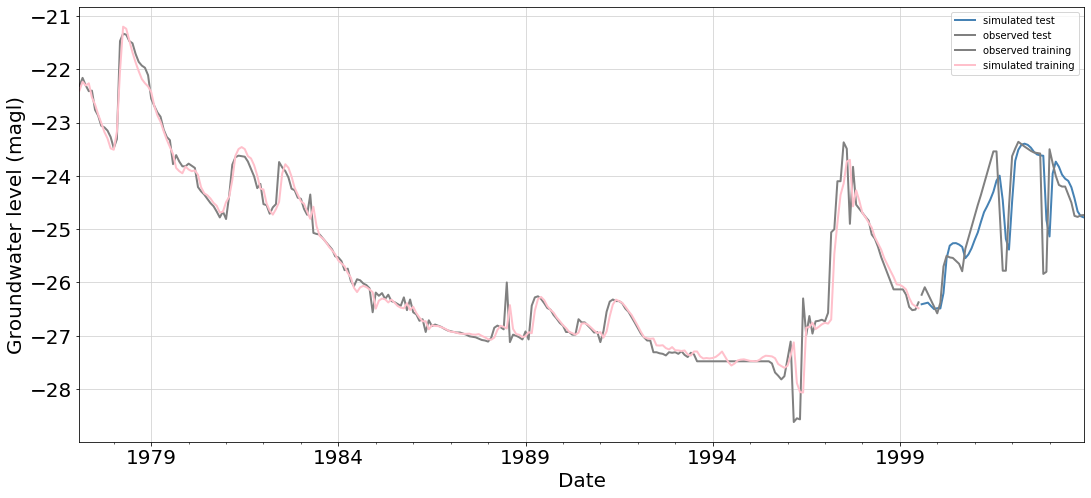

In [97]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [98]:
y_lstm = out_df['simulated test']

### GRU

In [76]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [77]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -0.41124484
    test_forecast = X_test
    steps_ahead = 53
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_pred
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Train on 270 samples, validate on 53 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 3s - loss: 1.4679 - mean_squared_error: 1.4679
Epoch 00001: val_loss improved from inf to 0.57261, saving model to model.h5
270/270 [==============================] - 4s 14ms/sample - loss: 1.2647 - mean_squared_error: 1.2647 - val_loss: 0.5726 - val_mean_squared_error: 0.5726
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.1083 - mean_squared_error: 1.1083
Epoch 00002: val_loss did not improve from 0.57261
270/270 [==============================] - 0s 76us/sample - loss: 1.1485 - mean_squared_error: 1.1485 - val_loss: 0.5826 - val_mean_squared_error: 0.5826
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.0907 - mean_squared_error: 1.0907
Epoch 00003: val_loss did not improve from 0.57261
270/270 [==============================] - 0s 174us/sample - loss: 1.0435 - mean_squared_error: 1.0435 - val_loss: 0.589

Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1485 - mean_squared_error: 0.1485
Epoch 00027: val_loss did not improve from 0.57261
270/270 [==============================] - 0s 115us/sample - loss: 0.1246 - mean_squared_error: 0.1246 - val_loss: 0.6882 - val_mean_squared_error: 0.6882
Epoch 28/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00028: val_loss did not improve from 0.57261
270/270 [==============================] - 0s 103us/sample - loss: 0.1251 - mean_squared_error: 0.1251 - val_loss: 0.6899 - val_mean_squared_error: 0.6899
Epoch 29/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1202 - mean_squared_error: 0.1202
Epoch 00029: val_loss did not improve from 0.57261
270/270 [==============================] - 0s 143us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.6866 - val_mean_squared_error: 0.6866
Epoch 30/1000
 96/270 [=========>....................] 

Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00052: val_loss improved from 0.37349 to 0.35805, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.3580 - val_mean_squared_error: 0.3580
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 00053: val_loss improved from 0.35805 to 0.34666, saving model to model.h5
270/270 [==============================] - 0s 134us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00054: val_loss improved from 0.34666 to 0.33686, saving model to model.h5
270/270 [==============================] - 0s 143us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.336

Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00076: val_loss improved from 0.19175 to 0.19013, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.1901 - val_mean_squared_error: 0.1901
Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00077: val_loss improved from 0.19013 to 0.18941, saving model to model.h5
270/270 [==============================] - 0s 145us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1894 - val_mean_squared_error: 0.1894
Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00078: val_loss improved from 0.18941 to 0.18771, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.187

 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00100: val_loss improved from 0.16420 to 0.16274, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 101/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00101: val_loss did not improve from 0.16274
270/270 [==============================] - 0s 83us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1628 - val_mean_squared_error: 0.1628
Epoch 102/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00102: val_loss did not improve from 0.16274
270/270 [==============================] - 0s 100us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1634 - val_mean_squared_error: 0.1634
Epoch 103/1000
 96/270 [=========>....

Epoch 125/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00125: val_loss did not improve from 0.15616
270/270 [==============================] - 0s 84us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 126/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00126: val_loss did not improve from 0.15616
270/270 [==============================] - 0s 123us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 127/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00127: val_loss did not improve from 0.15616
270/270 [==============================] - 0s 133us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 128/1000
 96/270 [=========>...................

Epoch 151/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00151: val_loss did not improve from 0.15242
270/270 [==============================] - 0s 130us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1526 - val_mean_squared_error: 0.1526
Epoch 152/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00152: val_loss improved from 0.15242 to 0.15162, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00153: val_loss did not improve from 0.15162
270/270 [==============================] - 0s 84us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 154/1000
 96/270 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00176: val_loss did not improve from 0.14815
270/270 [==============================] - 0s 88us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 177/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00177: val_loss did not improve from 0.14815
270/270 [==============================] - 0s 90us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00178: val_loss did not improve from 0.14815
270/270 [==============================] - 0s 87us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 202/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00202: val_loss improved from 0.14723 to 0.14690, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1469 - val_mean_squared_error: 0.1469
Epoch 203/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00203: val_loss did not improve from 0.14690
270/270 [==============================] - 0s 86us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1470 - val_mean_squared_error: 0.1470
Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00204: val_loss improved from 0.14690 to 0.14670, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1467 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00227: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 93us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 228/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00228: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 97us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 229/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00229: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 126us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 230/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00253: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 82us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 254/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00254: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 99us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 255/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00255: val_loss improved from 0.14424 to 0.14372, saving model to model.h5
270/270 [==============================] - 0s 170us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1437 - val_mean_squared_error: 0.1437
Epoch 256/1000
 96/270 [=========>.....

Epoch 279/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00279: val_loss did not improve from 0.14270
270/270 [==============================] - 0s 103us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 280/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00280: val_loss did not improve from 0.14270
270/270 [==============================] - 0s 99us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1439 - val_mean_squared_error: 0.1439
Epoch 281/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00281: val_loss did not improve from 0.14270
270/270 [==============================] - 0s 93us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 282/1000
 96/270 [=========>....................

Epoch 305/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00305: val_loss did not improve from 0.14232
270/270 [==============================] - 0s 100us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 306/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00306: val_loss did not improve from 0.14232
270/270 [==============================] - 0s 86us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 307/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00307: val_loss improved from 0.14232 to 0.14186, saving model to model.h5
270/270 [==============================] - 0s 154us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 308/1000
 96/270 

Epoch 331/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00331: val_loss did not improve from 0.14081
270/270 [==============================] - 0s 107us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 332/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00332: val_loss did not improve from 0.14081
270/270 [==============================] - 0s 134us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 333/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00333: val_loss did not improve from 0.14081
270/270 [==============================] - 0s 83us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 334/1000
 96/270 [=========>...................

Epoch 357/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0556 - mean_squared_error: 0.0556
Epoch 00357: val_loss did not improve from 0.14081
270/270 [==============================] - 0s 86us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 358/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00358: val_loss did not improve from 0.14081
270/270 [==============================] - 0s 92us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 359/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00359: val_loss did not improve from 0.14081
270/270 [==============================] - 0s 101us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1420 - val_mean_squared_error: 0.1420
Epoch 360/1000
 96/270 [=========>....................

Epoch 383/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00383: val_loss did not improve from 0.13871
270/270 [==============================] - 0s 86us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 384/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00384: val_loss improved from 0.13871 to 0.13862, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 385/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00385: val_loss did not improve from 0.13862
270/270 [==============================] - 0s 80us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 386/1000
 96/270 [

Epoch 409/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00409: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 88us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 410/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00410: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 86us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 411/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00411: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 92us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 412/1000
 96/270 [=========>....................]

Epoch 435/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00435: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 94us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 436/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00436: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 81us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 437/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00437: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 93us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 438/1000
 96/270 [=========>....................]

Epoch 461/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00461: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 80us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 462/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00462: val_loss did not improve from 0.13842
270/270 [==============================] - 0s 139us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 463/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00463: val_loss improved from 0.13842 to 0.13826, saving model to model.h5
270/270 [==============================] - 0s 224us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 464/1000
 96/270 

Epoch 487/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00487: val_loss did not improve from 0.13826
270/270 [==============================] - 0s 114us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 488/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00488: val_loss did not improve from 0.13826
270/270 [==============================] - 0s 118us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 489/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00489: val_loss improved from 0.13826 to 0.13797, saving model to model.h5
270/270 [==============================] - 0s 201us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 490/1000
 96/270

Epoch 513/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00513: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 76us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1413 - val_mean_squared_error: 0.1413
Epoch 514/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00514: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 88us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1417 - val_mean_squared_error: 0.1417
Epoch 515/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00515: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 92us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1421 - val_mean_squared_error: 0.1421
Epoch 516/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00539: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 94us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 540/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 00540: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 87us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 541/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00541: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 80us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 542/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00565: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 89us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 566/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00566: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 84us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 567/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00567: val_loss did not improve from 0.13797
270/270 [==============================] - 0s 84us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 568/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 2.0043 - mean_squared_error: 2.0043
Epoch 00002: val_loss did not improve from 0.67635
270/270 [==============================] - 0s 78us/sample - loss: 1.8344 - mean_squared_error: 1.8344 - val_loss: 0.6846 - val_mean_squared_error: 0.6846
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.5232 - mean_squared_error: 1.5232
Epoch 00003: val_loss did not improve from 0.67635
270/270 [==============================] - 0s 87us/sample - loss: 1.6942 - mean_squared_error: 1.6942 - val_loss: 0.6930 - val_mean_squared_error: 0.6930
Epoch 4/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.7415 - mean_squared_error: 1.7415
Epoch 00004: val_loss did not improve from 0.67635
270/270 [==============================] - 0s 79us/sample - loss: 1.5626 - mean_squared_error: 1.5626 - val_loss: 0.7020 - val_mean_squared_error: 0.7020
Epoch 5/1000
 96/270 [=========>....................] - ETA: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.3075 - mean_squared_error: 0.3075
Epoch 00028: val_loss did not improve from 0.67635
270/270 [==============================] - 0s 77us/sample - loss: 0.2831 - mean_squared_error: 0.2831 - val_loss: 0.8710 - val_mean_squared_error: 0.8710
Epoch 29/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2737 - mean_squared_error: 0.2737
Epoch 00029: val_loss did not improve from 0.67635
270/270 [==============================] - 0s 82us/sample - loss: 0.2619 - mean_squared_error: 0.2619 - val_loss: 0.8774 - val_mean_squared_error: 0.8774
Epoch 30/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2487 - mean_squared_error: 0.2487
Epoch 00030: val_loss did not improve from 0.67635
270/270 [==============================] - 0s 72us/sample - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 0.8823 - val_mean_squared_error: 0.8823
Epoch 31/1000
 96/270 [=========>....................] - ETA: 0s - loss:

Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00054: val_loss improved from 0.60143 to 0.57855, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.5785 - val_mean_squared_error: 0.5785
Epoch 55/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00055: val_loss improved from 0.57855 to 0.55540, saving model to model.h5
270/270 [==============================] - 0s 146us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.5554 - val_mean_squared_error: 0.5554
Epoch 56/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00056: val_loss improved from 0.55540 to 0.52966, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.529

Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00078: val_loss improved from 0.22937 to 0.22284, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00079: val_loss improved from 0.22284 to 0.22049, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.2205 - val_mean_squared_error: 0.2205
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00080: val_loss improved from 0.22049 to 0.21535, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.215

Epoch 102/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00102: val_loss improved from 0.16296 to 0.16097, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1610 - val_mean_squared_error: 0.1610
Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00103: val_loss improved from 0.16097 to 0.16015, saving model to model.h5
270/270 [==============================] - 0s 174us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1602 - val_mean_squared_error: 0.1602
Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00104: val_loss improved from 0.16015 to 0.15955, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00127: val_loss improved from 0.15424 to 0.15309, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00128: val_loss improved from 0.15309 to 0.15211, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1521 - val_mean_squared_error: 0.1521
Epoch 129/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00129: val_loss improved from 0.15211 to 0.15137, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1514 - val_mean

 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00152: val_loss did not improve from 0.14754
270/270 [==============================] - 0s 78us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1500 - val_mean_squared_error: 0.1500
Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00153: val_loss did not improve from 0.14754
270/270 [==============================] - 0s 83us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 154/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00154: val_loss did not improve from 0.14754
270/270 [==============================] - 0s 82us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 155/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00178: val_loss did not improve from 0.14494
270/270 [==============================] - 0s 88us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00179: val_loss improved from 0.14494 to 0.14464, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 180/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 00180: val_loss did not improve from 0.14464
270/270 [==============================] - 0s 82us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 181/1000
 96/270 [

Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00204: val_loss did not improve from 0.14211
270/270 [==============================] - 0s 86us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1439 - val_mean_squared_error: 0.1439
Epoch 205/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00205: val_loss did not improve from 0.14211
270/270 [==============================] - 0s 87us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 206/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00206: val_loss did not improve from 0.14211
270/270 [==============================] - 0s 87us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1435 - val_mean_squared_error: 0.1435
Epoch 207/1000
 96/270 [=========>....................]

Epoch 230/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00230: val_loss did not improve from 0.14164
270/270 [==============================] - 0s 92us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1437 - val_mean_squared_error: 0.1437
Epoch 231/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00231: val_loss did not improve from 0.14164
270/270 [==============================] - 0s 83us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 232/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00232: val_loss did not improve from 0.14164
270/270 [==============================] - 0s 84us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 233/1000
 96/270 [=========>....................]

Epoch 256/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00256: val_loss did not improve from 0.14025
270/270 [==============================] - 0s 88us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 257/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00257: val_loss did not improve from 0.14025
270/270 [==============================] - 0s 92us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00258: val_loss did not improve from 0.14025
270/270 [==============================] - 0s 87us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 259/1000
 96/270 [=========>....................]

Epoch 282/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00282: val_loss did not improve from 0.14025
270/270 [==============================] - 0s 91us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 283/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00283: val_loss did not improve from 0.14025
270/270 [==============================] - 0s 83us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00284: val_loss did not improve from 0.14025
270/270 [==============================] - 0s 83us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1421 - val_mean_squared_error: 0.1421
Epoch 285/1000
 96/270 [=========>....................]

Epoch 308/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00308: val_loss did not improve from 0.13872
270/270 [==============================] - 0s 108us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 309/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00309: val_loss did not improve from 0.13872
270/270 [==============================] - 0s 108us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00310: val_loss did not improve from 0.13872
270/270 [==============================] - 0s 114us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 311/1000
 96/270 [=========>..................

Epoch 334/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00334: val_loss did not improve from 0.13872
270/270 [==============================] - 0s 89us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 335/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00335: val_loss did not improve from 0.13872
270/270 [==============================] - 0s 82us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00336: val_loss did not improve from 0.13872
270/270 [==============================] - 0s 88us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 337/1000
 96/270 [=========>....................]

Epoch 360/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00360: val_loss did not improve from 0.13800
270/270 [==============================] - 0s 93us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 361/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00361: val_loss did not improve from 0.13800
270/270 [==============================] - 0s 85us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1399 - val_mean_squared_error: 0.1399
Epoch 362/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00362: val_loss did not improve from 0.13800
270/270 [==============================] - 0s 89us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 363/1000
 96/270 [=========>....................]

Epoch 386/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00386: val_loss did not improve from 0.13596
270/270 [==============================] - 0s 92us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 387/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00387: val_loss did not improve from 0.13596
270/270 [==============================] - 0s 88us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00388: val_loss did not improve from 0.13596
270/270 [==============================] - 0s 137us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 389/1000
 96/270 [=========>....................

Epoch 412/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00412: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 119us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 413/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00413: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 98us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00414: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 85us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 415/1000
 96/270 [=========>....................

Epoch 438/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00438: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 88us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00439: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 97us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00440: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 86us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 441/1000
 96/270 [=========>....................]

Epoch 464/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00464: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 113us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 465/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00465: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 82us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 466/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00466: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 96us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 467/1000
 96/270 [=========>....................

Epoch 490/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00490: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 94us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 491/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00491: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 85us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 492/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00492: val_loss did not improve from 0.13593
270/270 [==============================] - 0s 92us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 493/1000
 96/270 [=========>....................]

Epoch 20/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2837 - mean_squared_error: 0.2837
Epoch 00020: val_loss did not improve from 0.56012
270/270 [==============================] - 0s 83us/sample - loss: 0.2181 - mean_squared_error: 0.2181 - val_loss: 0.6055 - val_mean_squared_error: 0.6055
Epoch 21/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1759 - mean_squared_error: 0.1759
Epoch 00021: val_loss did not improve from 0.56012
270/270 [==============================] - 0s 80us/sample - loss: 0.1982 - mean_squared_error: 0.1982 - val_loss: 0.6052 - val_mean_squared_error: 0.6052
Epoch 22/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1677 - mean_squared_error: 0.1677
Epoch 00022: val_loss did not improve from 0.56012
270/270 [==============================] - 0s 88us/sample - loss: 0.1770 - mean_squared_error: 0.1770 - val_loss: 0.6052 - val_mean_squared_error: 0.6052
Epoch 23/1000
 96/270 [=========>....................] - E

Epoch 45/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00045: val_loss improved from 0.36688 to 0.35509, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.3551 - val_mean_squared_error: 0.3551
Epoch 46/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00046: val_loss improved from 0.35509 to 0.34367, saving model to model.h5
270/270 [==============================] - 0s 177us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.3437 - val_mean_squared_error: 0.3437
Epoch 47/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00047: val_loss improved from 0.34367 to 0.33067, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.330

Epoch 69/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 00069: val_loss improved from 0.19028 to 0.18670, saving model to model.h5
270/270 [==============================] - 0s 162us/sample - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.1867 - val_mean_squared_error: 0.1867
Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00070: val_loss improved from 0.18670 to 0.18512, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.1851 - val_mean_squared_error: 0.1851
Epoch 71/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00071: val_loss improved from 0.18512 to 0.18222, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.182

 96/270 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00093: val_loss did not improve from 0.15065
270/270 [==============================] - 0s 96us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.1529 - val_mean_squared_error: 0.1529
Epoch 94/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 00094: val_loss did not improve from 0.15065
270/270 [==============================] - 0s 86us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00095: val_loss improved from 0.15065 to 0.15036, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1504 - val_mean_squared_error: 0.1504
Epoch 96/1000
 96/270 [=========>........

Epoch 119/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00119: val_loss did not improve from 0.14718
270/270 [==============================] - 0s 129us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1490 - val_mean_squared_error: 0.1490
Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00120: val_loss did not improve from 0.14718
270/270 [==============================] - 0s 160us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00121: val_loss did not improve from 0.14718
270/270 [==============================] - 0s 138us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1476 - val_mean_squared_error: 0.1476
Epoch 122/1000
 96/270 [=========>..................

Epoch 145/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00145: val_loss improved from 0.14486 to 0.14477, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.1448 - val_mean_squared_error: 0.1448
Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00146: val_loss improved from 0.14477 to 0.14445, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00147: val_loss did not improve from 0.14445
270/270 [==============================] - 0s 87us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1446 - val_mean_squared_error: 

270/270 [==============================] - 0s 160us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1421 - val_mean_squared_error: 0.1421
Epoch 171/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00171: val_loss improved from 0.14209 to 0.14165, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 00172: val_loss improved from 0.14165 to 0.14161, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00173: val_loss did not improve from 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00196: val_loss did not improve from 0.13991
270/270 [==============================] - 0s 95us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 197/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00197: val_loss did not improve from 0.13991
270/270 [==============================] - 0s 85us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00198: val_loss did not improve from 0.13991
270/270 [==============================] - 0s 86us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 222/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00222: val_loss did not improve from 0.13988
270/270 [==============================] - 0s 83us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00223: val_loss did not improve from 0.13988
270/270 [==============================] - 0s 87us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1402 - val_mean_squared_error: 0.1402
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00224: val_loss improved from 0.13988 to 0.13974, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 225/1000
 96/270 [

Epoch 248/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00248: val_loss did not improve from 0.13934
270/270 [==============================] - 0s 97us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00249: val_loss did not improve from 0.13934
270/270 [==============================] - 0s 81us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00250: val_loss did not improve from 0.13934
270/270 [==============================] - 0s 88us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 251/1000
 96/270 [=========>....................]

Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00274: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 87us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00275: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 76us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00276: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 81us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 277/1000
 96/270 [=========>....................]

Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00300: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 138us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1412 - val_mean_squared_error: 0.1412
Epoch 301/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00301: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 79us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 302/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00302: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 87us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 303/1000
 96/270 [=========>....................

Epoch 326/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00326: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 92us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 327/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00327: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 82us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1406 - val_mean_squared_error: 0.1406
Epoch 328/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00328: val_loss did not improve from 0.13787
270/270 [==============================] - 0s 84us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 329/1000
 96/270 [=========>....................]

Epoch 352/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00352: val_loss did not improve from 0.13778
270/270 [==============================] - 0s 151us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 353/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00353: val_loss did not improve from 0.13778
270/270 [==============================] - 0s 93us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 354/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00354: val_loss did not improve from 0.13778
270/270 [==============================] - 0s 90us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 355/1000
 96/270 [=========>....................

Epoch 378/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00378: val_loss did not improve from 0.13670
270/270 [==============================] - 0s 104us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 379/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00379: val_loss did not improve from 0.13670
270/270 [==============================] - 0s 116us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 380/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00380: val_loss improved from 0.13670 to 0.13622, saving model to model.h5
270/270 [==============================] - 0s 170us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 381/1000
 96/270

Epoch 404/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00404: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 89us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 405/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00405: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 91us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 406/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00406: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 85us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 407/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00430: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 91us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 431/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00431: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 87us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 432/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00432: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 94us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 433/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 456/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00456: val_loss improved from 0.13612 to 0.13545, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 457/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 00457: val_loss improved from 0.13545 to 0.13502, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 458/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00458: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 83us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1353 - val_mean_squared_error: 

Epoch 482/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00482: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 107us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 483/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00483: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 86us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 484/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00484: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 84us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 485/1000
 96/270 [=========>....................

Epoch 508/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00508: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 99us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 509/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00509: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 95us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 510/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00510: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 83us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 511/1000
 96/270 [=========>....................]

Epoch 534/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00534: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 100us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 535/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00535: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 83us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 536/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00536: val_loss did not improve from 0.13502
270/270 [==============================] - 0s 80us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 537/1000
 96/270 [=========>....................

Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5467 - mean_squared_error: 0.5467
Epoch 00003: val_loss did not improve from 0.57826
270/270 [==============================] - 0s 110us/sample - loss: 0.5449 - mean_squared_error: 0.5449 - val_loss: 0.5896 - val_mean_squared_error: 0.5896
Epoch 4/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4424 - mean_squared_error: 0.4424
Epoch 00004: val_loss did not improve from 0.57826
270/270 [==============================] - 0s 77us/sample - loss: 0.4976 - mean_squared_error: 0.4976 - val_loss: 0.5955 - val_mean_squared_error: 0.5955
Epoch 5/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5023 - mean_squared_error: 0.5023
Epoch 00005: val_loss did not improve from 0.57826
270/270 [==============================] - 0s 80us/sample - loss: 0.4538 - mean_squared_error: 0.4538 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 6/1000
 96/270 [=========>....................] - ETA:

Epoch 29/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00029: val_loss improved from 0.54727 to 0.52898, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.5290 - val_mean_squared_error: 0.5290
Epoch 30/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 00030: val_loss improved from 0.52898 to 0.51467, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.5147 - val_mean_squared_error: 0.5147
Epoch 31/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00031: val_loss improved from 0.51467 to 0.48966, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.489

Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00053: val_loss improved from 0.24105 to 0.23398, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.2340 - val_mean_squared_error: 0.2340
Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00054: val_loss improved from 0.23398 to 0.23108, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 55/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00055: val_loss improved from 0.23108 to 0.22694, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.226

Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00077: val_loss did not improve from 0.17939
270/270 [==============================] - 0s 79us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.1795 - val_mean_squared_error: 0.1795
Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00078: val_loss improved from 0.17939 to 0.17897, saving model to model.h5
270/270 [==============================] - 0s 178us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00079: val_loss improved from 0.17897 to 0.17795, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.1779 - val_mean_squared_error: 0.1

 96/270 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00101: val_loss improved from 0.15799 to 0.15724, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 102/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00102: val_loss improved from 0.15724 to 0.15512, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.1551 - val_mean_squared_error: 0.1551
Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00103: val_loss did not improve from 0.15512
270/270 [==============================] - 0s 89us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1588 - val_mean_squared_error: 0.1588
Epoch 10

 96/270 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00126: val_loss improved from 0.15072 to 0.14969, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1497 - val_mean_squared_error: 0.1497
Epoch 127/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00127: val_loss did not improve from 0.14969
270/270 [==============================] - 0s 83us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00128: val_loss improved from 0.14969 to 0.14938, saving model to model.h5
270/270 [==============================] - 0s 148us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 12

Epoch 152/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00152: val_loss did not improve from 0.14938
270/270 [==============================] - 0s 85us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1523 - val_mean_squared_error: 0.1523
Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00153: val_loss did not improve from 0.14938
270/270 [==============================] - 0s 92us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.1513 - val_mean_squared_error: 0.1513
Epoch 154/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00154: val_loss did not improve from 0.14938
270/270 [==============================] - 0s 84us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 155/1000
 96/270 [=========>....................]

Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00178: val_loss did not improve from 0.14640
270/270 [==============================] - 0s 84us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00179: val_loss did not improve from 0.14640
270/270 [==============================] - 0s 80us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1481 - val_mean_squared_error: 0.1481
Epoch 180/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00180: val_loss did not improve from 0.14640
270/270 [==============================] - 0s 83us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1487 - val_mean_squared_error: 0.1487
Epoch 181/1000
 96/270 [=========>....................]

Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00204: val_loss improved from 0.14267 to 0.14241, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 205/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00205: val_loss did not improve from 0.14241
270/270 [==============================] - 0s 79us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 206/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00206: val_loss did not improve from 0.14241
270/270 [==============================] - 0s 75us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 207/1000
 96/270 [

Epoch 230/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00230: val_loss did not improve from 0.13852
270/270 [==============================] - 0s 93us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 231/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00231: val_loss did not improve from 0.13852
270/270 [==============================] - 0s 105us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 232/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00232: val_loss did not improve from 0.13852
270/270 [==============================] - 0s 111us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 233/1000
 96/270 [=========>...................

Epoch 256/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00256: val_loss did not improve from 0.13852
270/270 [==============================] - 0s 95us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 257/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00257: val_loss did not improve from 0.13852
270/270 [==============================] - 0s 85us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00258: val_loss did not improve from 0.13852
270/270 [==============================] - 0s 125us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 259/1000
 96/270 [=========>....................

Epoch 282/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00282: val_loss improved from 0.13700 to 0.13665, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 283/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00283: val_loss did not improve from 0.13665
270/270 [==============================] - 0s 83us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00284: val_loss did not improve from 0.13665
270/270 [==============================] - 0s 83us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 285/1000
 96/270 [

Epoch 308/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00308: val_loss did not improve from 0.13458
270/270 [==============================] - 0s 80us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 309/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00309: val_loss did not improve from 0.13458
270/270 [==============================] - 0s 91us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00310: val_loss did not improve from 0.13458
270/270 [==============================] - 0s 80us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 311/1000
 96/270 [=========>....................]

Epoch 334/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00334: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 109us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 335/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00335: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 101us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00336: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 102us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 337/1000
 96/270 [=========>..................

Epoch 360/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00360: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 112us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 361/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00361: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 118us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 362/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00362: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 87us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 363/1000
 96/270 [=========>...................

Epoch 386/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00386: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 91us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 387/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00387: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 79us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00388: val_loss did not improve from 0.13299
270/270 [==============================] - 0s 83us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 389/1000
 96/270 [=========>....................]

Epoch 412/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00412: val_loss did not improve from 0.13197
270/270 [==============================] - 0s 80us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 413/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00413: val_loss did not improve from 0.13197
270/270 [==============================] - 0s 84us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00414: val_loss did not improve from 0.13197
270/270 [==============================] - 0s 91us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 415/1000
 96/270 [=========>....................]

Epoch 438/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00438: val_loss did not improve from 0.13196
270/270 [==============================] - 0s 82us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00439: val_loss did not improve from 0.13196
270/270 [==============================] - 0s 85us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00440: val_loss did not improve from 0.13196
270/270 [==============================] - 0s 89us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 441/1000
 96/270 [=========>....................]

Epoch 464/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00464: val_loss did not improve from 0.13196
270/270 [==============================] - 0s 83us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 465/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00465: val_loss did not improve from 0.13196
270/270 [==============================] - 0s 87us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 466/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00466: val_loss did not improve from 0.13196
270/270 [==============================] - 0s 86us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 467/1000
 96/270 [=========>....................]

Epoch 490/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00490: val_loss did not improve from 0.13099
270/270 [==============================] - 0s 92us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 491/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00491: val_loss did not improve from 0.13099
270/270 [==============================] - 0s 87us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1330 - val_mean_squared_error: 0.1330
Epoch 492/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00492: val_loss did not improve from 0.13099
270/270 [==============================] - 0s 111us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 493/1000
 96/270 [=========>....................

Epoch 516/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00516: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 133us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 517/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00517: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 95us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 518/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00518: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 91us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 519/1000
 96/270 [=========>....................

Epoch 542/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00542: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 124us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 543/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00543: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 99us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 544/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00544: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 82us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 545/1000
 96/270 [=========>....................

Epoch 568/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00568: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 82us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 569/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00569: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 104us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 570/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00570: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 91us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 571/1000
 96/270 [=========>....................

Epoch 594/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00594: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 88us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 595/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00595: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 91us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 596/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00596: val_loss did not improve from 0.13040
270/270 [==============================] - 0s 87us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 597/1000
 96/270 [=========>....................]

Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2088 - mean_squared_error: 0.2088
Epoch 00015: val_loss did not improve from 0.88498
270/270 [==============================] - 0s 80us/sample - loss: 0.2388 - mean_squared_error: 0.2388 - val_loss: 1.0084 - val_mean_squared_error: 1.0084
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2325 - mean_squared_error: 0.2325
Epoch 00016: val_loss did not improve from 0.88498
270/270 [==============================] - 0s 91us/sample - loss: 0.2300 - mean_squared_error: 0.2300 - val_loss: 1.0145 - val_mean_squared_error: 1.0145
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2222 - mean_squared_error: 0.2222
Epoch 00017: val_loss did not improve from 0.88498
270/270 [==============================] - 0s 85us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - val_loss: 1.0197 - val_mean_squared_error: 1.0197
Epoch 18/1000
 96/270 [=========>....................] - E

 96/270 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00040: val_loss improved from 0.65110 to 0.62128, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.6213 - val_mean_squared_error: 0.6213
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00041: val_loss improved from 0.62128 to 0.59711, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.5971 - val_mean_squared_error: 0.5971
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00042: val_loss improved from 0.59711 to 0.57103, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.5710 - val_mean_s

Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00064: val_loss improved from 0.25202 to 0.24582, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.2458 - val_mean_squared_error: 0.2458
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00065: val_loss improved from 0.24582 to 0.23945, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.2395 - val_mean_squared_error: 0.2395
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00066: val_loss improved from 0.23945 to 0.23382, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.233

 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00088: val_loss did not improve from 0.18935
270/270 [==============================] - 0s 150us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.1901 - val_mean_squared_error: 0.1901
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00089: val_loss improved from 0.18935 to 0.18844, saving model to model.h5
270/270 [==============================] - 0s 258us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00090: val_loss improved from 0.18844 to 0.18754, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1875 - val_mean_squared_error: 0.1875
Epoch 91/

Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00113: val_loss improved from 0.16955 to 0.16793, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1679 - val_mean_squared_error: 0.1679
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00114: val_loss improved from 0.16793 to 0.16737, saving model to model.h5
270/270 [==============================] - 0s 212us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1674 - val_mean_squared_error: 0.1674
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00115: val_loss improved from 0.16737 to 0.16707, saving model to model.h5
270/270 [==============================] - 0s 154us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.

Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00138: val_loss improved from 0.15783 to 0.15728, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00139: val_loss improved from 0.15728 to 0.15603, saving model to model.h5
270/270 [==============================] - 0s 145us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00140: val_loss did not improve from 0.15603
270/270 [==============================] - 0s 94us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1567 - val_mean_squared_error: 

Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00164: val_loss improved from 0.15449 to 0.15440, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00165: val_loss did not improve from 0.15440
270/270 [==============================] - 0s 87us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1546 - val_mean_squared_error: 0.1546
Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00166: val_loss improved from 0.15440 to 0.15168, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1517 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00189: val_loss did not improve from 0.14927
270/270 [==============================] - 0s 100us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00190: val_loss did not improve from 0.14927
270/270 [==============================] - 0s 89us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1520 - val_mean_squared_error: 0.1520
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00191: val_loss did not improve from 0.14927
270/270 [==============================] - 0s 90us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1520 - val_mean_squared_error: 0.1520
Epoch 192/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00215: val_loss did not improve from 0.14591
270/270 [==============================] - 0s 83us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1481 - val_mean_squared_error: 0.1481
Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00216: val_loss did not improve from 0.14591
270/270 [==============================] - 0s 96us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00217: val_loss did not improve from 0.14591
270/270 [==============================] - 0s 88us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1473 - val_mean_squared_error: 0.1473
Epoch 218/1000
 96/270 [=========>....................]

Epoch 240/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00240: val_loss did not improve from 0.14130
270/270 [==============================] - 0s 91us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00241: val_loss did not improve from 0.14130
270/270 [==============================] - 0s 83us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1437 - val_mean_squared_error: 0.1437
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00242: val_loss did not improve from 0.14130
270/270 [==============================] - 0s 83us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 243/1000
 96/270 [=========>....................]

Epoch 266/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00266: val_loss did not improve from 0.13931
270/270 [==============================] - 0s 89us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1402 - val_mean_squared_error: 0.1402
Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00267: val_loss did not improve from 0.13931
270/270 [==============================] - 0s 107us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00268: val_loss did not improve from 0.13931
270/270 [==============================] - 0s 81us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1406 - val_mean_squared_error: 0.1406
Epoch 269/1000
 96/270 [=========>....................

Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00292: val_loss did not improve from 0.13855
270/270 [==============================] - 0s 85us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00293: val_loss did not improve from 0.13855
270/270 [==============================] - 0s 90us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00294: val_loss did not improve from 0.13855
270/270 [==============================] - 0s 90us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 295/1000
 96/270 [=========>....................]

Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00318: val_loss did not improve from 0.13607
270/270 [==============================] - 0s 80us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00319: val_loss improved from 0.13607 to 0.13587, saving model to model.h5
270/270 [==============================] - 0s 194us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1359 - val_mean_squared_error: 0.1359
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00320: val_loss improved from 0.13587 to 0.13571, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1357 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00343: val_loss did not improve from 0.13334
270/270 [==============================] - 0s 94us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 344/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00344: val_loss did not improve from 0.13334
270/270 [==============================] - 0s 94us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00345: val_loss did not improve from 0.13334
270/270 [==============================] - 0s 82us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00369: val_loss did not improve from 0.13334
270/270 [==============================] - 0s 85us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 370/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00370: val_loss did not improve from 0.13334
270/270 [==============================] - 0s 86us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00371: val_loss did not improve from 0.13334
270/270 [==============================] - 0s 82us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - lo

270/270 [==============================] - 0s 143us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 395/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00395: val_loss did not improve from 0.13132
270/270 [==============================] - 0s 93us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 396/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00396: val_loss did not improve from 0.13132
270/270 [==============================] - 0s 86us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00397: val_loss did not improve from 0.13132
270/270 [==============================] - 0s 90us/sam

 96/270 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00420: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 101us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 421/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00421: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 117us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 422/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00422: val_loss did not improve from 0.13069
270/270 [==============================] - 0s 102us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 446/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00446: val_loss did not improve from 0.12839
270/270 [==============================] - 0s 102us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 447/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00447: val_loss did not improve from 0.12839
270/270 [==============================] - 0s 91us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 448/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 00448: val_loss did not improve from 0.12839
270/270 [==============================] - 0s 84us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 449/1000
 96/270 [=========>....................

Epoch 472/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00472: val_loss did not improve from 0.12839
270/270 [==============================] - 0s 92us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 473/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00473: val_loss did not improve from 0.12839
270/270 [==============================] - 0s 83us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 474/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00474: val_loss improved from 0.12839 to 0.12836, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 475/1000
 96/270 [

Epoch 498/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00498: val_loss did not improve from 0.12733
270/270 [==============================] - 0s 94us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 499/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00499: val_loss did not improve from 0.12733
270/270 [==============================] - 0s 92us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 500/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00500: val_loss did not improve from 0.12733
270/270 [==============================] - 0s 82us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 501/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00523: val_loss did not improve from 0.12596
270/270 [==============================] - 0s 86us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 524/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00524: val_loss did not improve from 0.12596
270/270 [==============================] - 0s 92us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 525/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00525: val_loss did not improve from 0.12596
270/270 [==============================] - 0s 91us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 526/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00549: val_loss did not improve from 0.12596
270/270 [==============================] - 0s 93us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 550/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00550: val_loss did not improve from 0.12596
270/270 [==============================] - 0s 98us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 551/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00551: val_loss did not improve from 0.12596
270/270 [==============================] - 0s 93us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 552/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 575/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00575: val_loss did not improve from 0.12534
270/270 [==============================] - 0s 120us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 576/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00576: val_loss did not improve from 0.12534
270/270 [==============================] - 0s 127us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 577/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00577: val_loss did not improve from 0.12534
270/270 [==============================] - 0s 95us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 578/1000
 96/270 [=========>...................

Epoch 601/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00601: val_loss did not improve from 0.12447
270/270 [==============================] - 0s 119us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 602/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00602: val_loss did not improve from 0.12447
270/270 [==============================] - 0s 87us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 603/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00603: val_loss did not improve from 0.12447
270/270 [==============================] - 0s 91us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 604/1000
 96/270 [=========>....................

Epoch 627/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00627: val_loss did not improve from 0.12337
270/270 [==============================] - 0s 84us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 628/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00628: val_loss did not improve from 0.12337
270/270 [==============================] - 0s 88us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 629/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00629: val_loss did not improve from 0.12337
270/270 [==============================] - 0s 86us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 630/1000
 96/270 [=========>....................]

270/270 [==============================] - 0s 159us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 653/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00653: val_loss improved from 0.12253 to 0.12183, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 654/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00654: val_loss did not improve from 0.12183
270/270 [==============================] - 0s 84us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 655/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00655: val_loss did not improve from 0.12183
270/270 [==============

Epoch 679/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00679: val_loss did not improve from 0.12183
270/270 [==============================] - 0s 87us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1235 - val_mean_squared_error: 0.1235
Epoch 680/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00680: val_loss did not improve from 0.12183
270/270 [==============================] - 0s 88us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 681/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 00681: val_loss did not improve from 0.12183
270/270 [==============================] - 0s 115us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 682/1000
 96/270 [=========>....................

Epoch 705/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00705: val_loss did not improve from 0.12089
270/270 [==============================] - 0s 96us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 706/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00706: val_loss did not improve from 0.12089
270/270 [==============================] - 0s 89us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 707/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 00707: val_loss did not improve from 0.12089
270/270 [==============================] - 0s 89us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 708/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00731: val_loss did not improve from 0.12089
270/270 [==============================] - 0s 85us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 732/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00732: val_loss did not improve from 0.12089
270/270 [==============================] - 0s 83us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 733/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00733: val_loss did not improve from 0.12089
270/270 [==============================] - 0s 107us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 734/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 757/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00757: val_loss did not improve from 0.12049
270/270 [==============================] - 0s 91us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 758/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00758: val_loss did not improve from 0.12049
270/270 [==============================] - 0s 80us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 759/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00759: val_loss did not improve from 0.12049
270/270 [==============================] - 0s 86us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 760/1000
 96/270 [=========>....................]

Epoch 783/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00783: val_loss did not improve from 0.12049
270/270 [==============================] - 0s 91us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1210 - val_mean_squared_error: 0.1210
Epoch 784/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00784: val_loss did not improve from 0.12049
270/270 [==============================] - 0s 88us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 785/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00785: val_loss did not improve from 0.12049
270/270 [==============================] - 0s 118us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 786/1000
 96/270 [=========>....................

Epoch 809/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00809: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 93us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 810/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00810: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 88us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 811/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00811: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 100us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 812/1000
 96/270 [=========>....................

Epoch 835/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00835: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 92us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 836/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00836: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 84us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1199 - val_mean_squared_error: 0.1199
Epoch 837/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00837: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 98us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 838/1000
 96/270 [=========>....................]

Epoch 861/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00861: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 97us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 862/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00862: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 91us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1199 - val_mean_squared_error: 0.1199
Epoch 863/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00863: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 96us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 864/1000
 96/270 [=========>....................]

Epoch 887/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00887: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 98us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 888/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00888: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 85us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 889/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00889: val_loss did not improve from 0.11940
270/270 [==============================] - 0s 98us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 890/1000
 96/270 [=========>....................]

Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.7019 - mean_squared_error: 0.7019
Epoch 00014: val_loss did not improve from 1.11865
270/270 [==============================] - 0s 102us/sample - loss: 0.8284 - mean_squared_error: 0.8284 - val_loss: 1.2350 - val_mean_squared_error: 1.2350
Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.7514 - mean_squared_error: 0.7514
Epoch 00015: val_loss did not improve from 1.11865
270/270 [==============================] - 0s 74us/sample - loss: 0.7728 - mean_squared_error: 0.7728 - val_loss: 1.2416 - val_mean_squared_error: 1.2416
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.6863 - mean_squared_error: 0.6863
Epoch 00016: val_loss did not improve from 1.11865
270/270 [==============================] - 0s 84us/sample - loss: 0.7191 - mean_squared_error: 0.7191 - val_loss: 1.2481 - val_mean_squared_error: 1.2481
Epoch 17/1000
 96/270 [=========>....................] - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 00040: val_loss did not improve from 1.11865
270/270 [==============================] - 0s 105us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 1.2021 - val_mean_squared_error: 1.2021
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00041: val_loss did not improve from 1.11865
270/270 [==============================] - 0s 125us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 1.1697 - val_mean_squared_error: 1.1697
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1185 - mean_squared_error: 0.1185
Epoch 00042: val_loss did not improve from 1.11865
270/270 [==============================] - 0s 88us/sample - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 1.1431 - val_mean_squared_error: 1.1431
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - los

 96/270 [=========>....................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00064: val_loss improved from 0.45583 to 0.43447, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.4345 - val_mean_squared_error: 0.4345
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00065: val_loss improved from 0.43447 to 0.41472, saving model to model.h5
270/270 [==============================] - 0s 190us/sample - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.4147 - val_mean_squared_error: 0.4147
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00066: val_loss improved from 0.41472 to 0.39481, saving model to model.h5
270/270 [==============================] - 0s 181us/sample - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.3948 - val_mean_s

Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00088: val_loss improved from 0.20591 to 0.20289, saving model to model.h5
270/270 [==============================] - 0s 187us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00089: val_loss improved from 0.20289 to 0.20117, saving model to model.h5
270/270 [==============================] - 0s 177us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.2012 - val_mean_squared_error: 0.2012
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00090: val_loss improved from 0.20117 to 0.19645, saving model to model.h5
270/270 [==============================] - 0s 218us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.196

270/270 [==============================] - 0s 168us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1688 - val_mean_squared_error: 0.1688
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00113: val_loss improved from 0.16878 to 0.16867, saving model to model.h5
270/270 [==============================] - 0s 166us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.1687 - val_mean_squared_error: 0.1687
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00114: val_loss did not improve from 0.16867
270/270 [==============================] - 0s 93us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1688 - val_mean_squared_error: 0.1688
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00115: val_loss improved from 0.16867 to 0.16716, saving model to mo

Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00138: val_loss did not improve from 0.16205
270/270 [==============================] - 0s 176us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1626 - val_mean_squared_error: 0.1626
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00139: val_loss did not improve from 0.16205
270/270 [==============================] - 0s 131us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1643 - val_mean_squared_error: 0.1643
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00140: val_loss did not improve from 0.16205
270/270 [==============================] - 0s 131us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 141/1000
 96/270 [=========>..................

Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00164: val_loss did not improve from 0.15639
270/270 [==============================] - 0s 103us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1591 - val_mean_squared_error: 0.1591
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00165: val_loss did not improve from 0.15639
270/270 [==============================] - 0s 91us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 166/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 00166: val_loss did not improve from 0.15639
270/270 [==============================] - 0s 99us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1586 - val_mean_squared_error: 0.1586
Epoch 167/1000
 96/270 [=========>....................

Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00190: val_loss improved from 0.15548 to 0.15516, saving model to model.h5
270/270 [==============================] - 0s 242us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1552 - val_mean_squared_error: 0.1552
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00191: val_loss did not improve from 0.15516
270/270 [==============================] - 0s 95us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 192/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00192: val_loss did not improve from 0.15516
270/270 [==============================] - 0s 92us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 193/1000
 96/270 [

Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00216: val_loss did not improve from 0.15259
270/270 [==============================] - 0s 273us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00217: val_loss did not improve from 0.15259
270/270 [==============================] - 0s 156us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1539 - val_mean_squared_error: 0.1539
Epoch 218/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00218: val_loss did not improve from 0.15259
270/270 [==============================] - 0s 93us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 219/1000
 96/270 [=========>...................

Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00242: val_loss improved from 0.15082 to 0.14971, saving model to model.h5
270/270 [==============================] - 0s 175us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1497 - val_mean_squared_error: 0.1497
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00243: val_loss did not improve from 0.14971
270/270 [==============================] - 0s 109us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1507 - val_mean_squared_error: 0.1507
Epoch 244/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00244: val_loss did not improve from 0.14971
270/270 [==============================] - 0s 94us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 245/1000
 96/270 

Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00268: val_loss did not improve from 0.14939
270/270 [==============================] - 0s 233us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00269: val_loss did not improve from 0.14939
270/270 [==============================] - 0s 193us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 270/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00270: val_loss did not improve from 0.14939
270/270 [==============================] - 0s 139us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 271/1000
 96/270 [=========>..................

Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00294: val_loss did not improve from 0.14809
270/270 [==============================] - 0s 100us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 295/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00295: val_loss did not improve from 0.14809
270/270 [==============================] - 0s 135us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 296/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00296: val_loss did not improve from 0.14809
270/270 [==============================] - 0s 116us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1509 - val_mean_squared_error: 0.1509
Epoch 297/1000
 96/270 [=========>..................

Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00320: val_loss did not improve from 0.14809
270/270 [==============================] - 0s 104us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 321/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00321: val_loss did not improve from 0.14809
270/270 [==============================] - 0s 90us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 322/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00322: val_loss did not improve from 0.14809
270/270 [==============================] - 0s 95us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 323/1000
 96/270 [=========>....................

Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00346: val_loss did not improve from 0.14785
270/270 [==============================] - 0s 90us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 347/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00347: val_loss did not improve from 0.14785
270/270 [==============================] - 0s 86us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1487 - val_mean_squared_error: 0.1487
Epoch 348/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00348: val_loss did not improve from 0.14785
270/270 [==============================] - 0s 98us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 349/1000
 96/270 [=========>....................]

Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00372: val_loss did not improve from 0.14620
270/270 [==============================] - 0s 87us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1509 - val_mean_squared_error: 0.1509
Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00373: val_loss did not improve from 0.14620
270/270 [==============================] - 0s 207us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 374/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00374: val_loss did not improve from 0.14620
270/270 [==============================] - 0s 129us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 375/1000
 96/270 [=========>...................

Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00398: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 111us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1497 - val_mean_squared_error: 0.1497
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00399: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 112us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 400/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00400: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 116us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1484 - val_mean_squared_error: 0.1484
Epoch 401/1000
 96/270 [=========>..................

Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00424: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 158us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1463 - val_mean_squared_error: 0.1463
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00425: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 91us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1464 - val_mean_squared_error: 0.1464
Epoch 426/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00426: val_loss did not improve from 0.14424
270/270 [==============================] - 0s 95us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 427/1000
 96/270 [=========>....................

Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00450: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 91us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00451: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 101us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1462 - val_mean_squared_error: 0.1462
Epoch 452/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00452: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 100us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1476 - val_mean_squared_error: 0.1476
Epoch 453/1000
 96/270 [=========>...................

Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00476: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 140us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1473 - val_mean_squared_error: 0.1473
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00477: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 81us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 478/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00478: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 149us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1467 - val_mean_squared_error: 0.1467
Epoch 479/1000
 96/270 [=========>...................

Epoch 502/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00502: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 89us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 503/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00503: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 211us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 504/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00504: val_loss did not improve from 0.14365
270/270 [==============================] - 0s 97us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 505/1000
 96/270 [=========>....................

Epoch 528/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00528: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 88us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1476 - val_mean_squared_error: 0.1476
Epoch 529/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00529: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 90us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1480 - val_mean_squared_error: 0.1480
Epoch 530/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00530: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 88us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 531/1000
 96/270 [=========>....................]

Epoch 554/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00554: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 93us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1438 - val_mean_squared_error: 0.1438
Epoch 555/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00555: val_loss improved from 0.14364 to 0.14321, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 556/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00556: val_loss did not improve from 0.14321
270/270 [==============================] - 0s 146us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1439 - val_mean_squared_error: 0.1439
Epoch 557/1000
 96/270 

Epoch 580/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00580: val_loss did not improve from 0.14247
270/270 [==============================] - 0s 107us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1465 - val_mean_squared_error: 0.1465
Epoch 581/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00581: val_loss did not improve from 0.14247
270/270 [==============================] - 0s 96us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1460 - val_mean_squared_error: 0.1460
Epoch 582/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00582: val_loss did not improve from 0.14247
270/270 [==============================] - 0s 101us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 583/1000
 96/270 [=========>...................

Epoch 606/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00606: val_loss did not improve from 0.14247
270/270 [==============================] - 0s 96us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 607/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00607: val_loss did not improve from 0.14247
270/270 [==============================] - 0s 84us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1439 - val_mean_squared_error: 0.1439
Epoch 608/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00608: val_loss did not improve from 0.14247
270/270 [==============================] - 0s 109us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 609/1000
 96/270 [=========>....................

Epoch 632/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00632: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 100us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1441 - val_mean_squared_error: 0.1441
Epoch 633/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00633: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 124us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 634/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00634: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 104us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 635/1000
 96/270 [=========>..................

Epoch 658/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00658: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 97us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 659/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00659: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 89us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 660/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00660: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 78us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 661/1000
 96/270 [=========>....................]

Epoch 684/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00684: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 91us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 685/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00685: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 97us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 686/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00686: val_loss did not improve from 0.14178
270/270 [==============================] - 0s 86us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1448 - val_mean_squared_error: 0.1448
Epoch 687/1000
 96/270 [=========>....................]

Epoch 710/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00710: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 93us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 711/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00711: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 79us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 712/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00712: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 93us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 713/1000
 96/270 [=========>....................]

Epoch 736/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00736: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 88us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1472 - val_mean_squared_error: 0.1472
Epoch 737/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00737: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 110us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1464 - val_mean_squared_error: 0.1464
Epoch 738/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00738: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 80us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1449 - val_mean_squared_error: 0.1449
Epoch 739/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00762: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 132us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1412 - val_mean_squared_error: 0.1412
Epoch 763/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00763: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 100us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 764/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00764: val_loss did not improve from 0.13995
270/270 [==============================] - 0s 95us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 765/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 788/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00788: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 92us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 789/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00789: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 90us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 790/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00790: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 87us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 791/1000
 96/270 [=========>....................]

Epoch 814/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00814: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 87us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1440 - val_mean_squared_error: 0.1440
Epoch 815/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00815: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 82us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 816/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00816: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 84us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 817/1000
 96/270 [=========>....................]

Epoch 840/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00840: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 88us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 841/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00841: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 87us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1412 - val_mean_squared_error: 0.1412
Epoch 842/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00842: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 90us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 843/1000
 96/270 [=========>....................]

Epoch 866/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00866: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 94us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 867/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00867: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 82us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 868/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00868: val_loss did not improve from 0.13741
270/270 [==============================] - 0s 103us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 869/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.9551 - mean_squared_error: 0.9551
Epoch 00009: val_loss improved from 0.52050 to 0.51842, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.8106 - mean_squared_error: 0.8106 - val_loss: 0.5184 - val_mean_squared_error: 0.5184
Epoch 10/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.8333 - mean_squared_error: 0.8333
Epoch 00010: val_loss improved from 0.51842 to 0.51538, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.7753 - mean_squared_error: 0.7753 - val_loss: 0.5154 - val_mean_squared_error: 0.5154
Epoch 11/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.6234 - mean_squared_error: 0.6234
Epoch 00011: val_loss improved from 0.51538 to 0.51244, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.7066 - mean_squared_error: 0.7066 - val_loss: 0.5124 - val_mean_s

Epoch 33/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1137 - mean_squared_error: 0.1137
Epoch 00033: val_loss improved from 0.46356 to 0.45950, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.4595 - val_mean_squared_error: 0.4595
Epoch 34/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1184 - mean_squared_error: 0.1184
Epoch 00034: val_loss improved from 0.45950 to 0.45735, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.4574 - val_mean_squared_error: 0.4574
Epoch 35/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00035: val_loss improved from 0.45735 to 0.45631, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.456

Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00057: val_loss improved from 0.30507 to 0.29847, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.2985 - val_mean_squared_error: 0.2985
Epoch 58/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00058: val_loss improved from 0.29847 to 0.29035, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.2904 - val_mean_squared_error: 0.2904
Epoch 59/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00059: val_loss improved from 0.29035 to 0.28349, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.283

Epoch 81/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00081: val_loss improved from 0.19650 to 0.19485, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 82/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00082: val_loss improved from 0.19485 to 0.19261, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1926 - val_mean_squared_error: 0.1926
Epoch 83/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00083: val_loss improved from 0.19261 to 0.19181, saving model to model.h5
270/270 [==============================] - 0s 164us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.191

 96/270 [=========>....................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00105: val_loss did not improve from 0.16860
270/270 [==============================] - 0s 85us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 106/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00106: val_loss improved from 0.16860 to 0.16842, saving model to model.h5
270/270 [==============================] - 0s 190us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 107/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00107: val_loss improved from 0.16842 to 0.16805, saving model to model.h5
270/270 [==============================] - 0s 164us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1681 - val_mean_squared_error: 0.1681
Epoch 10

 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00130: val_loss improved from 0.16282 to 0.16253, saving model to model.h5
270/270 [==============================] - 0s 175us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1625 - val_mean_squared_error: 0.1625
Epoch 131/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00131: val_loss did not improve from 0.16253
270/270 [==============================] - 0s 92us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 132/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00132: val_loss improved from 0.16253 to 0.16177, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1618 - val_mean_squared_error: 0.1618
Epoch 13

 96/270 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00155: val_loss did not improve from 0.15791
270/270 [==============================] - 0s 89us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.1582 - val_mean_squared_error: 0.1582
Epoch 156/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 00156: val_loss did not improve from 0.15791
270/270 [==============================] - 0s 128us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 157/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00157: val_loss improved from 0.15791 to 0.15664, saving model to model.h5
270/270 [==============================] - 0s 205us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1566 - val_mean_squared_error: 0.1566
Epoch 158/1000
 96/270 [=========>....

270/270 [==============================] - 0s 240us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 181/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00181: val_loss did not improve from 0.15453
270/270 [==============================] - 0s 170us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 182/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00182: val_loss improved from 0.15453 to 0.15444, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 183/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00183: val_loss improved from 0.15444 to 0.15392, saving model to m

Epoch 206/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00206: val_loss improved from 0.15190 to 0.15100, saving model to model.h5
270/270 [==============================] - 0s 173us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1510 - val_mean_squared_error: 0.1510
Epoch 207/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00207: val_loss did not improve from 0.15100
270/270 [==============================] - 0s 90us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 208/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00208: val_loss did not improve from 0.15100
270/270 [==============================] - 0s 134us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 209/1000
 96/270 

Epoch 232/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00232: val_loss did not improve from 0.15074
270/270 [==============================] - 0s 93us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 233/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00233: val_loss did not improve from 0.15074
270/270 [==============================] - 0s 89us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 234/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00234: val_loss did not improve from 0.15074
270/270 [==============================] - 0s 85us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 235/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00257: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 84us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00258: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 103us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 259/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00259: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 83us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 260/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00283: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 95us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00284: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 100us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1485 - val_mean_squared_error: 0.1485
Epoch 285/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00285: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 90us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 286/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00309: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 85us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1485 - val_mean_squared_error: 0.1485
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00310: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 103us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1492 - val_mean_squared_error: 0.1492
Epoch 311/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00311: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 102us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1490 - val_mean_squared_error: 0.1490
Epoch 312/1000
 96/270 [=========>....................] - ETA: 0s - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00335: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 102us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00336: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 115us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1483 - val_mean_squared_error: 0.1483
Epoch 337/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00337: val_loss did not improve from 0.14628
270/270 [==============================] - 0s 96us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1480 - val_mean_squared_error: 0.1480
Epoch 338/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 361/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 00361: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 89us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1448 - val_mean_squared_error: 0.1448
Epoch 362/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00362: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 89us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00363: val_loss did not improve from 0.14364
270/270 [==============================] - 0s 88us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 364/1000
 96/270 [=========>....................]

Epoch 387/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00387: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 94us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1463 - val_mean_squared_error: 0.1463
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00388: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 87us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1466 - val_mean_squared_error: 0.1466
Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00389: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 93us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1462 - val_mean_squared_error: 0.1462
Epoch 390/1000
 96/270 [=========>....................]

Epoch 413/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00413: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 99us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00414: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 92us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1468 - val_mean_squared_error: 0.1468
Epoch 415/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00415: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 94us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1465 - val_mean_squared_error: 0.1465
Epoch 416/1000
 96/270 [=========>....................]

Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00439: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 82us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1459 - val_mean_squared_error: 0.1459
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00440: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 87us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1476 - val_mean_squared_error: 0.1476
Epoch 441/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00441: val_loss did not improve from 0.14353
270/270 [==============================] - 0s 82us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1462 - val_mean_squared_error: 0.1462
Epoch 442/1000
 96/270 [=========>....................]

Epoch 465/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00465: val_loss did not improve from 0.14334
270/270 [==============================] - 0s 91us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1457 - val_mean_squared_error: 0.1457
Epoch 466/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00466: val_loss did not improve from 0.14334
270/270 [==============================] - 0s 95us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 467/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00467: val_loss did not improve from 0.14334
270/270 [==============================] - 0s 99us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 468/1000
 96/270 [=========>....................]

Epoch 491/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00491: val_loss did not improve from 0.14192
270/270 [==============================] - 0s 116us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 492/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00492: val_loss did not improve from 0.14192
270/270 [==============================] - 0s 132us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 493/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00493: val_loss did not improve from 0.14192
270/270 [==============================] - 0s 118us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 494/1000
 96/270 [=========>..................

Epoch 517/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00517: val_loss did not improve from 0.14157
270/270 [==============================] - 0s 91us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 518/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00518: val_loss did not improve from 0.14157
270/270 [==============================] - 0s 107us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 519/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00519: val_loss did not improve from 0.14157
270/270 [==============================] - 0s 95us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 520/1000
 96/270 [=========>....................

Epoch 543/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00543: val_loss did not improve from 0.14157
270/270 [==============================] - 0s 91us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 544/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00544: val_loss did not improve from 0.14157
270/270 [==============================] - 0s 83us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 545/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00545: val_loss did not improve from 0.14157
270/270 [==============================] - 0s 86us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 546/1000
 96/270 [=========>....................]

Epoch 569/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00569: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 91us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 570/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00570: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 102us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 571/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00571: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 87us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 572/1000
 96/270 [=========>....................

Epoch 595/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00595: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 91us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 596/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00596: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 87us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1435 - val_mean_squared_error: 0.1435
Epoch 597/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00597: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 94us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1438 - val_mean_squared_error: 0.1438
Epoch 598/1000
 96/270 [=========>....................]

Epoch 621/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00621: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 94us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1441 - val_mean_squared_error: 0.1441
Epoch 622/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00622: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 95us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 623/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00623: val_loss did not improve from 0.14140
270/270 [==============================] - 0s 83us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 624/1000
 96/270 [=========>....................]

Epoch 647/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00647: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 98us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 648/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00648: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 94us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 649/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00649: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 103us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 650/1000
 96/270 [=========>....................

Epoch 673/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00673: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 91us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1438 - val_mean_squared_error: 0.1438
Epoch 674/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00674: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 98us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 675/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00675: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 86us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 676/1000
 96/270 [=========>....................]

Epoch 699/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00699: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 100us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 700/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 00700: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 86us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1407 - val_mean_squared_error: 0.1407
Epoch 701/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00701: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 92us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 702/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00725: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 106us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 726/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00726: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 95us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1421 - val_mean_squared_error: 0.1421
Epoch 727/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00727: val_loss did not improve from 0.14019
270/270 [==============================] - 0s 88us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1421 - val_mean_squared_error: 0.1421
Epoch 728/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.9972 - mean_squared_error: 0.9972
Epoch 00012: val_loss did not improve from 0.80458
270/270 [==============================] - 0s 95us/sample - loss: 1.1352 - mean_squared_error: 1.1352 - val_loss: 0.8500 - val_mean_squared_error: 0.8500
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.1663 - mean_squared_error: 1.1663
Epoch 00013: val_loss did not improve from 0.80458
270/270 [==============================] - 0s 79us/sample - loss: 1.0778 - mean_squared_error: 1.0778 - val_loss: 0.8525 - val_mean_squared_error: 0.8525
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.1108 - mean_squared_error: 1.1108
Epoch 00014: val_loss did not improve from 0.80458
270/270 [==============================] - 0s 79us/sample - loss: 1.0114 - mean_squared_error: 1.0114 - val_loss: 0.8553 - val_mean_squared_error: 0.8553
Epoch 15/1000
 96/270 [=========>....................] - E

 96/270 [=========>....................] - ETA: 0s - loss: 0.1284 - mean_squared_error: 0.1284
Epoch 00038: val_loss did not improve from 0.80458
270/270 [==============================] - 0s 76us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.8775 - val_mean_squared_error: 0.8775
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 00039: val_loss did not improve from 0.80458
270/270 [==============================] - 0s 80us/sample - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.8638 - val_mean_squared_error: 0.8638
Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 00040: val_loss did not improve from 0.80458
270/270 [==============================] - 0s 85us/sample - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.8521 - val_mean_squared_error: 0.8521
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00062: val_loss improved from 0.34346 to 0.32693, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.3269 - val_mean_squared_error: 0.3269
Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00063: val_loss improved from 0.32693 to 0.31443, saving model to model.h5
270/270 [==============================] - 0s 171us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.3144 - val_mean_squared_error: 0.3144
Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 00064: val_loss improved from 0.31443 to 0.30086, saving model to model.h5
270/270 [==============================] - 0s 173us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.3009 - val_mean_s

Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00086: val_loss improved from 0.19075 to 0.18896, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1890 - val_mean_squared_error: 0.1890
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0671 - mean_squared_error: 0.0671
Epoch 00087: val_loss improved from 0.18896 to 0.18844, saving model to model.h5
270/270 [==============================] - 0s 230us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00088: val_loss improved from 0.18844 to 0.18721, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.187

 96/270 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00110: val_loss improved from 0.16947 to 0.16805, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1681 - val_mean_squared_error: 0.1681
Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00111: val_loss improved from 0.16805 to 0.16712, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00112: val_loss improved from 0.16712 to 0.16607, saving model to model.h5
270/270 [==============================] - 0s 223us/sample - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.1661 - val_mean

 96/270 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00135: val_loss did not improve from 0.16096
270/270 [==============================] - 0s 105us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1643 - val_mean_squared_error: 0.1643
Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00136: val_loss did not improve from 0.16096
270/270 [==============================] - 0s 96us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1640 - val_mean_squared_error: 0.1640
Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00137: val_loss did not improve from 0.16096
270/270 [==============================] - 0s 100us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1618 - val_mean_squared_error: 0.1618
Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00160: val_loss did not improve from 0.15438
270/270 [==============================] - 0s 86us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 161/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00161: val_loss improved from 0.15438 to 0.15380, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1538 - val_mean_squared_error: 0.1538
Epoch 162/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00162: val_loss did not improve from 0.15380
270/270 [==============================] - 0s 88us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 163/1000
 96/270 [=========>.....

Epoch 186/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00186: val_loss did not improve from 0.15143
270/270 [==============================] - 0s 84us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 187/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00187: val_loss did not improve from 0.15143
270/270 [==============================] - 0s 84us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00188: val_loss did not improve from 0.15143
270/270 [==============================] - 0s 109us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 189/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00211: val_loss did not improve from 0.14663
270/270 [==============================] - 0s 89us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.1487 - val_mean_squared_error: 0.1487
Epoch 212/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00212: val_loss did not improve from 0.14663
270/270 [==============================] - 0s 97us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1490 - val_mean_squared_error: 0.1490
Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00213: val_loss did not improve from 0.14663
270/270 [==============================] - 0s 105us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 214/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 237/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00237: val_loss did not improve from 0.14448
270/270 [==============================] - 0s 107us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1456 - val_mean_squared_error: 0.1456
Epoch 238/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00238: val_loss did not improve from 0.14448
270/270 [==============================] - 0s 107us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1459 - val_mean_squared_error: 0.1459
Epoch 239/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00239: val_loss did not improve from 0.14448
270/270 [==============================] - 0s 105us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 240/1000
 96/270 [=========>..................

Epoch 263/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00263: val_loss did not improve from 0.14115
270/270 [==============================] - 0s 102us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1420 - val_mean_squared_error: 0.1420
Epoch 264/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00264: val_loss did not improve from 0.14115
270/270 [==============================] - 0s 138us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 265/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00265: val_loss did not improve from 0.14115
270/270 [==============================] - 0s 104us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1444 - val_mean_squared_error: 0.1444
Epoch 266/1000
 96/270 [=========>..................

Epoch 289/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00289: val_loss did not improve from 0.13880
270/270 [==============================] - 0s 93us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 290/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00290: val_loss did not improve from 0.13880
270/270 [==============================] - 0s 93us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 291/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00291: val_loss did not improve from 0.13880
270/270 [==============================] - 0s 107us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 292/1000
 96/270 [=========>....................

Epoch 315/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00315: val_loss did not improve from 0.13729
270/270 [==============================] - 0s 88us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 316/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00316: val_loss did not improve from 0.13729
270/270 [==============================] - 0s 93us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 317/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00317: val_loss did not improve from 0.13729
270/270 [==============================] - 0s 95us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 318/1000
 96/270 [=========>....................]

Epoch 341/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00341: val_loss did not improve from 0.13729
270/270 [==============================] - 0s 106us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 342/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00342: val_loss did not improve from 0.13729
270/270 [==============================] - 0s 85us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 343/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00343: val_loss did not improve from 0.13729
270/270 [==============================] - 0s 99us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 344/1000
 96/270 [=========>....................

Epoch 367/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00367: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 121us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 368/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00368: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 123us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1384 - val_mean_squared_error: 0.1384
Epoch 369/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00369: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 116us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 370/1000
 96/270 [=========>..................

Epoch 393/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00393: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 90us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 394/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00394: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 86us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 395/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00395: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 101us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 396/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00419: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 94us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 420/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00420: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 92us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Epoch 421/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00421: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 88us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 422/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00445: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 101us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 446/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00446: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 87us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 447/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00447: val_loss did not improve from 0.13426
270/270 [==============================] - 0s 89us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 448/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 471/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00471: val_loss did not improve from 0.13257
270/270 [==============================] - 0s 100us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 472/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00472: val_loss did not improve from 0.13257
270/270 [==============================] - 0s 85us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1332 - val_mean_squared_error: 0.1332
Epoch 473/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00473: val_loss did not improve from 0.13257
270/270 [==============================] - 0s 95us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 474/1000
 96/270 [=========>....................

Epoch 497/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00497: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 92us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 498/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00498: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 92us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1330 - val_mean_squared_error: 0.1330
Epoch 499/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00499: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 97us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 500/1000
 96/270 [=========>....................]

Epoch 523/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00523: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 95us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 524/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00524: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 96us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 525/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00525: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 97us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 526/1000
 96/270 [=========>....................]

Epoch 549/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00549: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 97us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 550/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00550: val_loss did not improve from 0.13112
270/270 [==============================] - 0s 88us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 551/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00551: val_loss improved from 0.13112 to 0.13047, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1305 - val_mean_squared_error: 0.1305
Epoch 552/1000
 96/270 [

Epoch 575/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 00575: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 102us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 576/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00576: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 94us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 577/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00577: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 91us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 578/1000
 96/270 [=========>....................

Epoch 601/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00601: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 94us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 602/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00602: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 94us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 603/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00603: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 117us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 604/1000
 96/270 [=========>....................

Epoch 627/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00627: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 89us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 628/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00628: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 91us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 629/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00629: val_loss did not improve from 0.13047
270/270 [==============================] - 0s 87us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 630/1000
 96/270 [=========>....................]

Epoch 653/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00653: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 86us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Epoch 654/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00654: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 101us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 655/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00655: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 93us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 656/1000
 96/270 [=========>....................

Epoch 679/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00679: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 137us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 680/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00680: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 86us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 681/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00681: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 87us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 682/1000
 96/270 [=========>....................

Epoch 705/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00705: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 108us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 706/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00706: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 109us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 707/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00707: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 110us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 708/1000
 96/270 [=========>..................

Epoch 731/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00731: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 117us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 732/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00732: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 98us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 733/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00733: val_loss did not improve from 0.12877
270/270 [==============================] - 0s 87us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 734/1000
 96/270 [=========>....................

Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2981 - mean_squared_error: 0.2981
Epoch 00012: val_loss did not improve from 0.35481
270/270 [==============================] - 0s 85us/sample - loss: 0.2559 - mean_squared_error: 0.2559 - val_loss: 0.3949 - val_mean_squared_error: 0.3949
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 00013: val_loss did not improve from 0.35481
270/270 [==============================] - 0s 89us/sample - loss: 0.2200 - mean_squared_error: 0.2200 - val_loss: 0.3986 - val_mean_squared_error: 0.3986
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2155 - mean_squared_error: 0.2155
Epoch 00014: val_loss did not improve from 0.35481
270/270 [==============================] - 0s 81us/sample - loss: 0.1993 - mean_squared_error: 0.1993 - val_loss: 0.4011 - val_mean_squared_error: 0.4011
Epoch 15/1000
 96/270 [=========>....................] - E

Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00038: val_loss improved from 0.31444 to 0.30572, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.3057 - val_mean_squared_error: 0.3057
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00039: val_loss improved from 0.30572 to 0.29981, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.2998 - val_mean_squared_error: 0.2998
Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00040: val_loss improved from 0.29981 to 0.28904, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.289

Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00062: val_loss improved from 0.17531 to 0.17361, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1736 - val_mean_squared_error: 0.1736
Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00063: val_loss did not improve from 0.17361
270/270 [==============================] - 0s 75us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.1744 - val_mean_squared_error: 0.1744
Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00064: val_loss improved from 0.17361 to 0.17206, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.1721 - val_mean_squared_error: 0.1

Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00086: val_loss improved from 0.15178 to 0.15149, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00087: val_loss improved from 0.15149 to 0.15075, saving model to model.h5
270/270 [==============================] - 0s 143us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00088: val_loss improved from 0.15075 to 0.15033, saving model to model.h5
270/270 [==============================] - 0s 154us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.150

Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00111: val_loss did not improve from 0.14373
270/270 [==============================] - 0s 81us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00112: val_loss did not improve from 0.14373
270/270 [==============================] - 0s 87us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00113: val_loss did not improve from 0.14373
270/270 [==============================] - 0s 83us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 114/1000
 96/270 [=========>....................]

Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00137: val_loss did not improve from 0.14283
270/270 [==============================] - 0s 92us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00138: val_loss did not improve from 0.14283
270/270 [==============================] - 0s 86us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00139: val_loss improved from 0.14283 to 0.14184, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 140/1000
 96/270 [

Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 00163: val_loss did not improve from 0.13965
270/270 [==============================] - 0s 94us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00164: val_loss did not improve from 0.13965
270/270 [==============================] - 0s 82us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00165: val_loss did not improve from 0.13965
270/270 [==============================] - 0s 90us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 166/1000
 96/270 [=========>....................]

Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00189: val_loss did not improve from 0.13868
270/270 [==============================] - 0s 84us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00190: val_loss improved from 0.13868 to 0.13861, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0525 - mean_squared_error: 0.0525
Epoch 00191: val_loss did not improve from 0.13861
270/270 [==============================] - 0s 105us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 192/1000
 96/270 

Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00215: val_loss did not improve from 0.13771
270/270 [==============================] - 0s 83us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00216: val_loss did not improve from 0.13771
270/270 [==============================] - 0s 83us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00217: val_loss did not improve from 0.13771
270/270 [==============================] - 0s 80us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 218/1000
 96/270 [=========>....................]

270/270 [==============================] - 0s 151us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00241: val_loss did not improve from 0.13700
270/270 [==============================] - 0s 97us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00242: val_loss did not improve from 0.13700
270/270 [==============================] - 0s 90us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00243: val_loss did not improve from 0.13700
270/270 [==============================] - 0s 95us/sam

 96/270 [=========>....................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00266: val_loss did not improve from 0.13519
270/270 [==============================] - 0s 95us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00267: val_loss did not improve from 0.13519
270/270 [==============================] - 0s 95us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1358 - val_mean_squared_error: 0.1358
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00268: val_loss did not improve from 0.13519
270/270 [==============================] - 0s 94us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0556 - mean_squared_error: 0.0556
Epoch 00292: val_loss did not improve from 0.13447
270/270 [==============================] - 0s 134us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00293: val_loss did not improve from 0.13447
270/270 [==============================] - 0s 121us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00294: val_loss did not improve from 0.13447
270/270 [==============================] - 0s 106us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 295/1000
 96/270 [=========>..................

Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00318: val_loss did not improve from 0.13447
270/270 [==============================] - 0s 118us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00319: val_loss did not improve from 0.13447
270/270 [==============================] - 0s 103us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1358 - val_mean_squared_error: 0.1358
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00320: val_loss did not improve from 0.13447
270/270 [==============================] - 0s 110us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 321/1000
 96/270 [=========>..................

Epoch 344/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00344: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 86us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00345: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 103us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00346: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 96us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 347/1000
 96/270 [=========>....................

Epoch 370/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00370: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 101us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 371/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00371: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 95us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00372: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 87us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 373/1000
 96/270 [=========>....................

Epoch 396/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00396: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 96us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 397/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00397: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 88us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00398: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 88us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 399/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00422: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 94us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00423: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 90us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00424: val_loss did not improve from 0.13198
270/270 [==============================] - 0s 95us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 7/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4667 - mean_squared_error: 0.4667
Epoch 00007: val_loss did not improve from 0.70692
270/270 [==============================] - 0s 90us/sample - loss: 0.4662 - mean_squared_error: 0.4662 - val_loss: 0.7245 - val_mean_squared_error: 0.7245
Epoch 8/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4409 - mean_squared_error: 0.4409
Epoch 00008: val_loss did not improve from 0.70692
270/270 [==============================] - 0s 77us/sample - loss: 0.4383 - mean_squared_error: 0.4383 - val_loss: 0.7283 - val_mean_squared_error: 0.7283
Epoch 9/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3907 - mean_squared_error: 0.3907
Epoch 00009: val_loss did not improve from 0.70692
270/270 [==============================] - 0s 78us/sample - loss: 0.4001 - mean_squared_error: 0.4001 - val_loss: 0.7307 - val_mean_squared_error: 0.7307
Epoch 10/1000
 96/270 [=========>....................] - ETA:

Epoch 33/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00033: val_loss improved from 0.67465 to 0.65889, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.6589 - val_mean_squared_error: 0.6589
Epoch 34/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00034: val_loss improved from 0.65889 to 0.64123, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.6412 - val_mean_squared_error: 0.6412
Epoch 35/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 00035: val_loss improved from 0.64123 to 0.62161, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.621

Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00057: val_loss improved from 0.29165 to 0.28609, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.2861 - val_mean_squared_error: 0.2861
Epoch 58/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00058: val_loss improved from 0.28609 to 0.27933, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.2793 - val_mean_squared_error: 0.2793
Epoch 59/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00059: val_loss improved from 0.27933 to 0.26913, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.269

Epoch 81/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00081: val_loss improved from 0.18826 to 0.18444, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.1844 - val_mean_squared_error: 0.1844
Epoch 82/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00082: val_loss improved from 0.18444 to 0.18166, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.1817 - val_mean_squared_error: 0.1817
Epoch 83/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00083: val_loss improved from 0.18166 to 0.18055, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.180

270/270 [==============================] - 0s 154us/sample - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.1609 - val_mean_squared_error: 0.1609
Epoch 106/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00106: val_loss did not improve from 0.16087
270/270 [==============================] - 0s 81us/sample - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.1626 - val_mean_squared_error: 0.1626
Epoch 107/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 00107: val_loss did not improve from 0.16087
270/270 [==============================] - 0s 98us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.1632 - val_mean_squared_error: 0.1632
Epoch 108/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00108: val_loss did not improve from 0.16087
270/270 [==============================] - 0s 83us/sam

Epoch 131/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00131: val_loss did not improve from 0.15674
270/270 [==============================] - 0s 100us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 132/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00132: val_loss improved from 0.15674 to 0.15652, saving model to model.h5
270/270 [==============================] - 0s 171us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 133/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 00133: val_loss improved from 0.15652 to 0.15629, saving model to model.h5
270/270 [==============================] - 0s 163us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1563 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00156: val_loss did not improve from 0.15295
270/270 [==============================] - 0s 117us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1537 - val_mean_squared_error: 0.1537
Epoch 157/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00157: val_loss did not improve from 0.15295
270/270 [==============================] - 0s 122us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 158/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00158: val_loss did not improve from 0.15295
270/270 [==============================] - 0s 94us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1559 - val_mean_squared_error: 0.1559
Epoch 159/1000
 96/270 [=========>....................] - ETA: 0s - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00181: val_loss improved from 0.14835 to 0.14753, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.1475 - val_mean_squared_error: 0.1475
Epoch 182/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00182: val_loss improved from 0.14753 to 0.14667, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1467 - val_mean_squared_error: 0.1467
Epoch 183/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00183: val_loss improved from 0.14667 to 0.14665, saving model to model.h5
270/270 [==============================] - 0s 163us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1467 - val_mean

Epoch 207/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00207: val_loss did not improve from 0.14601
270/270 [==============================] - 0s 89us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1466 - val_mean_squared_error: 0.1466
Epoch 208/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00208: val_loss did not improve from 0.14601
270/270 [==============================] - 0s 103us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1470 - val_mean_squared_error: 0.1470
Epoch 209/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00209: val_loss did not improve from 0.14601
270/270 [==============================] - 0s 101us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1469 - val_mean_squared_error: 0.1469
Epoch 210/1000
 96/270 [=========>...................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00232: val_loss did not improve from 0.14283
270/270 [==============================] - 0s 92us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 233/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00233: val_loss did not improve from 0.14283
270/270 [==============================] - 0s 90us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 234/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00234: val_loss did not improve from 0.14283
270/270 [==============================] - 0s 86us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.1442 - val_mean_squared_error: 0.1442
Epoch 235/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00258: val_loss did not improve from 0.14199
270/270 [==============================] - 0s 93us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 259/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00259: val_loss improved from 0.14199 to 0.14176, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 260/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00260: val_loss did not improve from 0.14176
270/270 [==============================] - 0s 94us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 261/1000
 96/270 [

270/270 [==============================] - 0s 166us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00284: val_loss did not improve from 0.14012
270/270 [==============================] - 0s 90us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 285/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00285: val_loss did not improve from 0.14012
270/270 [==============================] - 0s 93us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 286/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00286: val_loss did not improve from 0.14012
270/270 [==============================] - 0s 88us/sam

Epoch 309/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00309: val_loss did not improve from 0.13830
270/270 [==============================] - 0s 87us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00310: val_loss did not improve from 0.13830
270/270 [==============================] - 0s 92us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 311/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00311: val_loss did not improve from 0.13830
270/270 [==============================] - 0s 86us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 312/1000
 96/270 [=========>....................]

Epoch 335/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00335: val_loss did not improve from 0.13816
270/270 [==============================] - 0s 82us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00336: val_loss did not improve from 0.13816
270/270 [==============================] - 0s 92us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 337/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00337: val_loss did not improve from 0.13816
270/270 [==============================] - 0s 91us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 338/1000
 96/270 [=========>....................]

Epoch 361/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00361: val_loss improved from 0.13709 to 0.13622, saving model to model.h5
270/270 [==============================] - 0s 155us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 362/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00362: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 100us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00363: val_loss did not improve from 0.13622
270/270 [==============================] - 0s 101us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 364/1000
 96/270

Epoch 387/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00387: val_loss did not improve from 0.13582
270/270 [==============================] - 0s 100us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00388: val_loss did not improve from 0.13582
270/270 [==============================] - 0s 159us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00389: val_loss did not improve from 0.13582
270/270 [==============================] - 0s 143us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 390/1000
 96/270 [=========>..................

Epoch 413/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00413: val_loss did not improve from 0.13569
270/270 [==============================] - 0s 100us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00414: val_loss did not improve from 0.13569
270/270 [==============================] - 0s 115us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 415/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00415: val_loss did not improve from 0.13569
270/270 [==============================] - 0s 135us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 416/1000
 96/270 [=========>..................

Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00439: val_loss did not improve from 0.13569
270/270 [==============================] - 0s 121us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 00440: val_loss did not improve from 0.13569
270/270 [==============================] - 0s 108us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 441/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00441: val_loss did not improve from 0.13569
270/270 [==============================] - 0s 104us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 442/1000
 96/270 [=========>..................

Epoch 465/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00465: val_loss did not improve from 0.13475
270/270 [==============================] - 0s 102us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 466/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 00466: val_loss did not improve from 0.13475
270/270 [==============================] - 0s 97us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 467/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00467: val_loss did not improve from 0.13475
270/270 [==============================] - 0s 86us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 468/1000
 96/270 [=========>....................

Epoch 491/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00491: val_loss did not improve from 0.13475
270/270 [==============================] - 0s 108us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 492/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00492: val_loss did not improve from 0.13475
270/270 [==============================] - 0s 156us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 493/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00493: val_loss did not improve from 0.13475
270/270 [==============================] - 0s 81us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 494/1000
 96/270 [=========>...................

Epoch 517/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00517: val_loss did not improve from 0.13277
270/270 [==============================] - 0s 94us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 518/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00518: val_loss did not improve from 0.13277
270/270 [==============================] - 0s 97us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 519/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00519: val_loss did not improve from 0.13277
270/270 [==============================] - 0s 108us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 520/1000
 96/270 [=========>....................

Epoch 543/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00543: val_loss did not improve from 0.13249
270/270 [==============================] - 0s 81us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 544/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00544: val_loss did not improve from 0.13249
270/270 [==============================] - 0s 103us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 545/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00545: val_loss did not improve from 0.13249
270/270 [==============================] - 0s 86us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1330 - val_mean_squared_error: 0.1330
Epoch 546/1000
 96/270 [=========>....................

Epoch 569/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00569: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 96us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 570/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00570: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 84us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 571/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00571: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 132us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 572/1000
 96/270 [=========>....................

Epoch 595/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00595: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 102us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 596/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00596: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 88us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 597/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00597: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 96us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 598/1000
 96/270 [=========>....................

Epoch 621/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00621: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 91us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 622/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00622: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 85us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 623/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00623: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 128us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1324 - val_mean_squared_error: 0.1324
Epoch 624/1000
 96/270 [=========>....................

Epoch 647/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00647: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 89us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 648/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00648: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 85us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 649/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00649: val_loss did not improve from 0.13164
270/270 [==============================] - 0s 100us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 650/1000
 96/270 [=========>....................

In [78]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.128      0.358    0.664     0.248
1   Iteration_2     0.128      0.357    0.665     0.242
2   Iteration_3     0.127      0.356    0.668     0.247
3   Iteration_4     0.122      0.349    0.680     0.244
4   Iteration_5     0.117      0.342    0.693     0.232
5   Iteration_6     0.131      0.361    0.658     0.257
6   Iteration_7     0.135      0.367    0.647     0.257
7   Iteration_8     0.121      0.347    0.684     0.246
8   Iteration_9     0.127      0.356    0.667     0.240
9  Iteration_10     0.125      0.353    0.673     0.243

In [79]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.992786    2.004253    2.087510    1.963218    2.002614    2.107636   
1      2.109966    2.048003    2.108082    2.154914    2.139216    2.085373   
2      2.060105    2.024279    2.055813    2.077053    2.033342    1.987990   
3      2.089529    2.050208    2.085842    2.102615    2.058855    2.009714   
4      1.934278    1.904614    1.923695    1.960790    1.901486    1.864734   
..          ...         ...         ...         ...         ...         ...   
265   -0.354494   -0.349227   -0.342484   -0.334976   -0.347257   -0.339124   
266   -0.425353   -0.422062   -0.411066   -0.409013   -0.426755   -0.419309   
267   -0.509806   -0.502461   -0.497746   -0.493312   -0.505497   -0.496324   
268   -0.550571   -0.535365   -0.536768   -0.528939   -0.532846   -0.525267   
269   -0.568003   -0.554750   -0.552516   -0.549050   -0.554271   -0.546907   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.920473    1.975270    1.949551  2.000368  0.057882  2.058250   
1      2.089436    2.064313    2.134629  2.103770  0.033486  2.137257   
2      2.053681    2.089448    2.057299  2.048779  0.028405  2.077184   
3      2.079301    2.118442    2.088038  2.075838  0.030365  2.106203   
4      1.927555    1.967757    1.930525  1.923937  0.029485  1.953422   
..          ...         ...         ...       ...       ...       ...   
265   -0.358125   -0.350432   -0.358331 -0.348272  0.007728 -0.340544   
266   -0.436727   -0.417849   -0.435464 -0.422622  0.009075 -0.413547   
267   -0.509137   -0.500820   -0.520354 -0.503940  0.007849 -0.496090   
268   -0.547424   -0.540319   -0.559997 -0.539722  0.010481 -0.529241   
269   -0.568154   -0.559077   -0.574383 -0.558568  0.008991 -0.549577   

          Min    actual  
0    1.942485  2.016045  
1    2.070284  2.108890  
2    2.020374  2.022235  
3    2.045473  1.954148  
4    1.894452  1.960338  
..        ...       ...  
265 -0.356001 -0.410303  
266 -0.431697 -0.552665  
267 -0.511789 -0.589803  
268 -0.550203 -0.583614  
269 -0.567559 -0.498842  

[270 rows x 14 columns]

In [80]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:323, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.516974   -0.504913   -0.499971   -0.496603   -0.504657   -0.498479   
1    -0.511546   -0.491300   -0.483075   -0.481575   -0.488471   -0.484360   
2    -0.485509   -0.470662   -0.451890   -0.460803   -0.471592   -0.470398   
3    -0.518931   -0.508789   -0.486978   -0.500562   -0.512753   -0.509668   
4    -0.564566   -0.553024   -0.534155   -0.546476   -0.555335   -0.549828   
5    -0.588334   -0.563805   -0.554221   -0.560204   -0.531009   -0.561358   
6    -0.623052   -0.594572   -0.588597   -0.588854   -0.548137   -0.578502   
7    -0.512966   -0.470825   -0.471947   -0.458798   -0.393100   -0.431841   
8    -0.152004   -0.102225   -0.112621   -0.087625   -0.000844   -0.069048   
9     0.033232    0.063331    0.049291    0.085654    0.148555    0.077010   
10    0.082341    0.096842    0.084088    0.122307    0.169267    0.105480   
11    0.089014    0.096080    0.087261    0.124874    0.162715    0.107892   
12    0.074656    0.079745    0.070432    0.108300    0.145515    0.091708   
13    0.047515    0.052780    0.043392    0.081501    0.118828    0.066239   
14   -0.061193   -0.055818   -0.056839   -0.025283   -0.006751   -0.043750   
15    0.008584    0.015309    0.024987    0.047817    0.055280    0.012238   
16    0.097034    0.101014    0.114258    0.132431    0.135031    0.084981   
17    0.196755    0.198561    0.210591    0.228030    0.232167    0.171541   
18    0.294207    0.291683    0.302510    0.315982    0.319770    0.253061   
19    0.412521    0.408000    0.413977    0.424056    0.431096    0.361021   
20    0.520553    0.516607    0.518024    0.520954    0.529059    0.462130   
21    0.600964    0.596196    0.594437    0.587481    0.596955    0.527237   
22    0.688853    0.678794    0.668962    0.662671    0.682137    0.596368   
23    0.785071    0.771578    0.751743    0.747220    0.777626    0.677548   
24    0.897337    0.893106    0.862675    0.851226    0.889679    0.788630   
25    0.936928    0.942621    0.908493    0.887677    0.924359    0.838358   
26    0.646199    0.639502    0.617153    0.609843    0.626412    0.583797   
27    0.183091    0.177553    0.164444    0.179560    0.182535    0.164817   
28    0.024955    0.024691    0.017704    0.051614    0.072673    0.040279   
29    0.518964    0.526819    0.517459    0.556001    0.641301    0.531304   
30    1.006895    1.023198    0.990820    1.016355    1.118778    0.974280   
31    1.159975    1.181993    1.124584    1.135901    1.240501    1.102381   
32    1.218363    1.250741    1.184701    1.188432    1.287213    1.162405   
33    1.219851    1.263164    1.195470    1.203272    1.293144    1.185092   
34    1.201292    1.250925    1.182574    1.197187    1.277665    1.182621   
35    1.173159    1.217809    1.149559    1.160765    1.238161    1.145988   
36    1.140235    1.172124    1.105075    1.108030    1.187694    1.088643   
37    1.118243    1.143140    1.078037    1.079524    1.158965    1.056029   
38    1.107791    1.132135    1.068840    1.071391    1.147871    1.046772   
39    1.093099    1.123783    1.062513    1.070336    1.135013    1.047718   
40    0.370086    0.391070    0.337463    0.369377    0.406553    0.358349   
41    0.143827    0.156300    0.121435    0.182631    0.254878    0.172589   
42    0.844114    0.863444    0.862344    0.922313    0.976046    0.876673   
43    0.992035    1.021097    0.983982    1.026666    1.093708    0.996271   
44    0.948267    0.972043    0.919988    0.949439    1.019066    0.925907   
45    0.870836    0.884630    0.833019    0.857922    0.924976    0.831980   
46    0.826515    0.837848    0.790792    0.816678    0.876649    0.786997   
47    0.799873    0.812922    0.770233    0.797498    0.848225    0.765672   
48    0.731053    0.741861    0.704443    0.730747    0.773171    0.697726   
49    0.626114    0.628568    0.601036    0.621509    0.655376    0.579837   
50    0.495290    0.488832

In [81]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:323]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.028
Root mean squared error is: 0.168
Mean absolute error is: 0.092
R^2 score is:  0.973

The model performance for the test set
--------------------------------------
R^2 score is:  0.67
Mean squared error is: 0.126
Root mean squared error is: 0.355
Mean absolute error is: 0.246
Stdv    0.016
dtype: float32


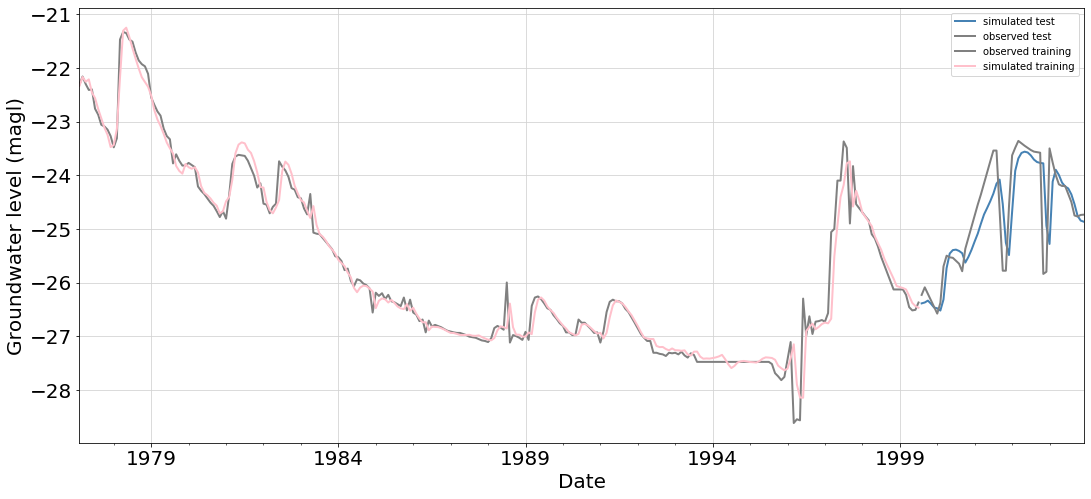

In [82]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))
print(round(stdv_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [83]:
y_gru = out_df['simulated test']

### FFNN

In [84]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -0.41124484
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(270, 6)
Train on 270 samples, validate on 53 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 4s - loss: 1.2169 - mean_squared_error: 1.2169
Epoch 00001: val_loss improved from inf to 0.58928, saving model to model.h5
270/270 [==============================] - 8s 29ms/sample - loss: 1.0855 - mean_squared_error: 1.0855 - val_loss: 0.5893 - val_mean_squared_error: 0.5893
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.9319 - mean_squared_error: 0.9319
Epoch 00002: val_loss improved from 0.58928 to 0.50198, saving model to model.h5
270/270 [==============================] - 0s 326us/sample - loss: 0.8388 - mean_squared_error: 0.8388 - val_loss: 0.5020 - val_mean_squared_error: 0.5020
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.7703 - mean_squared_error: 0.7703
Epoch 00003: val_loss improved from 0.50198 to 0.44085, saving model to model.h5
270/270 [==============================] - 0s 473us/sample 

Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00025: val_loss did not improve from 0.16349
270/270 [==============================] - 0s 112us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1676 - val_mean_squared_error: 0.1676
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00026: val_loss did not improve from 0.16349
270/270 [==============================] - 0s 190us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1639 - val_mean_squared_error: 0.1639
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00027: val_loss did not improve from 0.16349
270/270 [==============================] - 0s 186us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 28/1000
 96/270 [=========>....................] 

Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00051: val_loss improved from 0.13435 to 0.13352, saving model to model.h5
270/270 [==============================] - 0s 267us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00052: val_loss did not improve from 0.13352
270/270 [==============================] - 0s 161us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00053: val_loss did not improve from 0.13352
270/270 [==============================] - 0s 143us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 54/1000
 96/270 [==

Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00077: val_loss did not improve from 0.13306
270/270 [==============================] - 0s 103us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00078: val_loss did not improve from 0.13306
270/270 [==============================] - 0s 102us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00079: val_loss did not improve from 0.13306
270/270 [==============================] - 0s 128us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 80/1000
 96/270 [=========>....................] 

Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00103: val_loss did not improve from 0.13200
270/270 [==============================] - 0s 156us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00104: val_loss did not improve from 0.13200
270/270 [==============================] - 0s 213us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00105: val_loss did not improve from 0.13200
270/270 [==============================] - 0s 133us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 106/1000
 96/270 [=========>..................

Epoch 129/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00129: val_loss did not improve from 0.13115
270/270 [==============================] - 0s 297us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 130/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00130: val_loss did not improve from 0.13115
270/270 [==============================] - 0s 161us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 131/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00131: val_loss did not improve from 0.13115
270/270 [==============================] - 0s 188us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 132/1000
 96/270 [=========>..................

Epoch 155/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00155: val_loss did not improve from 0.12969
270/270 [==============================] - 0s 132us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 156/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00156: val_loss did not improve from 0.12969
270/270 [==============================] - 0s 117us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 157/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00157: val_loss did not improve from 0.12969
270/270 [==============================] - 0s 130us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 158/1000
 96/270 [=========>..................

Epoch 181/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00181: val_loss did not improve from 0.12969
270/270 [==============================] - 0s 133us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 182/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00182: val_loss did not improve from 0.12969
270/270 [==============================] - 0s 127us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1327 - val_mean_squared_error: 0.1327
Epoch 183/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00183: val_loss did not improve from 0.12969
270/270 [==============================] - 0s 153us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Epoch 184/1000
 96/270 [=========>..................

Epoch 207/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00207: val_loss did not improve from 0.12965
270/270 [==============================] - 0s 120us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 208/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00208: val_loss did not improve from 0.12965
270/270 [==============================] - 0s 168us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 209/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00209: val_loss did not improve from 0.12965
270/270 [==============================] - 0s 113us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 210/1000
 96/270 [=========>..................

Epoch 233/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00233: val_loss did not improve from 0.12913
270/270 [==============================] - 0s 140us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 234/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00234: val_loss did not improve from 0.12913
270/270 [==============================] - 0s 178us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1303 - val_mean_squared_error: 0.1303
Epoch 235/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00235: val_loss did not improve from 0.12913
270/270 [==============================] - 0s 190us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 236/1000
 96/270 [=========>..................

Epoch 259/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00259: val_loss did not improve from 0.12855
270/270 [==============================] - 0s 159us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 260/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00260: val_loss did not improve from 0.12855
270/270 [==============================] - 0s 107us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 261/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00261: val_loss did not improve from 0.12855
270/270 [==============================] - 0s 116us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1311 - val_mean_squared_error: 0.1311
Epoch 262/1000
 96/270 [=========>..................

Epoch 285/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00285: val_loss did not improve from 0.12832
270/270 [==============================] - 0s 106us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 286/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00286: val_loss did not improve from 0.12832
270/270 [==============================] - 0s 97us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 287/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00287: val_loss did not improve from 0.12832
270/270 [==============================] - 0s 99us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 288/1000
 96/270 [=========>....................

Epoch 311/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00311: val_loss did not improve from 0.12735
270/270 [==============================] - 0s 149us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 312/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00312: val_loss did not improve from 0.12735
270/270 [==============================] - 0s 103us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 313/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00313: val_loss did not improve from 0.12735
270/270 [==============================] - 0s 107us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 314/1000
 96/270 [=========>..................

Epoch 337/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00337: val_loss did not improve from 0.12698
270/270 [==============================] - 0s 193us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 338/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00338: val_loss did not improve from 0.12698
270/270 [==============================] - 0s 105us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1310 - val_mean_squared_error: 0.1310
Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00339: val_loss did not improve from 0.12698
270/270 [==============================] - 0s 107us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 340/1000
 96/270 [=========>..................

Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00363: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 117us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 364/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00364: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 135us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 365/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00365: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 157us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 366/1000
 96/270 [=========>..................

Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00389: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 180us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 390/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00390: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 180us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 391/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00391: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 158us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 392/1000
 96/270 [=========>..................

Epoch 415/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00415: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 126us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 416/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00416: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 124us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 417/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00417: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 230us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 418/1000
 96/270 [=========>..................

Epoch 441/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00441: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 183us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1299 - val_mean_squared_error: 0.1299
Epoch 442/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00442: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 198us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 443/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00443: val_loss did not improve from 0.12457
270/270 [==============================] - 0s 220us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 444/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00014: val_loss did not improve from 0.16523
270/270 [==============================] - 0s 121us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1719 - val_mean_squared_error: 0.1719
Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00015: val_loss did not improve from 0.16523
270/270 [==============================] - 0s 117us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1697 - val_mean_squared_error: 0.1697
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00016: val_loss improved from 0.16523 to 0.16036, saving model to model.h5
270/270 [==============================] - 0s 267us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 17/1000
 96/270 [=========>......

Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00040: val_loss did not improve from 0.13006
270/270 [==============================] - 0s 170us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00041: val_loss did not improve from 0.13006
270/270 [==============================] - 0s 124us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1463 - val_mean_squared_error: 0.1463
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00042: val_loss did not improve from 0.13006
270/270 [==============================] - 0s 118us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 43/1000
 96/270 [=========>....................] 

Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00066: val_loss did not improve from 0.12622
270/270 [==============================] - 0s 125us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 67/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00067: val_loss did not improve from 0.12622
270/270 [==============================] - 0s 174us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 68/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00068: val_loss did not improve from 0.12622
270/270 [==============================] - 0s 122us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 69/1000
 96/270 [=========>....................] 

Epoch 92/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00092: val_loss did not improve from 0.12562
270/270 [==============================] - 0s 130us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 93/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00093: val_loss did not improve from 0.12562
270/270 [==============================] - 0s 118us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1314 - val_mean_squared_error: 0.1314
Epoch 94/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00094: val_loss did not improve from 0.12562
270/270 [==============================] - 0s 113us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 95/1000
 96/270 [=========>....................] 

Epoch 118/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00118: val_loss did not improve from 0.12393
270/270 [==============================] - 0s 132us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 119/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00119: val_loss did not improve from 0.12393
270/270 [==============================] - 0s 136us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00120: val_loss did not improve from 0.12393
270/270 [==============================] - 0s 132us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 121/1000
 96/270 [=========>..................

Epoch 144/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00144: val_loss did not improve from 0.12393
270/270 [==============================] - 0s 158us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 145/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00145: val_loss did not improve from 0.12393
270/270 [==============================] - 0s 159us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00146: val_loss did not improve from 0.12393
270/270 [==============================] - 0s 156us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 147/1000
 96/270 [=========>..................

Epoch 170/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00170: val_loss did not improve from 0.12198
270/270 [==============================] - 0s 139us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 171/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00171: val_loss did not improve from 0.12198
270/270 [==============================] - 0s 172us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1231 - val_mean_squared_error: 0.1231
Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00172: val_loss did not improve from 0.12198
270/270 [==============================] - 0s 128us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 173/1000
 96/270 [=========>..................

Epoch 196/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00196: val_loss did not improve from 0.12198
270/270 [==============================] - 0s 155us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 197/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00197: val_loss did not improve from 0.12198
270/270 [==============================] - 0s 118us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00198: val_loss did not improve from 0.12198
270/270 [==============================] - 0s 124us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 199/1000
 96/270 [=========>..................

Epoch 222/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00222: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 189us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00223: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 145us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00224: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 182us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1299 - val_mean_squared_error: 0.1299
Epoch 225/1000
 96/270 [=========>..................

Epoch 248/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00248: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 156us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00249: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 130us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00250: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 154us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1337 - val_mean_squared_error: 0.1337
Epoch 251/1000
 96/270 [=========>..................

Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00274: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 172us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00275: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 154us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00276: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 165us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 277/1000
 96/270 [=========>..................

Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00300: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 149us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 301/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00301: val_loss did not improve from 0.12105
270/270 [==============================] - 0s 328us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Running fold 3
(270, 6)
Train on 270 samples, validate on 53 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 5s - loss: 1.4147 - mean_squared_error: 1.4147
Epoch 00001: val_loss improved from inf to 0.71447, saving model to model.h5
270/270 [==============================] - 8s 31ms/sample - loss: 1.3495 - mean_squared_error: 1.3495 - val_loss: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00023: val_loss improved from 0.14234 to 0.13930, saving model to model.h5
270/270 [==============================] - 0s 331us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00024: val_loss did not improve from 0.13930
270/270 [==============================] - 0s 122us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00025: val_loss did not improve from 0.13930
270/270 [==============================] - 0s 122us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 26/1000
 96/270 [=========>......

Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00049: val_loss did not improve from 0.12902
270/270 [==============================] - 0s 116us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00050: val_loss did not improve from 0.12902
270/270 [==============================] - 0s 146us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00051: val_loss did not improve from 0.12902
270/270 [==============================] - 0s 123us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 52/1000
 96/270 [=========>....................] 

Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00075: val_loss did not improve from 0.12471
270/270 [==============================] - 0s 189us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00076: val_loss did not improve from 0.12471
270/270 [==============================] - 0s 152us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00077: val_loss did not improve from 0.12471
270/270 [==============================] - 0s 167us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 78/1000
 96/270 [=========>....................] 

Epoch 101/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00101: val_loss did not improve from 0.12398
270/270 [==============================] - 0s 244us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 102/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00102: val_loss did not improve from 0.12398
270/270 [==============================] - 0s 189us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00103: val_loss did not improve from 0.12398
270/270 [==============================] - 0s 195us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 104/1000
 96/270 [=========>..................

Epoch 127/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00127: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 187us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00128: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 232us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 129/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00129: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 252us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 130/1000
 96/270 [=========>..................

Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00153: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 137us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 154/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00154: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 199us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 155/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00155: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 253us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 156/1000
 96/270 [=========>..................

Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00179: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 143us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 180/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00180: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 175us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 181/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00181: val_loss did not improve from 0.12037
270/270 [==============================] - 0s 198us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 182/1000
 96/270 [=========>..................

Epoch 205/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00205: val_loss did not improve from 0.11921
270/270 [==============================] - 0s 162us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 206/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00206: val_loss did not improve from 0.11921
270/270 [==============================] - 0s 187us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 207/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00207: val_loss did not improve from 0.11921
270/270 [==============================] - 0s 155us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 208/1000
 96/270 [=========>..................

Epoch 231/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00231: val_loss improved from 0.11921 to 0.11903, saving model to model.h5
270/270 [==============================] - 0s 418us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 232/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00232: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 185us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 233/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00233: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 143us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 234/1000
 96/270

Epoch 257/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00257: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 174us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00258: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 133us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 259/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00259: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 129us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1251 - val_mean_squared_error: 0.1251
Epoch 260/1000
 96/270 [=========>..................

Epoch 283/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00283: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 135us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00284: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 134us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 285/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00285: val_loss did not improve from 0.11903
270/270 [==============================] - 0s 162us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 286/1000
 96/270 [=========>..................

Epoch 309/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00309: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 164us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00310: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 186us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1222 - val_mean_squared_error: 0.1222
Epoch 311/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00311: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 134us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 312/1000
 96/270 [=========>..................

Epoch 335/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00335: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 180us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00336: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 183us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 337/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00337: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 209us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 338/1000
 96/270 [=========>..................

Epoch 361/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00361: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 137us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1283 - val_mean_squared_error: 0.1283
Epoch 362/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00362: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 191us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00363: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 215us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 364/1000
 96/270 [=========>..................

Epoch 387/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00387: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 123us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00388: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 164us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00389: val_loss did not improve from 0.11713
270/270 [==============================] - 0s 192us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 390/1000
 96/270 [=========>..................

Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00016: val_loss did not improve from 0.13660
270/270 [==============================] - 0s 144us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00017: val_loss did not improve from 0.13660
270/270 [==============================] - 0s 123us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1602 - val_mean_squared_error: 0.1602
Epoch 18/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00018: val_loss did not improve from 0.13660
270/270 [==============================] - 0s 142us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 19/1000
 96/270 [=========>....................] 

Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00042: val_loss improved from 0.12117 to 0.11708, saving model to model.h5
270/270 [==============================] - 0s 374us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.1171 - val_mean_squared_error: 0.1171
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00043: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 129us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 44/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00044: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 131us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 45/1000
 96/270 [==

Epoch 68/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00068: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 138us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 69/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00069: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 142us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00070: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 129us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 71/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00094: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 138us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00095: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 134us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00096: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 138us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00120: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 138us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00121: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 131us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00122: val_loss did not improve from 0.11708
270/270 [==============================] - 0s 131us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 123/1000
 96/270 [=========>..................

Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00146: val_loss did not improve from 0.11691
270/270 [==============================] - 0s 143us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1354 - val_mean_squared_error: 0.1354
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00147: val_loss did not improve from 0.11691
270/270 [==============================] - 0s 171us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00148: val_loss did not improve from 0.11691
270/270 [==============================] - 0s 154us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 149/1000
 96/270 [=========>..................

Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00172: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 168us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00173: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 167us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1287 - val_mean_squared_error: 0.1287
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00174: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 183us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 175/1000
 96/270 [=========>..................

Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00198: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 213us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00199: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 265us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00200: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 181us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1225 - val_mean_squared_error: 0.1225
Epoch 201/1000
 96/270 [=========>..................

Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00224: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 205us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00225: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 193us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1186 - val_mean_squared_error: 0.1186
Epoch 226/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00226: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 175us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 227/1000
 96/270 [=========>..................

Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00250: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 316us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00251: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 204us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1151 - val_mean_squared_error: 0.1151
Epoch 252/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00252: val_loss did not improve from 0.11480
270/270 [==============================] - 0s 195us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 253/1000
 96/270 [=========>..................

270/270 [==============================] - 0s 463us/sample - loss: 0.5373 - mean_squared_error: 0.5373 - val_loss: 0.4947 - val_mean_squared_error: 0.4947
Epoch 6/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4537 - mean_squared_error: 0.4537
Epoch 00006: val_loss improved from 0.49468 to 0.46855, saving model to model.h5
270/270 [==============================] - 0s 502us/sample - loss: 0.5096 - mean_squared_error: 0.5096 - val_loss: 0.4686 - val_mean_squared_error: 0.4686
Epoch 7/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.5697 - mean_squared_error: 0.5697
Epoch 00007: val_loss improved from 0.46855 to 0.42947, saving model to model.h5
270/270 [==============================] - 0s 405us/sample - loss: 0.4859 - mean_squared_error: 0.4859 - val_loss: 0.4295 - val_mean_squared_error: 0.4295
Epoch 8/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4344 - mean_squared_error: 0.4344
Epoch 00008: val_loss improved from 0.42947 to 0.

Epoch 31/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00031: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 318us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 32/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00032: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 479us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 33/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00033: val_loss did not improve from 0.12077
270/270 [==============================] - 0s 313us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 34/1000
 96/270 [=========>....................] 

Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00057: val_loss did not improve from 0.11753
270/270 [==============================] - 0s 161us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 58/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00058: val_loss did not improve from 0.11753
270/270 [==============================] - 0s 214us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 59/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00059: val_loss did not improve from 0.11753
270/270 [==============================] - 0s 166us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 60/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00083: val_loss did not improve from 0.11753
270/270 [==============================] - 0s 240us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 84/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00084: val_loss did not improve from 0.11753
270/270 [==============================] - 0s 236us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1306 - val_mean_squared_error: 0.1306
Epoch 85/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00085: val_loss did not improve from 0.11753
270/270 [==============================] - 0s 198us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 109/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00109: val_loss did not improve from 0.11572
270/270 [==============================] - 0s 155us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 110/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00110: val_loss did not improve from 0.11572
270/270 [==============================] - 0s 197us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00111: val_loss did not improve from 0.11572
270/270 [==============================] - 0s 171us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 112/1000
 96/270 [=========>..................

Epoch 135/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00135: val_loss did not improve from 0.11559
270/270 [==============================] - 0s 163us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00136: val_loss did not improve from 0.11559
270/270 [==============================] - 0s 180us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00137: val_loss did not improve from 0.11559
270/270 [==============================] - 0s 176us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 138/1000
 96/270 [=========>..................

Epoch 161/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00161: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 161us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 162/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00162: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 147us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00163: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 173us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1238 - val_mean_squared_error: 0.1238
Epoch 164/1000
 96/270 [=========>..................

Epoch 187/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00187: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 181us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1237 - val_mean_squared_error: 0.1237
Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00188: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 172us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00189: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 164us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 190/1000
 96/270 [=========>..................

Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00213: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 187us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 214/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00214: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 170us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00215: val_loss did not improve from 0.11555
270/270 [==============================] - 0s 159us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 216/1000
 96/270 [=========>..................

Epoch 239/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00239: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 132us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1166 - val_mean_squared_error: 0.1166
Epoch 240/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00240: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 137us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00241: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 145us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1310 - val_mean_squared_error: 0.1310
Epoch 242/1000
 96/270 [=========>..................

Epoch 265/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00265: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 180us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 266/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00266: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 146us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00267: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 152us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 268/1000
 96/270 [=========>..................

Epoch 291/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00291: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 228us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00292: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 222us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1145 - val_mean_squared_error: 0.1145
Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00293: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 167us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 294/1000
 96/270 [=========>..................

Epoch 317/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00317: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 173us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00318: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 200us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1310 - val_mean_squared_error: 0.1310
Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00319: val_loss did not improve from 0.11377
270/270 [==============================] - 0s 203us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 320/1000
 96/270 [=========>..................

Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00016: val_loss did not improve from 0.12036
270/270 [==============================] - 0s 165us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00017: val_loss did not improve from 0.12036
270/270 [==============================] - 0s 139us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 18/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00018: val_loss did not improve from 0.12036
270/270 [==============================] - 0s 232us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 19/1000
 96/270 [=========>....................] 

Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00042: val_loss did not improve from 0.11644
270/270 [==============================] - 0s 166us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00043: val_loss did not improve from 0.11644
270/270 [==============================] - 0s 176us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 44/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00044: val_loss did not improve from 0.11644
270/270 [==============================] - 0s 190us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 45/1000
 96/270 [=========>....................] 

Epoch 68/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00068: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 160us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 69/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00069: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 175us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00070: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 170us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 71/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00094: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 209us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00095: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 235us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00096: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 174us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00120: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 205us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00121: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 162us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00122: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 166us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1183 - val_mean_squared_error: 0.1183
Epoch 123/1000
 96/270 [=========>..................

Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00146: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 164us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.1220 - val_mean_squared_error: 0.1220
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00147: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 171us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00148: val_loss did not improve from 0.11512
270/270 [==============================] - 0s 161us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 149/1000
 96/270 [=========>..................

Epoch 22/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00022: val_loss did not improve from 0.11715
270/270 [==============================] - 0s 201us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 23/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00023: val_loss did not improve from 0.11715
270/270 [==============================] - 0s 187us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00024: val_loss did not improve from 0.11715
270/270 [==============================] - 0s 256us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 25/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00048: val_loss did not improve from 0.11715
270/270 [==============================] - 0s 342us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1462 - val_mean_squared_error: 0.1462
Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00049: val_loss did not improve from 0.11715
270/270 [==============================] - 0s 303us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00050: val_loss did not improve from 0.11715
270/270 [==============================] - 0s 268us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00074: val_loss did not improve from 0.11714
270/270 [==============================] - 0s 449us/sample - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00075: val_loss did not improve from 0.11714
270/270 [==============================] - 0s 271us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 76/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00076: val_loss did not improve from 0.11714
270/270 [==============================] - 0s 206us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 77/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00100: val_loss did not improve from 0.11714
270/270 [==============================] - 0s 461us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 101/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00101: val_loss did not improve from 0.11714
270/270 [==============================] - 0s 270us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 102/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00102: val_loss did not improve from 0.11714
270/270 [==============================] - 0s 583us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 126/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00126: val_loss did not improve from 0.11685
270/270 [==============================] - 0s 194us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 127/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00127: val_loss did not improve from 0.11685
270/270 [==============================] - 0s 257us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00128: val_loss did not improve from 0.11685
270/270 [==============================] - 0s 424us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 129/1000
 96/270 [=========>..................

Epoch 152/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00152: val_loss did not improve from 0.11659
270/270 [==============================] - 0s 214us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00153: val_loss did not improve from 0.11659
270/270 [==============================] - 0s 201us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 154/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00154: val_loss did not improve from 0.11659
270/270 [==============================] - 0s 222us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 155/1000
 96/270 [=========>..................

Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00178: val_loss did not improve from 0.11659
270/270 [==============================] - 0s 417us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00179: val_loss did not improve from 0.11659
270/270 [==============================] - 0s 343us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 180/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00180: val_loss did not improve from 0.11659
270/270 [==============================] - 0s 225us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1167 - val_mean_squared_error: 0.1167
Epoch 181/1000
 96/270 [=========>..................

Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00204: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 253us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 205/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00205: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 247us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 206/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00206: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 254us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1172 - val_mean_squared_error: 0.1172
Epoch 207/1000
 96/270 [=========>..................

Epoch 230/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00230: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 220us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 231/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00231: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 335us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 232/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00232: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 259us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 233/1000
 96/270 [=========>..................

Epoch 256/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00256: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 224us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 257/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00257: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 283us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 258/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00258: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 592us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1534 - val_mean_squared_error: 0.1534
Epoch 259/1000
 96/270 [=========>..................

Epoch 282/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00282: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 226us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1172 - val_mean_squared_error: 0.1172
Epoch 283/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00283: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 245us/sample - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 284/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00284: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 286us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 285/1000
 96/270 [=========>..................

Epoch 308/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00308: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 251us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 309/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00309: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 299us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1451 - val_mean_squared_error: 0.1451
Epoch 310/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0613 - mean_squared_error: 0.0613
Epoch 00310: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 363us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 311/1000
 96/270 [=========>..................

Epoch 334/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00334: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 236us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 335/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00335: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 212us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1170 - val_mean_squared_error: 0.1170
Epoch 336/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00336: val_loss did not improve from 0.11590
270/270 [==============================] - 0s 215us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 337/1000
 96/270 [=========>..................

270/270 [==============================] - 0s 909us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00012: val_loss did not improve from 0.11917
270/270 [==============================] - 0s 206us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00013: val_loss did not improve from 0.11917
270/270 [==============================] - 0s 166us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00014: val_loss did not improve from 0.11917
270/270 [==============================] - 0s 173us/sam

 96/270 [=========>....................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00037: val_loss did not improve from 0.11651
270/270 [==============================] - 0s 193us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00038: val_loss did not improve from 0.11651
270/270 [==============================] - 0s 224us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.1215 - val_mean_squared_error: 0.1215
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00039: val_loss did not improve from 0.11651
270/270 [==============================] - 0s 235us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1307 - val_mean_squared_error: 0.1307
Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00063: val_loss did not improve from 0.11651
270/270 [==============================] - 0s 164us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00064: val_loss did not improve from 0.11651
270/270 [==============================] - 0s 184us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00065: val_loss did not improve from 0.11651
270/270 [==============================] - 0s 193us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00089: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 285us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1279 - val_mean_squared_error: 0.1279
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00090: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 249us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1341 - val_mean_squared_error: 0.1341
Epoch 91/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00091: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 222us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 92/1000
 96/270 [=========>....................] 

Epoch 115/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00115: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 492us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 116/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00116: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 207us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.1170 - val_mean_squared_error: 0.1170
Epoch 117/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00117: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 254us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 118/1000
 96/270 [=========>..................

Epoch 141/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00141: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 203us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 142/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00142: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 183us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 143/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00143: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 185us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 144/1000
 96/270 [=========>..................

Epoch 167/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00167: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 209us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 168/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00168: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 193us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 169/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00169: val_loss did not improve from 0.11642
270/270 [==============================] - 0s 204us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1413 - val_mean_squared_error: 0.1413
Epoch 170/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00019: val_loss did not improve from 0.11815
270/270 [==============================] - 0s 149us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1393 - val_mean_squared_error: 0.1393
Epoch 20/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00020: val_loss did not improve from 0.11815
270/270 [==============================] - 0s 170us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 21/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00021: val_loss did not improve from 0.11815
270/270 [==============================] - 0s 156us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 22/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 45/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00045: val_loss did not improve from 0.11800
270/270 [==============================] - 0s 220us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1299 - val_mean_squared_error: 0.1299
Epoch 46/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00046: val_loss did not improve from 0.11800
270/270 [==============================] - 0s 201us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1237 - val_mean_squared_error: 0.1237
Epoch 47/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00047: val_loss did not improve from 0.11800
270/270 [==============================] - 0s 231us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 48/1000
 96/270 [=========>....................] 

Epoch 71/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00071: val_loss did not improve from 0.11785
270/270 [==============================] - 0s 263us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1611 - val_mean_squared_error: 0.1611
Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00072: val_loss did not improve from 0.11785
270/270 [==============================] - 0s 262us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.1301 - val_mean_squared_error: 0.1301
Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00073: val_loss did not improve from 0.11785
270/270 [==============================] - 0s 222us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 74/1000
 96/270 [=========>....................] 

Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00097: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 208us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00098: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 238us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1201 - val_mean_squared_error: 0.1201
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00099: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 206us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 100/1000
 96/270 [=========>....................]

Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00123: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 219us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00124: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 194us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 125/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00125: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 212us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 126/1000
 96/270 [=========>..................

Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00149: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 267us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.1266 - val_mean_squared_error: 0.1266
Epoch 150/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00150: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 225us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 151/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00151: val_loss did not improve from 0.11718
270/270 [==============================] - 0s 276us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 152/1000
 96/270 [=========>..................

Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00175: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 257us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 176/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00176: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 293us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 177/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00177: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 178us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1214 - val_mean_squared_error: 0.1214
Epoch 178/1000
 96/270 [=========>..................

Epoch 201/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00201: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 225us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 202/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00202: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 261us/sample - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.1168 - val_mean_squared_error: 0.1168
Epoch 203/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00203: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 324us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 204/1000
 96/270 [=========>..................

Epoch 227/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0533 - mean_squared_error: 0.0533
Epoch 00227: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 213us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 228/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00228: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 220us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 229/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00229: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 235us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 230/1000
 96/270 [=========>..................

Epoch 253/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00253: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 269us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.1168 - val_mean_squared_error: 0.1168
Epoch 254/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00254: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 305us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Running fold 10
(270, 6)
Train on 270 samples, validate on 53 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 11s - loss: 0.8523 - mean_squared_error: 0.8523
Epoch 00001: val_loss improved from inf to 0.13305, saving model to model.h5
270/270 [==============================] - 15s 55ms/sample - loss: 0.5834 - mean_squared_error: 0.5834 - val_los

 96/270 [=========>....................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00024: val_loss did not improve from 0.11827
270/270 [==============================] - 0s 217us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.1253 - val_mean_squared_error: 0.1253
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00025: val_loss did not improve from 0.11827
270/270 [==============================] - 0s 242us/sample - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00026: val_loss did not improve from 0.11827
270/270 [==============================] - 0s 177us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00050: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 238us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00051: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 210us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1184 - val_mean_squared_error: 0.1184
Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00052: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 240us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 53/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00076: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 266us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1600 - val_mean_squared_error: 0.1600
Epoch 77/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00077: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 248us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00078: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 231us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1276 - val_mean_squared_error: 0.1276
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - lo

192/270 [====================>.........] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00102: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 531us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00103: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 398us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00104: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 277us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00128: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 229us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 129/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00129: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 230us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1472 - val_mean_squared_error: 0.1472
Epoch 130/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00130: val_loss did not improve from 0.11670
270/270 [==============================] - 0s 228us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 131/1000
 96/270 [=========>..................

In [85]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.118    0.344  0.691   0.232
1   Iteration_2   0.116    0.341  0.696   0.235
2   Iteration_3   0.115    0.338  0.700   0.238
3   Iteration_4   0.132    0.363  0.655   0.254
4   Iteration_5   0.119    0.345  0.689   0.253
5   Iteration_6   0.116    0.341  0.695   0.246
6   Iteration_7   0.115    0.339  0.698   0.246
7   Iteration_8   0.115    0.339  0.699   0.236
8   Iteration_9   0.116    0.340  0.697   0.249
9  Iteration_10   0.116    0.341  0.696   0.239

In [86]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      2.074368    2.078534    1.972251    2.468127    1.870334    2.035699   
1      2.222610    2.150345    2.073550    2.504773    1.969270    2.009790   
2      2.144651    2.060112    2.048076    2.428319    1.913160    1.968798   
3      2.174172    2.089755    2.079609    2.463656    1.945636    1.995116   
4      2.006581    1.916442    1.894598    2.255523    1.758281    1.838350   
..          ...         ...         ...         ...         ...         ...   
265   -0.356062   -0.371116   -0.349480   -0.311866   -0.316064   -0.336486   
266   -0.432797   -0.439284   -0.411782   -0.373438   -0.362641   -0.385400   
267   -0.517479   -0.507677   -0.470769   -0.435687   -0.411646   -0.437733   
268   -0.549306   -0.530901   -0.487885   -0.449749   -0.422490   -0.449880   
269   -0.564922   -0.544375   -0.500744   -0.461927   -0.433976   -0.460694   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.991490    1.974255    2.259125  2.080465  0.169741  2.250206   
1      2.104729    2.047792    2.389718  2.163620  0.169179  2.332799   
2      2.017911    2.006930    2.258693  2.094072  0.151462  2.245534   
3      2.045595    2.033675    2.290093  2.124145  0.153241  2.277386   
4      1.877122    1.854613    2.095877  1.944154  0.143506  2.087660   
..          ...         ...         ...       ...       ...       ...   
265   -0.392687   -0.346365   -0.317336 -0.344162  0.025532 -0.318630   
266   -0.446031   -0.391280   -0.379724 -0.402487  0.029102 -0.373384   
267   -0.518312   -0.473850   -0.454839 -0.469777  0.036326 -0.433451   
268   -0.534432   -0.485797   -0.465990 -0.486270  0.041399 -0.444871   
269   -0.544192   -0.493232   -0.472442 -0.497389  0.042472 -0.454917   

          Min    actual  
0    1.910724  2.016045  
1    1.994440  2.108890  
2    1.942610  2.022235  
3    1.970905  1.954148  
4    1.800648  1.960338  
..        ...       ...  
265 -0.369694 -0.410303  
266 -0.431589 -0.552665  
267 -0.506103 -0.589803  
268 -0.527669 -0.583614  
269 -0.539862 -0.498842  

[270 rows x 14 columns]

In [87]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:323, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.512592   -0.502393   -0.463816   -0.427062   -0.402804   -0.427967   
1    -0.491203   -0.482478   -0.440586   -0.397901   -0.378479   -0.404237   
2    -0.462061   -0.461990   -0.425599   -0.384325   -0.368838   -0.394235   
3    -0.501268   -0.495743   -0.457197   -0.419256   -0.397106   -0.424956   
4    -0.545949   -0.529727   -0.485728   -0.448030   -0.420278   -0.450067   
5    -0.516140   -0.485864   -0.434073   -0.387521   -0.360922   -0.393138   
6    -0.538949   -0.500423   -0.444494   -0.398879   -0.370910   -0.403687   
7    -0.416498   -0.389584   -0.335306   -0.286394   -0.265878   -0.305971   
8    -0.025562    0.059184    0.112355    0.158582    0.165502    0.145467   
9     0.137715    0.161616    0.192815    0.265929    0.225192    0.214498   
10    0.168848    0.174775    0.197850    0.277404    0.224051    0.213695   
11    0.168699    0.168811    0.192584    0.274067    0.219798    0.207102   
12    0.146197    0.148658    0.171828    0.248627    0.198285    0.182365   
13    0.131083    0.136721    0.151518    0.214290    0.175950    0.166572   
14    0.046310    0.078504    0.072820    0.143187    0.114862    0.099397   
15    0.128266    0.133064    0.146913    0.168490    0.170262    0.153239   
16    0.205619    0.188720    0.186649    0.242293    0.197589    0.180916   
17    0.339104    0.320898    0.300243    0.376064    0.297619    0.288054   
18    0.453728    0.449306    0.418667    0.498907    0.394905    0.388112   
19    0.564953    0.552480    0.532244    0.631403    0.502405    0.508500   
20    0.656958    0.634077    0.607361    0.721540    0.565468    0.577079   
21    0.716460    0.684550    0.650209    0.771214    0.598687    0.612218   
22    0.777323    0.739908    0.701245    0.830069    0.642245    0.657676   
23    0.848978    0.805968    0.764257    0.903954    0.695581    0.713630   
24    0.947593    0.895169    0.850861    1.009106    0.769703    0.793411   
25    0.988308    0.930619    0.885566    1.055686    0.798734    0.825196   
26    0.727081    0.693272    0.662429    0.807863    0.609770    0.628006   
27    0.255746    0.232205    0.221531    0.340848    0.220933    0.218265   
28    0.122053    0.127339    0.146432    0.186316    0.171450    0.156835   
29    0.662899    0.671543    0.689016    0.828868    0.676925    0.689483   
30    1.088017    1.055147    1.051557    1.260761    0.980157    1.011528   
31    1.198814    1.143891    1.126758    1.355954    1.033412    1.071180   
32    1.253704    1.189769    1.169095    1.413558    1.068043    1.110064   
33    1.270115    1.204908    1.189041    1.452852    1.089034    1.135575   
34    1.263656    1.198754    1.186687    1.462280    1.088652    1.138047   
35    1.233917    1.169384    1.153553    1.417451    1.055142    1.101884   
36    1.186131    1.121778    1.098139    1.336360    0.999436    1.040091   
37    1.158321    1.095873    1.069588    1.295584    0.972875    1.010487   
38    1.151287    1.090001    1.064151    1.288901    0.968735    1.005976   
39    1.153176    1.092623    1.070253    1.304030    0.976322    1.015701   
40    0.461046    0.449424    0.450433    0.631047    0.418710    0.439844   
41    0.183121    0.176751    0.217205    0.388614    0.244665    0.247488   
42    0.945769    0.920039    0.934478    1.153980    0.896566    0.924969   
43    1.086701    1.043478    1.039989    1.277711    0.967785    1.005414   
44    1.034844    0.988869    0.972292    1.191476    0.894805    0.928637   
45    0.955461    0.913348    0.889885    1.085606    0.817864    0.846012   
46    0.920325    0.881225    0.856348    1.042523    0.788632    0.814450   
47    0.905440    0.867537    0.842194    1.025570    0.776297    0.801505   
48    0.845852    0.811638    0.784918    0.955674    0.723487    0.745976   
49    0.745585    0.716842    0.688677    0.830902    0.637335    0.652253   
50    0.624683    0.607692

In [88]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:323]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.035
Root mean squared error is: 0.186
Mean absolute error is: 0.136
R^2 score is:  0.967

The model performance for the test set
--------------------------------------
R^2 score is:  0.692
Mean squared error is: 0.118
Root mean squared error is: 0.343
Mean absolute error is: 0.243
Stdv    0.066
dtype: float32


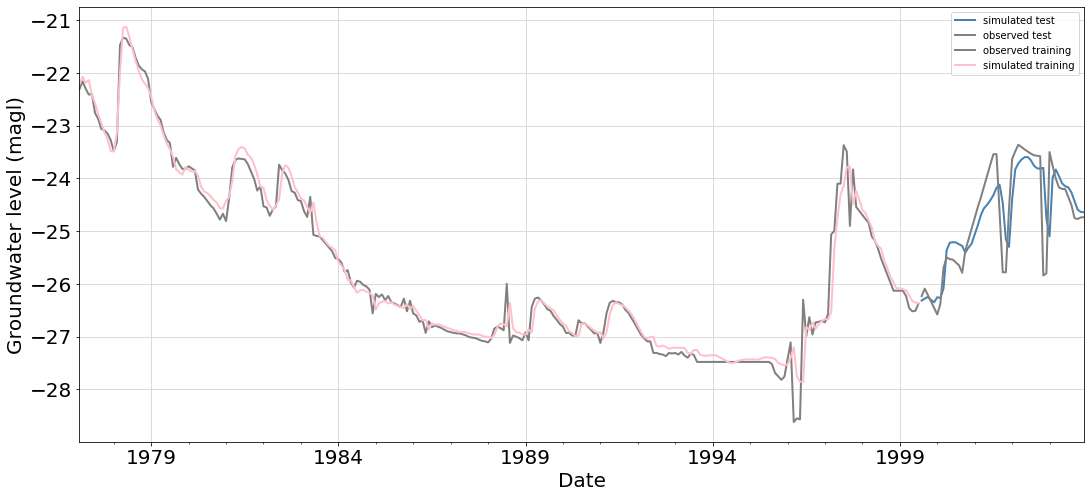

In [89]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))
print(round(stdv_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [90]:
y_ff = out_df['simulated test']

## Static Models

In [99]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0139']]

In [100]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0139'].values
y = y.reshape(-1,1)

In [101]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(270, 6) (270, 1)
(53, 6) (53, 1)


In [102]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [103]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


In [104]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.590    0.768  0.408   0.585
1   Iteration_2   0.653    0.808  0.345   0.608
2   Iteration_3   0.585    0.765  0.413   0.570
3   Iteration_4   0.568    0.754  0.430   0.574
4   Iteration_5   0.573    0.757  0.425   0.567
5   Iteration_6   0.579    0.761  0.419   0.559
6   Iteration_7   0.497    0.705  0.501   0.523
7   Iteration_8   0.613    0.783  0.385   0.584
8   Iteration_9   0.501    0.708  0.498   0.528
9  Iteration_10   0.609    0.780  0.389   0.592

In [105]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [106]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:323, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.421
Mean squared error is: 0.577
Root mean squared error is: 0.759
Mean absolute error is: 0.569


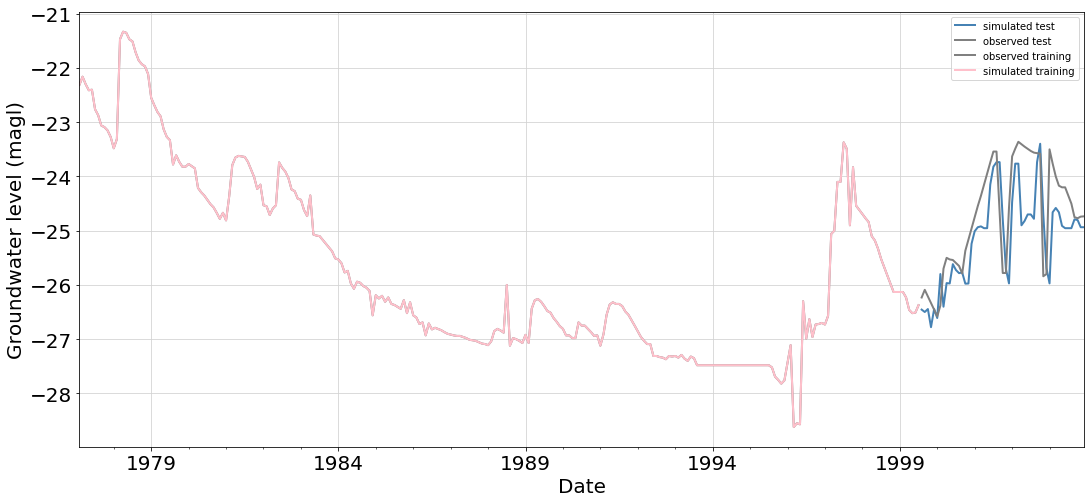

In [107]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [108]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [109]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.326     0.571   0.673    0.362
1   Iteration_2    0.326     0.571   0.673    0.362
2   Iteration_3    0.326     0.571   0.673    0.362
3   Iteration_4    0.326     0.571   0.673    0.362
4   Iteration_5    0.326     0.571   0.673    0.362
5   Iteration_6    0.326     0.571   0.673    0.362
6   Iteration_7    0.326     0.571   0.673    0.362
7   Iteration_8    0.326     0.571   0.673    0.362
8   Iteration_9    0.326     0.571   0.673    0.362
9  Iteration_10    0.326     0.571   0.673    0.362

In [110]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [111]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.093
Root mean squared error is: 0.305
Mean absolute error is: 0.153
R^2 score is:  0.966

The model performance for the test set
--------------------------------------
R^2 score is:  0.673
Mean squared error is: 0.326
Root mean squared error is: 0.571
Mean absolute error is: 0.362


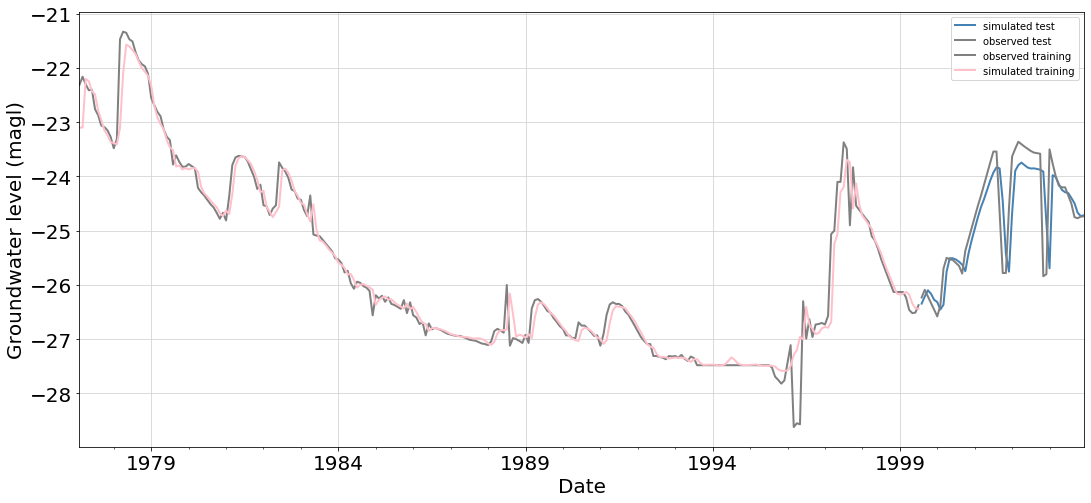

In [112]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 9
(270, 6)
Running fold 10
(270, 6)


In [114]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.405    0.637  0.593   0.460
1   Iteration_2   0.384    0.620  0.615   0.440
2   Iteration_3   0.391    0.625  0.608   0.452
3   Iteration_4   0.387    0.622  0.611   0.443
4   Iteration_5   0.391    0.625  0.608   0.448
5   Iteration_6   0.394    0.628  0.604   0.453
6   Iteration_7   0.393    0.627  0.605   0.448
7   Iteration_8   0.399    0.632  0.599   0.452
8   Iteration_9   0.400    0.633  0.599   0.454
9  Iteration_10   0.395    0.628  0.604   0.449

In [115]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [116]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.009
Root mean squared error is: 0.094
Mean absolute error is: 0.065
R^2 score is:  0.997

The model performance for the test set
--------------------------------------
R^2 score is:  0.605
Mean squared error is: 0.394
Root mean squared error is: 0.628
Mean absolute error is: 0.45


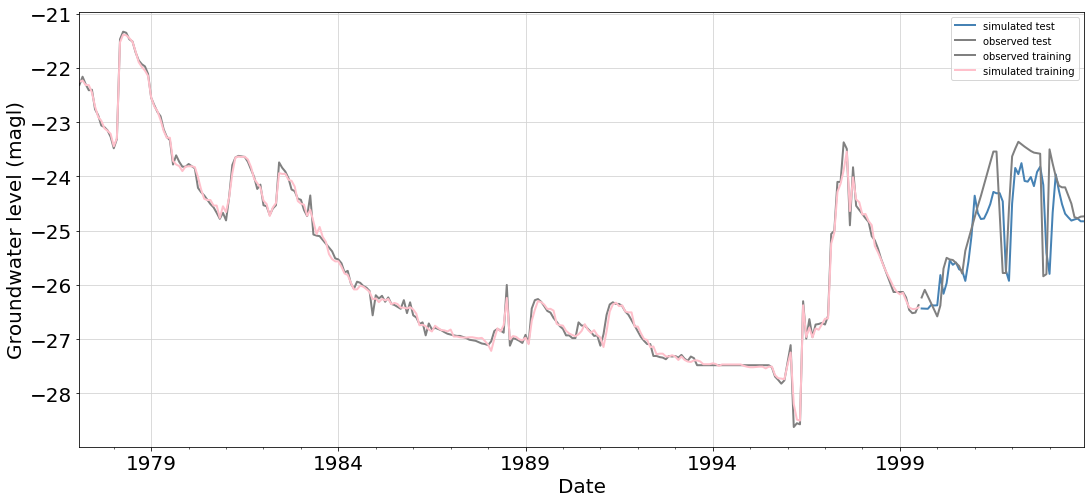

In [117]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [119]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.474    0.688  0.525   0.517
1   Iteration_2   0.501    0.708  0.498   0.547
2   Iteration_3   0.417    0.646  0.582   0.497
3   Iteration_4   0.455    0.674  0.544   0.482
4   Iteration_5   0.393    0.627  0.606   0.449
5   Iteration_6   0.404    0.636  0.594   0.469
6   Iteration_7   0.495    0.704  0.503   0.556
7   Iteration_8   0.472    0.687  0.526   0.495
8   Iteration_9   0.451    0.671  0.548   0.500
9  Iteration_10   0.434    0.659  0.564   0.488

In [120]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [121]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.009
Root mean squared error is: 0.094
Mean absolute error is: 0.065
R^2 score is:  0.997

The model performance for the test set
--------------------------------------
R^2 score is:  0.549
Mean squared error is: 0.45
Root mean squared error is: 0.67
Mean absolute error is: 0.5


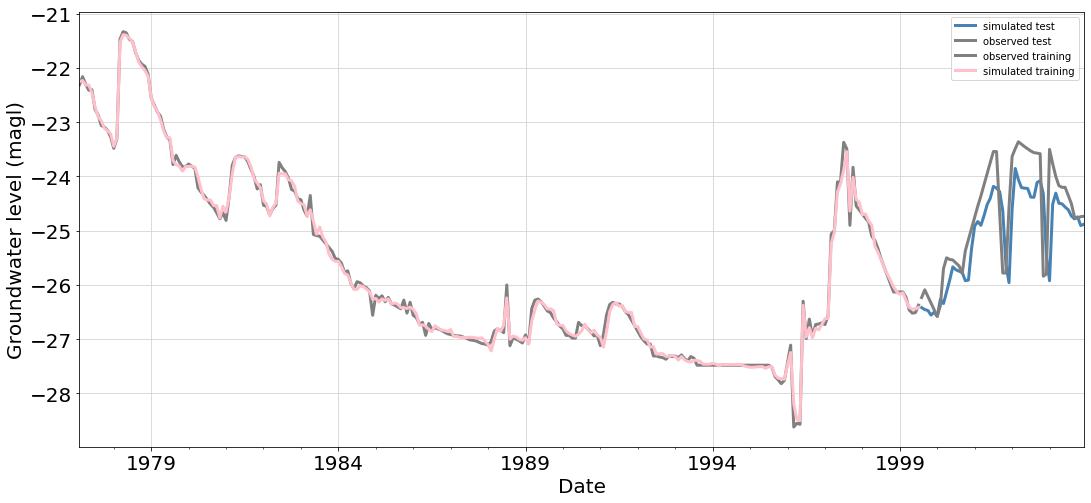

In [126]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:323].index)
df1['observed test']      = pima.iloc[270:323, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [123]:
vs = pd.DataFrame(pima.iloc[270:323, 0].values, columns = ['Observed'],index =pima.iloc[270:323].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

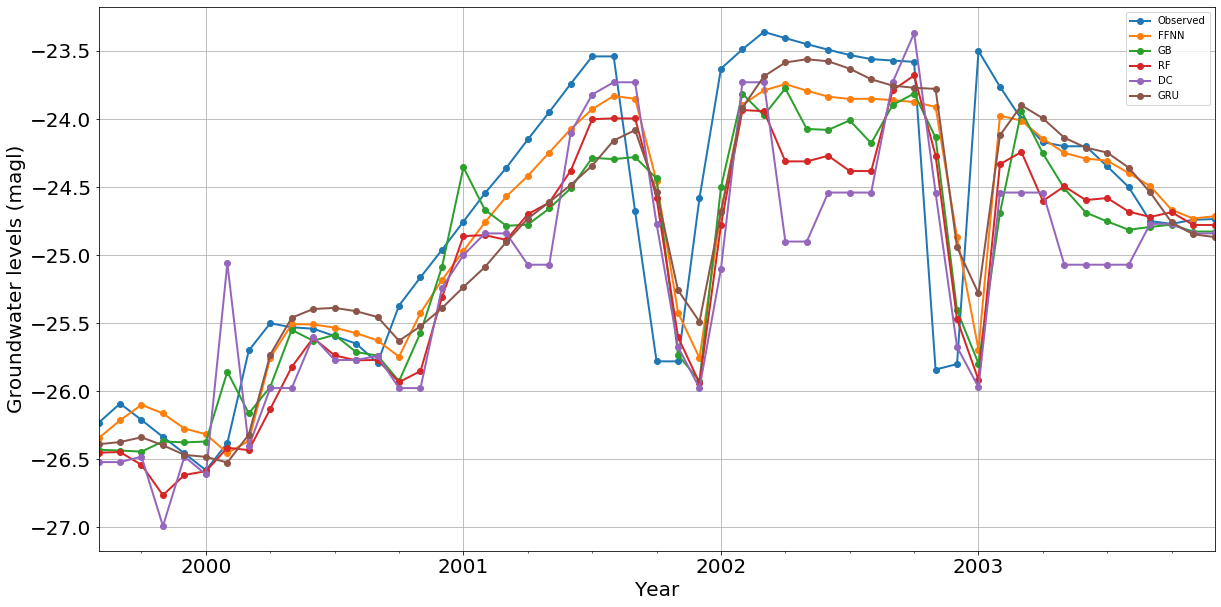

In [124]:
vs.plot(figsize=(20,10), linewidth=3, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)